# CSC17104 – LẬP TRÌNH KHOA HỌC DỮ LIỆU
# ĐỒ ÁN CUỐI KỲ: **Data Science Salaries 2023**

---

## **GVHD:** Phạm Trọng Nghĩa - Lê Nhựt Nam - Nguyễn Thanh Tình

## **Thành viên nhóm:**
- ***23122011 - Đoàn Hải Nam***
- ***23122014 - Hoàng Minh Trung***
- ***23122036 - Nguyễn Ngọc Khoa***

---

# **1. Thu thập dữ liệu**

### ***Chủ đề dữ liệu là gì?***
- Bộ dữ liệu nói về mức lương của các vị trí công việc thuộc lĩnh vực Data Science và các lĩnh vực liên quan (Data Analyst, Data Engineer, Machine Learning Engineer,…). Nó ghi nhận các yếu tố ảnh hưởng đến lương như kinh nghiệm, chức danh, loại hình làm việc, mức độ làm việc từ xa, vị trí công ty và quy mô công ty.
- **Bối cảnh:** Bộ dữ liệu phản ánh thực tế thị trường việc làm Data Science toàn cầu trong giai đoạn 2020-2023, đặc biệt là sự bùng nổ của làm việc từ xa sau đại dịch COVID-19, sự chênh lệch lương mạnh mẽ giữa các khu vực địa lý (đặc biệt Mỹ so với phần còn lại của thế giới), và xu hướng trả lương cao hơn ở các công ty lớn hoặc các vị trí senior/executive.

### ***Nguồn dữ liệu là gì?***
- **Nguồn dữ liệu**: Kaggle – [Data Science Salaries 2023](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data)
- **Tác giả gốc**: [randomarnab](https://www.kaggle.com/arnabchaki)
- **Ngày xuất bản**: Được đăng tải trên Kaggle vào năm 2023.

### ***Dữ liệu này có được cấp phép để sử dụng không?***
- Bộ dữ liệu có giấy phép: [Open Data Commons Attribution License v1.0 (ODC-By)](https://opendatacommons.org/licenses/dbcl/1-0/)
- Theo giấy phép, ta hoàn toàn được phép sử dụng cho mục đích học tập, nghiên cứu, thương mại,… miễn là ghi nguồn đầy đủ.

### ***Dữ liệu này được thu thập như thế nào?***
- **Phương pháp thu thập**: Tác giả không đề cập cụ thể đến phương pháp thu thập dữ liệu trong mô tả trên Kaggle. Nhưng nếu dựa trên các bộ dữ liệu tương tự về lương Data Science trên Kaggle (như các phiên bản trước đó hoặc dataset từ các nguồn crowdsourced), có thể giả thuyết rằng dữ liệu được thu thập qua web scraping từ các trang việc làm công khai hoặc từ các nền tảng chuyên về việc làm AI/Data. Tuy nhiên, tất cả vẫn chỉ là **phỏng đoán**. 
- **Khoảng thời gian thu thập dữ liệu**: Ghi nhận lương của các năm 2020, 2021, 2022 và 2023.

### ***Tại sao chọn bộ dữ liệu này?***
- Nhóm chúng em đều đang học và định hướng theo ngành Data Science/AI nên rất quan tâm đến thực tế lương thưởng, sự khác biệt giữa các vị trí, ảnh hưởng của làm remote và vị trí địa lý tới thu nhập. Đây là chủ đề rất thực tế và gần gũi với sự nghiệp tương lai của cả nhóm.

- **Dữ liệu này có thể cung cấp những câu hỏi hoặc thông tin chi tiết tiềm năng như:**
  - Mức lương trung bình của Data Scientist là bao nhiêu? Xu hướng tăng lương qua các năm ra sao?
  - Làm remote 100% có thực sự giúp người ở các nước lương thấp tiếp cận mức lương cao hơn không?
  - Chức danh nào (Data Scientist, ML Engineer, Data Engineer,…) có mức lương cao nhất khi cùng level kinh nghiệm?
  - Quy mô công ty (S/M/L) ảnh hưởng thế nào đến lương khi kiểm soát các yếu tố khác?
  - Có thể xây dựng mô hình dự đoán lương dựa trên kinh nghiệm, vị trí, loại hình làm việc không?

In [1]:
# Import các thư viện cần thiết
import sys
import os
import numpy as np
import random
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Thiết lập random seed toàn cục
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Import các module từ /src
sys.path.append(os.path.abspath('src'))
from src import data_processing as dp
from src import visualization as vis

# Thiết lập autoreload để tự động tải lại các thay đổi trong /src
%load_ext autoreload
%autoreload 2

# Bỏ qua các cảnh báo không cần thiết
import warnings
warnings.simplefilter('ignore')

# Tải tập dữ liệu
df = dp.load_data('data/raw/ds_salaries.csv')
df.head()

Successfully loaded data from data/raw/ds_salaries.csv


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


---

# **2. Khám phá dữ liệu**

## **2.1. Tổng quan về tập dữ liệu**

### **Thông tin cơ bản**
*   Số lượng dòng: 3755
*   Số lượng cột: 11
*   Mỗi dòng đại diện cho một bản ghi mô tả mức lương của một nhân sự làm việc trong lĩnh vực Data Science. Bao gồm các thông tin về **cấp độ kinh nghiệm, loại hợp đồng, chức danh công việc, mức lương (cả tiền gốc và USD), quốc gia cư trú, tỷ lệ làm việc từ xa, quốc gia công ty và quy mô công ty**. Nói cách khác, mỗi dòng là một bản ghi mô tả **mức lương và điều kiện làm việc của một cá nhân cụ thể** trong ngành Data Science.

*   Kích thước tổng thể: ~1.51 MB

In [2]:
print(f"Dữ liệu có: {df.shape[0]} hàng, {df.shape[1]} cột")
print(f"Kích thước tổng thể: {df.memory_usage(deep=True).sum() / 1e6:.2f} MB")

Dữ liệu có: 3755 hàng, 11 cột
Kích thước tổng thể: 1.51 MB


### **Tính toàn vẹn dữ liệu**
*   Số  hàng trùng lặp: 1171
*   Các hàng trống: 0


In [3]:
duplicates = df.duplicated().sum()
print(f"Số hàng trùng lặp: {duplicates}")

empty_rows = df.isnull().all(axis=1).sum()
print(f"Số hàng trống: {empty_rows}")

Số hàng trùng lặp: 1171
Số hàng trống: 0


### **Xử lý dữ liệu trùng lặp**
Dữ liệu phát hiện **1171 hàng trùng lặp**. 
* **Quyết định:** Loại bỏ toàn bộ.
* **Lý do:** Dataset không có cột `Candidate_ID` duy nhất để xác nhận liệu các bản ghi này có thực sự trùng lặp hay không hay là của 2 người khác nhau. Tuy nhiên, xác suất để 2 nhân viên có cùng **tất cả** 11 thuộc tính (bao gồm cả mức lương lẻ đến hàng đơn vị) là rất thấp. Các dòng trùng lặp này khả năng cao là nhiễu do quá trình scraping dữ liệu. Việc giữ những bản ghi này sẽ khiến dataset bị **lệch phân phối**, làm sai kết quả thống kê và gây **overfitting** cho mô hình dự báo. Mặc dù tỷ lệ trùng lặp khá cao (khoảng **31%**), việc loại bỏ chúng là cần thiết để đảm bảo dữ liệu **sạch, không thiên lệch**, và phản ánh chính xác phân bố thực tế.

In [4]:
df = df.drop_duplicates()
print(f"Sau khi loại bỏ các hàng trùng lặp: {df.shape[0]} hàng, {df.shape[1]} cột")

Sau khi loại bỏ các hàng trùng lặp: 2584 hàng, 11 cột


### **Các kiểu dữ liệu**
*   Kiểu dữ liệu hiện tại của từng cột:

In [5]:
# Kiểm tra kiểu dữ liệu
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Dựa trên **thông tin mỗi cột** thì không có cột nào có kiểu dữ liệu bất thường cần phải chuyển đổi.

### **Data Dictionary**
Để hiểu rõ hơn về các thuộc tính, dưới đây là bảng mô tả chi tiết:

| Tên cột | Mô tả | Ý nghĩa phân tích |
| :--- | :--- | :--- |
| **work_year** | Năm nhận lương (2020-2023) | Phân tích xu hướng lương theo thời gian và lạm phát. |
| **experience_level** | Cấp độ kinh nghiệm (EN, MI, SE, EX) | Yếu tố chính ảnh hưởng đến mức lương. |
| **employment_type** | Loại hợp đồng (FT, PT, CT, FL) | Đánh giá tính ổn định của công việc. |
| **job_title** | Chức danh công việc | Cần gom nhóm để phân tích (High Cardinality). |
| **salary_in_usd** | Lương quy đổi ra USD | **Biến mục tiêu** để dự báo. |
| **employee_residence** | Quốc gia cư trú của nhân viên | Phân tích thị trường lao động toàn cầu. |
| **remote_ratio** | Tỷ lệ làm từ xa (0, 50, 100) | Đánh giá tác động của xu hướng Remote work. |
| **company_location** | Quốc gia đặt trụ sở công ty | So sánh chênh lệch lương giữa các khu vực. |
| **company_size** | Quy mô công ty (S, M, L) | Đánh giá ngân sách trả lương theo quy mô. |
| **salary** | Lương gốc theo đơn vị tiền tệ bản địa | Ít dùng trực tiếp, phục vụ quy đổi |
| **salary_currency** | Đơn vị tiền tệ (ISO 4217) | Giải thích sự cần thiết của chuẩn hóa lương |

## **2.2. Phân tích các cột số**

**Xác định các cột số:**

In [6]:
# Liệt kê các cột phân loại dựa trên dtype object
cat_cols = df.select_dtypes(include=['int64']).columns.tolist()

print("Danh sách các cột số:")
print(cat_cols)

Danh sách các cột số:
['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


### ***work_year***

In [7]:
# In các giá trị duy nhất
print(f"Các giá trị duy nhất ({df['work_year'].nunique()}): {df['work_year'].unique()}")

# In các giá trị bị thiếu
missing_values = df['work_year'].isnull().sum()
print(f"Số giá trị thiếu: {missing_values} ({missing_values/len(df)*100:.2f}%)")

Các giá trị duy nhất (4): [2023 2022 2020 2021]
Số giá trị thiếu: 0 (0.00%)


Vì `work_year` chỉ có 4 giá trị khác nhau nên ta xem xét nó như một biến phân loại.

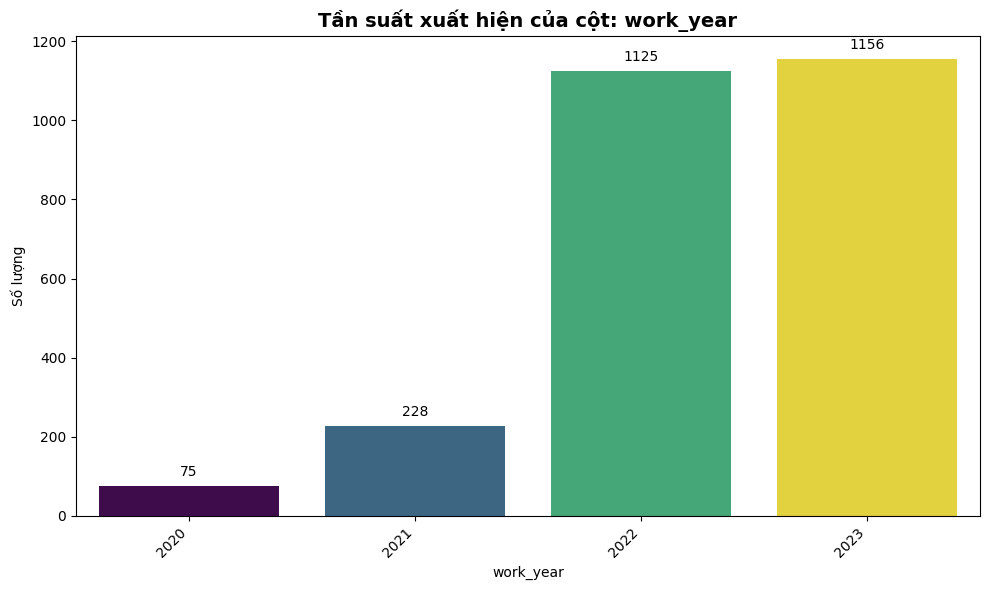

In [8]:
# Phân tích và vẽ biểu đồ work_year
vis.plot_bar_count(df, 'work_year', sort_by_index=True)

**Phân bố dữ liệu theo năm:**

- Phân bố  cho thấy **sự tập trung rất mạnh vào các năm gần đây**, đặc biệt là **2022 và 2023**, phản ánh **phạm vi thu thập dữ liệu của bộ dataset** hơn là sự tăng trưởng thực sự của thị trường Data Science theo thời gian.

    * **2020**: 75 bản ghi (2.9%) – số lượng rất hạn chế
    * **2021**: 228 bản ghi (8.8%) – vẫn ở mức thấp
    * **2022**: 1,125 bản ghi (43.5%) – chiếm tỷ trọng lớn
    * **2023**: 1,156 bản ghi (44.7%) – chiếm tỷ lệ cao nhất

**Phân bố bị mất cân bằng cao:** 
- Tỷ lệ giữa năm nhiều nhất (2023: 44.7%) và ít nhất (2020: 2.9%) chênh lệch **~15 lần**
- 2020-2021 bị thiếu dữ liệu nghiêm trọng, có thể gây thiên lệch khi phân tích xu hướng dài hạn

**Dữ liệu hoàn toàn nhất quán:**
- Chỉ có 4 giá trị số nguyên: 2020, 2021, 2022, 2023
- Không có vấn đề định dạng, typo, hoặc biến thể
- Không có giá trị bất thường (nằm ngoài khoảng hợp lý)

**Nhóm có ít quan sát:** **Năm 2020 (75 bản ghi, 2.9%)**. Do số lượng quan sát rất hạn chế (75 mẫu), các kết luận rút ra cho năm 2020 có độ tin cậy thống kê thấp và chỉ mang tính tham khảo.

### ***salary***

--- Số liệu cho cột salary ---

[1] Phân phối & xu hướng:
   - Mean: 210365.30
   - Median: 134630.00
   - Std Dev: 808037.54
   - Skewness: 24.09 (0 = normal, >0 = right-skewed, <0 = left-skewed)

[2] Phạm vi & giá trị ngoại lai:
   - Min: 6000
   - Max: 30400000
   - IQR: 92562.50 (Q1=90000.00, Q3=182562.50)
   - Biên outlier: [-48843.75, 321406.25]
   - Sô outlier: 95 (3.68%)

[3] Chất lượng dữ liệu:
   - Giá trị bị thiếu: 0 (0.00%)
----------------------------------------


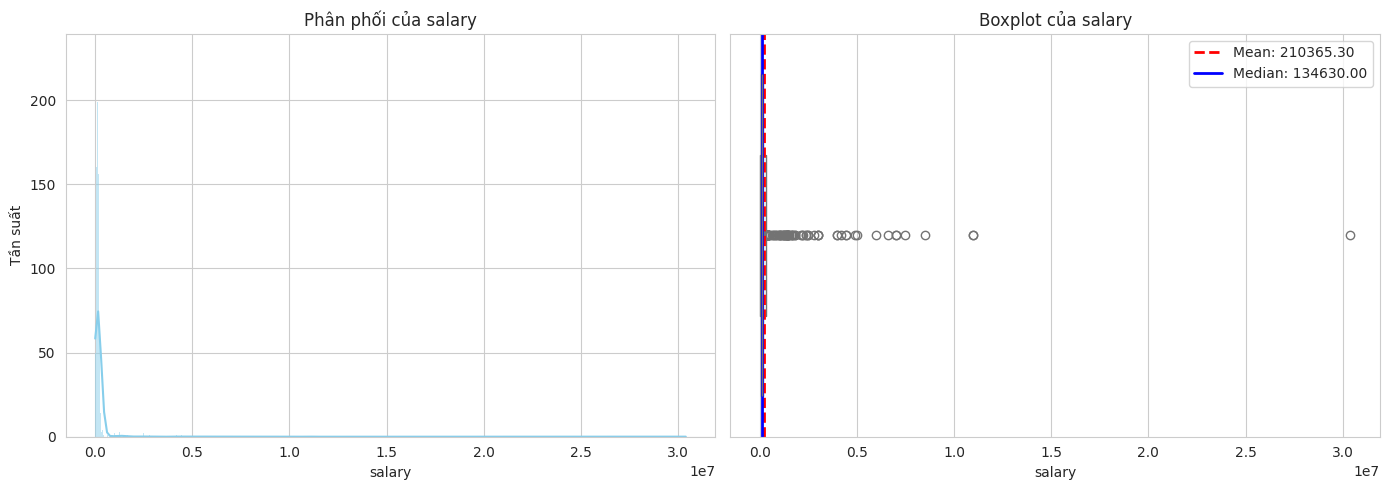

In [9]:
# Phân tích và vẽ biểu đồ salary
dp.analyze_numerical_column_metrics(df, 'salary')
vis.plot_column_distribution(df, 'salary')

In [10]:
print("Kiểm tra giá trị không thể có:")
print(f"salary < 0: {np.sum(df['salary'] < 0)}")

Kiểm tra giá trị không thể có:
salary < 0: 0


**Phân bố dữ liệu:**
Dữ liệu có **phân bố lệch phải cực mạnh** (skewness = 24.09), tập trung chủ yếu ở khoảng **dưới 500K**, trong khi có một số ít giá trị cực cao (lên đến **30.4M**).

**Xu hướng trung tâm:**

* **Mean (210K) >> Median (~135K)**: Chênh lệch lớn do outliers kéo trung bình lên cao
* **Median = 135K** phản ánh mức lương "điển hình" chính xác hơn
* **Độ phân tán rất cao** (Std Dev = 809K): Độ lệch chuẩn lớn, tuy nhiên chủ yếu bị chi phối mạnh bởi các giá trị ngoại lai ở phía phải phân bố, không phản ánh độ phân tán của phần lõi dữ liệu.

**Khoảng giá trị & Outliers:**

* **Khoảng lương**: 6K - 30.4M (chênh lệch ~5,000 lần)
* **95 outliers (3.68%)**: Các mức lương > 321K, có thể là vai trò đặc biệt hoặc **lỗi dữ liệu** (30.4M là bất thường)
* **IQR = 92.5K** (Q1=90K, Q3=182.5K): 50% dữ liệu nằm trong khoảng hẹp này

**Chất lượng dữ liệu:**

* **Không có giá trị thiếu** và không có lương âm
* **Cần kiểm tra outliers**: Giá trị 30.4M có thể là lỗi nhập liệu (nhầm đơn vị tiền tệ, thêm số 0,...)

### ***salary_in_usd***

--- Số liệu cho cột salary_in_usd ---

[1] Phân phối & xu hướng:
   - Mean: 133409.28
   - Median: 130000.00
   - Std Dev: 67136.84
   - Skewness: 0.62 (0 = normal, >0 = right-skewed, <0 = left-skewed)

[2] Phạm vi & giá trị ngoại lai:
   - Min: 5132
   - Max: 450000
   - IQR: 90025.00 (Q1=84975.00, Q3=175000.00)
   - Biên outlier: [-50062.50, 310037.50]
   - Sô outlier: 29 (1.12%)

[3] Chất lượng dữ liệu:
   - Giá trị bị thiếu: 0 (0.00%)
----------------------------------------


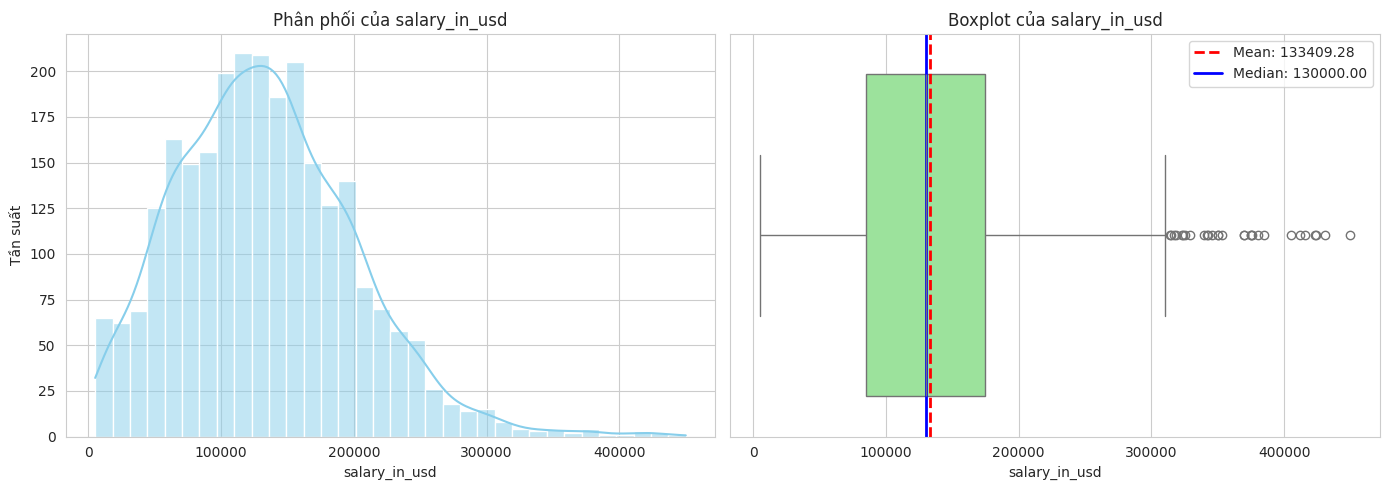

In [11]:
# Analyze and Visualize salary_in_usd
dp.analyze_numerical_column_metrics(df, 'salary_in_usd')
vis.plot_column_distribution(df, 'salary_in_usd')

In [12]:
print("Kiểm tra giá trị không thể có:")
print(f"salary_in_usd < 0: {np.sum(df['salary_in_usd'] < 0)}")

Kiểm tra giá trị không thể có:
salary_in_usd < 0: 0


**Phân bố dữ liệu:**
Dữ liệu có **phân bố gần chuẩn với lệch phải nhẹ** (skewness = 0.62), tập trung chủ yếu ở khoảng **100K-200K USD**. Đây là phân bố **hợp lý và tương đối đại diện** cho thị trường lương Data Science toàn cầu trong phạm vi dataset.

**Xu hướng trung tâm:**

* **Mean (133K) ≈ Median (130K)**: Chênh lệch nhỏ cho thấy dữ liệu cân đối hơn nhiều so với cột `salary` gốc
* **Std Dev = 67K**: Độ biến động vừa phải, phản ánh sự chênh lệch tự nhiên theo kinh nghiệm và vị trí
* Mức lương trung bình **133K USD** là con số hợp lý trong bối cảnh dữ liệu quan sát được.

**Khoảng giá trị & Outliers:**

* **Khoảng lương**: 5K - 450K (khoảng hợp lý hơn nhiều so với cột `salary`)
* **Chỉ 29 outliers (1.12%)**: Giảm đáng kể từ 3.68%, cho thấy việc quy đổi USD đã **chuẩn hóa tốt** dữ liệu
* **IQR = 90K** (Q1=85K, Q3=175K): 50% dữ liệu nằm trong khoảng hợp lý

**So sánh với cột `salary`:**

* **Phân bố ổn định hơn**: Skewness giảm từ 24.09 xuống 0.62
* **Ít outliers hơn**: Từ 95 xuống 29 điểm
* **Loại bỏ nhiễu tiền tệ**: Không còn các giá trị bất thường do khác biệt đơn vị tiền tệ hoặc lỗi quy đổi như 30.4M.

**Chất lượng dữ liệu:**

* **Không có giá trị thiếu** và không có lương âm
* **Dữ liệu đã được làm sạch tốt** thông qua quy đổi USD

### ***remote_ratio***

In [13]:
# In các giá trị duy nhất
print(f"Các giá trị duy nhất ({df['remote_ratio'].nunique()}): {df['remote_ratio'].unique()}")

# In các giá trị bị thiếu
missing_values = df['remote_ratio'].isnull().sum()
print(f"Số giá trị thiếu: {missing_values} ({missing_values/len(df)*100:.2f}%)")

Các giá trị duy nhất (3): [100   0  50]
Số giá trị thiếu: 0 (0.00%)


Tương tự `work_year`, vì `remote_ratio` chỉ có 3 giá trị khác nhau nên ta xem xét nó như một biến phân loại.

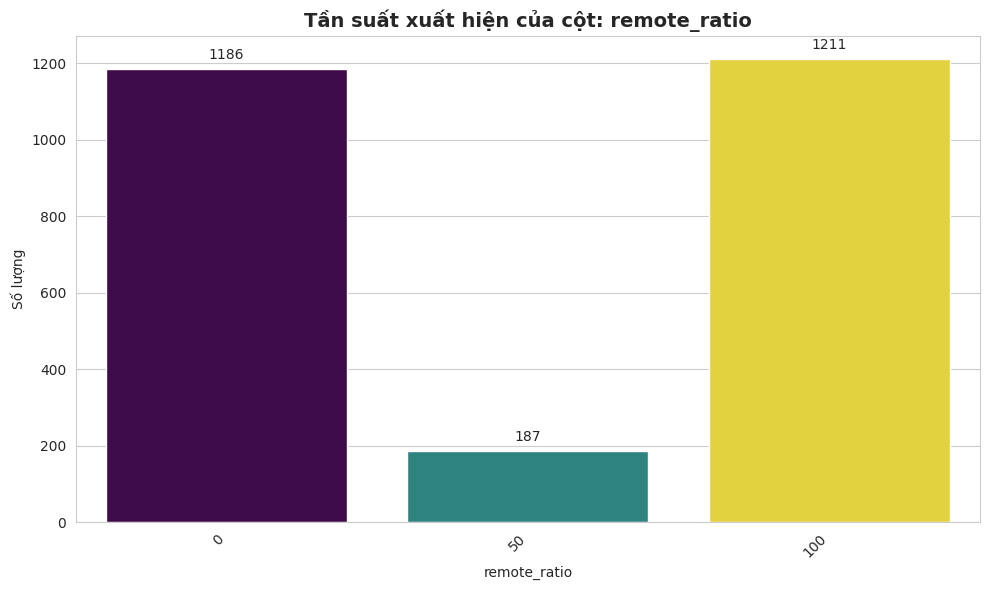

In [14]:
# Analyze and Visualize remote_ratio
# Vì remote_ratio chỉ có 3 giá trị (0, 50, 100), ta xem nó như biến phân loại
vis.plot_bar_count(df, 'remote_ratio')

**Phân bố dữ liệu theo mô hình làm việc:**

- Dữ liệu có **phân bố hai cực rõ rệt** với 3 nhóm làm việc, trong đó hai mô hình (**onsite** và **remote**) chiếm áp đảo:

  - **0% (Onsite)**: 1,186 bản ghi (45.9%) - làm việc hoàn toàn tại văn phòng
  - **50% (Hybrid)**: 187 bản ghi (7.2%) - kết hợp remote và onsite
  - **100% (Remote)**: 1,211 bản ghi (46.9%) - làm việc hoàn toàn từ xa

**Xu hướng chính:**

- **Phân hóa mạnh giữa Onsite vs Remote**: Hai nhóm 0% và 100% chiếm **92.8% tổng dữ liệu** (2,397/2,584 bản ghi), cho thấy trong phạm vi dữ liệu quan sát được, hai mô hình này chiếm ưu thế. Mô hình **Hybrid (50%) chỉ chiếm thiểu số** với 7.2%, **có thể** phản ánh việc các công ty ít cho phép nhân viên kết hợp 2 mô hình làm việc, ít nhất là dựa trên tần suất trong dataset.

**Phân bố tương đối cân bằng giữa Onsite và Remote**: 
- Tỷ lệ 0% (45.9%) và 100% (46.9%) gần như ngang nhau, chỉ chênh 1%
- **Mất cân bằng tại nhóm Hybrid**: 50% chỉ có 187 bản ghi, chênh lệch **~6.5 lần** so với hai nhóm còn lại
- Phân bố phản ánh sự đa dạng trong mô hình làm việc, chưa có mô hình nào chiếm ưu thế tuyệt đối.

**Dữ liệu hoàn toàn nhất quán**:
- Chỉ có 3 giá trị số nguyên: 0, 50, 100
- Không có vấn đề định dạng, giá trị trung gian (vd: 25, 75), hoặc typo
- Không có giá trị bất thường (ngoài khoảng 0-100%)

**Nhóm có ít quan sát:** **Nhóm Hybrid 50% (187 bản ghi, 7.2%)**. Mặc dù có số lượng quan sát thấp, đây vẫn là một nhóm hợp lệ và mang ý nghĩa thực tế, phản ánh mức độ phổ biến thấp hơn của mô hình Hybrid trong dữ liệu.

## **2.3. Phân tích các cột phân loại**


**Xác định danh sách các cột phân loại dựa trên kiểu dữ liệu:**

In [15]:
# Liệt kê các cột phân loại dựa trên dtype object
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Danh sách các cột phân loại:")
print(cat_cols)

Danh sách các cột phân loại:
['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


### ***experience_level***

Phân tích cột: experience_level
Số lượng giá trị khác nhau: 4

Value counts:
experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64 



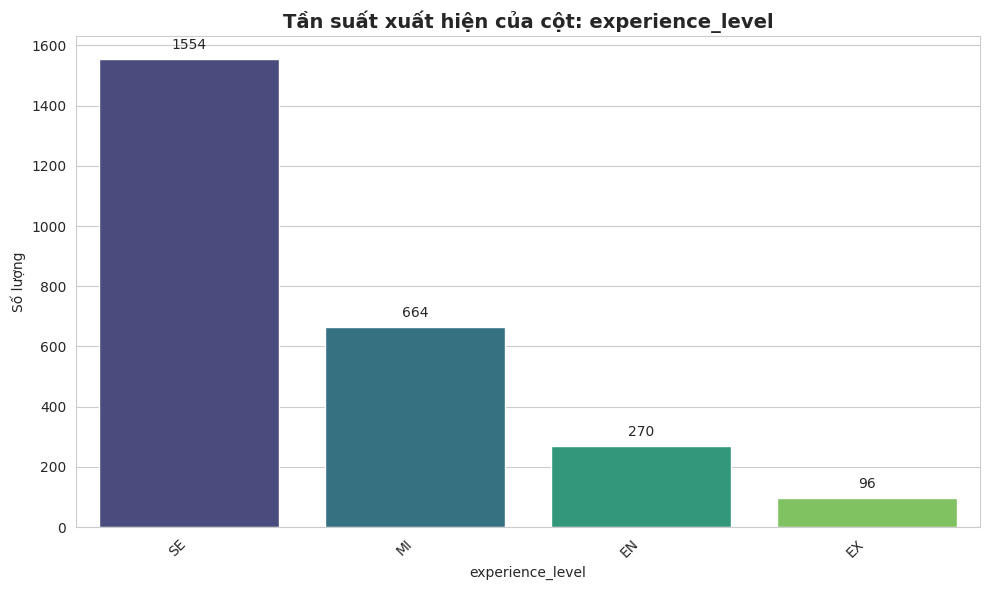

In [16]:
dp.analyze_categorical_column(df, 'experience_level')
vis.plot_bar_count(df, 'experience_level')

Có **ít giá trị phân loại** \rightarrow thuộc nhóm **low-cardinality** dễ xử lý và thuận lợi cho trực quan hóa.
Phân phối cấp độ kinh nghiệm cho thấy:
- **Senior Level** chiếm áp đảo với 1554 mẫu.
- **Mid Level** đứng thứ hai với 664 mẫu.
- **Entry Level** chỉ chiếm 270 mẫu.
- **Executive Level** là nhóm hiếm, chỉ 96 mẫu.

Điều này phản ánh rằng dataset thiên nhiều về các vị trí senior, điều có thể ảnh hưởng đến phân tích mức lương chung (salary skewness).  
Nhóm EX quá ít, có thể xem xét gom nhóm khi mô hình hóa.

### ***employment_type***

Phân tích cột: employment_type
Số lượng giá trị khác nhau: 4

Value counts:
employment_type
FT    2547
PT      17
CT      10
FL      10
Name: count, dtype: int64 



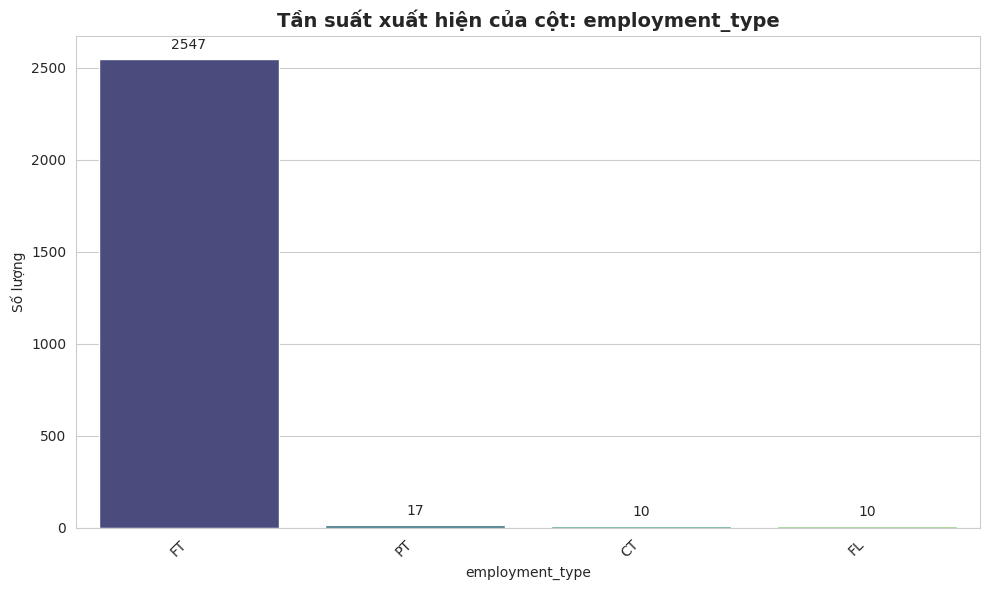

In [17]:
dp.analyze_categorical_column(df, 'employment_type')
vis.plot_bar_count(df, 'employment_type')

Có **ít giá trị phân loại** → thuộc nhóm **low-cardinality**

Tần suất loại hợp đồng:
- **Full-time** chiếm gần như toàn bộ (2547 mẫu) \rightarrow >97%.
- Các loại Part-time, Contractor, Freelance cực kỳ ít.

Điều này có nghĩa là:
- Phân tích dựa trên loại hợp đồng sẽ không có nhiều ý nghĩa vì dữ liệu lệch mạnh.
- Khi trực quan hóa, chỉ nên hiển thị Full-time và gom các loại khác thành “Other”.

### ***job_title***

Phân tích cột: job_title
Số lượng giá trị khác nhau: 93

Value counts:
job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Data Science Tech Lead         1
Head of Machine Learning       1
Staff Data Scientist           1
Finance Data Analyst           1
Name: count, Length: 93, dtype: int64 



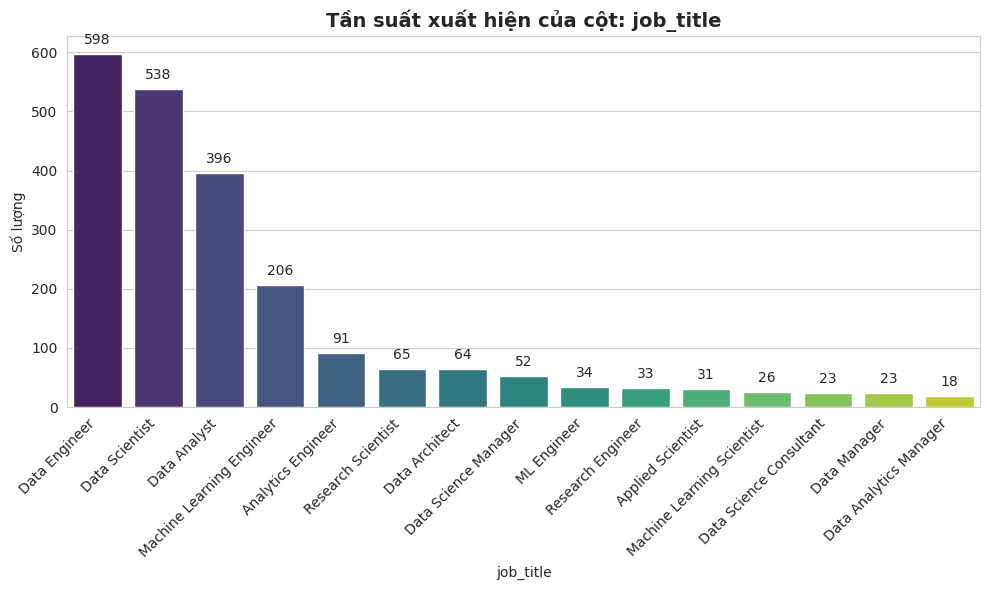

In [18]:
dp.analyze_categorical_column(df, 'job_title')
vis.plot_bar_count(df, 'job_title', 15)

Có **93 giá trị**, là cột có độ đa dạng cao nhất. Việc trực quan tất cả job title có thể gây nhiễu, nên cần giới hạn theo nhóm phổ biến nhất.
Sự phân bố rất lệch:
- 3 vị trí phổ biến nhất:
  - Data Engineer - 596 mẫu  
  - Data Scientist - 538 mẫu  
  - Data Analyst - 396 mẫu  
- Phần lớn job title còn lại chỉ có vài mẫu, thậm chí chỉ **1 mẫu**.

Kết luận:
- Đây là một biến **high-cardinality**.
- Trực quan hóa toàn bộ là không khả thi.
- Trong EDA, nên chọn **top 10 hoặc top 15 job titles** để phân tích sâu hơn.
- Khi mô hình hóa, có thể cần chuẩn hóa hoặc gom nhóm theo category lớn (ví dụ: "Data Analyst", "Data Engineer").

### ***salary_currency***

Phân tích cột: salary_currency
Số lượng giá trị khác nhau: 20

Value counts:
salary_currency
USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
BRL       6
SGD       6
PLN       5
CHF       4
TRY       3
HUF       3
DKK       3
JPY       3
THB       2
HKD       1
ILS       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64 



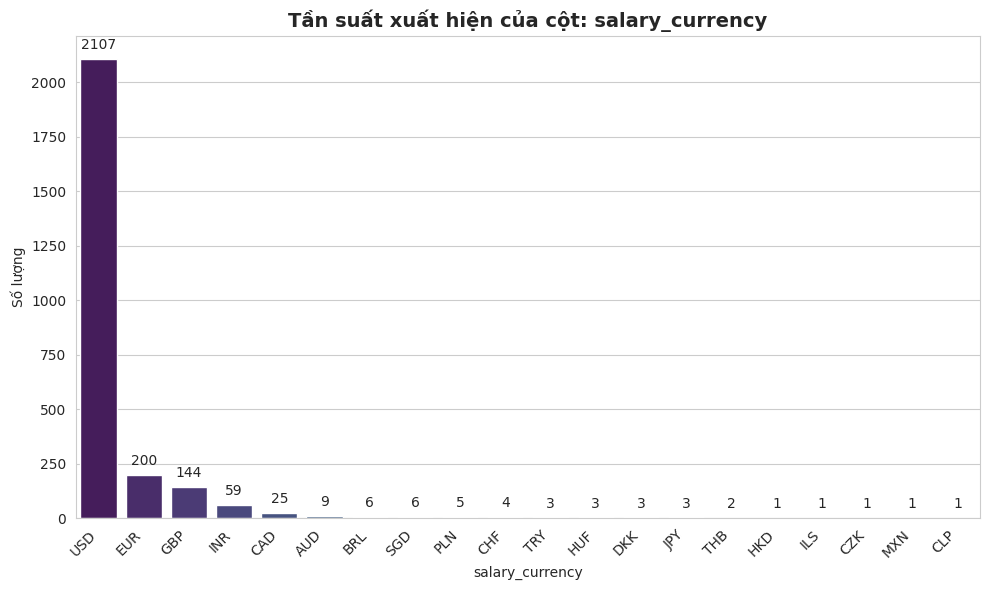

In [19]:
dp.analyze_categorical_column(df, 'salary_currency')
vis.plot_bar_count(df, 'salary_currency')

Có mức độ đa dạng trung bình (20 giá trị). 
    
Loại tiền tệ:
- **USD chiếm 2107 mẫu** (áp đảo).
- EUR, GBP là hai nhóm lớn tiếp theo.
- Các currency khác chỉ xuất hiện vài lần.

Vấn đề EDA:
- Không cần phân tích sâu vì ta đã có cột `salary_in_usd`.
- Dữ liệu currency skew \rightarrow không thích hợp cho biểu đồ bar full.

### ***employee_residence & company_location***

Phân tích cột: employee_residence
Số lượng giá trị khác nhau: 78

Value counts:
employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
      ... 
RS       1
NZ       1
MD       1
LU       1
MT       1
Name: count, Length: 78, dtype: int64 



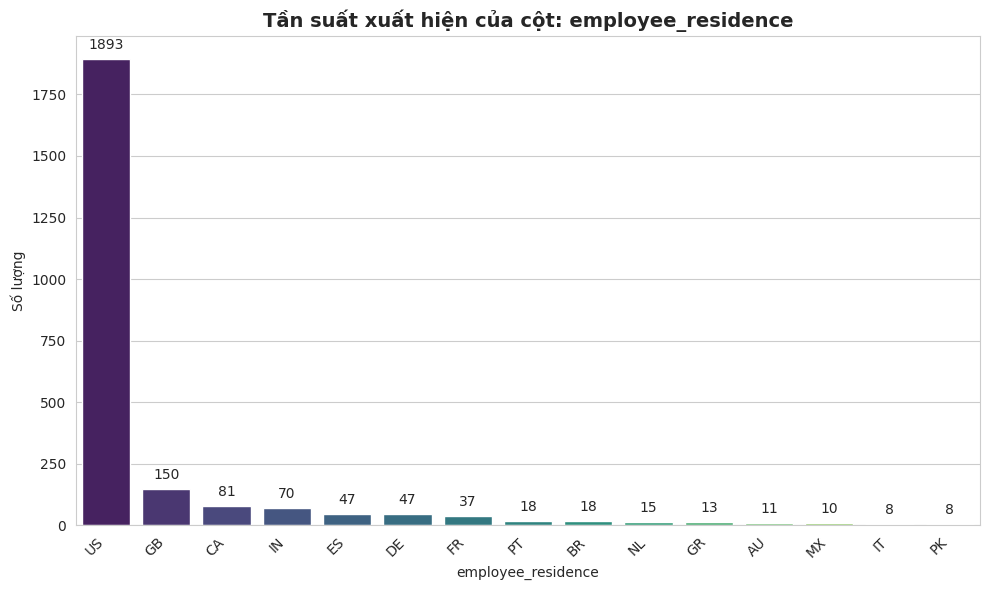

In [20]:
dp.analyze_categorical_column(df, 'employee_residence')
vis.plot_bar_count(df, 'employee_residence', top_n=15)

Phân tích cột: company_location
Số lượng giá trị khác nhau: 72

Value counts:
company_location
US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
BS       1
IR       1
CR       1
AL       1
BA       1
Name: count, Length: 72, dtype: int64 



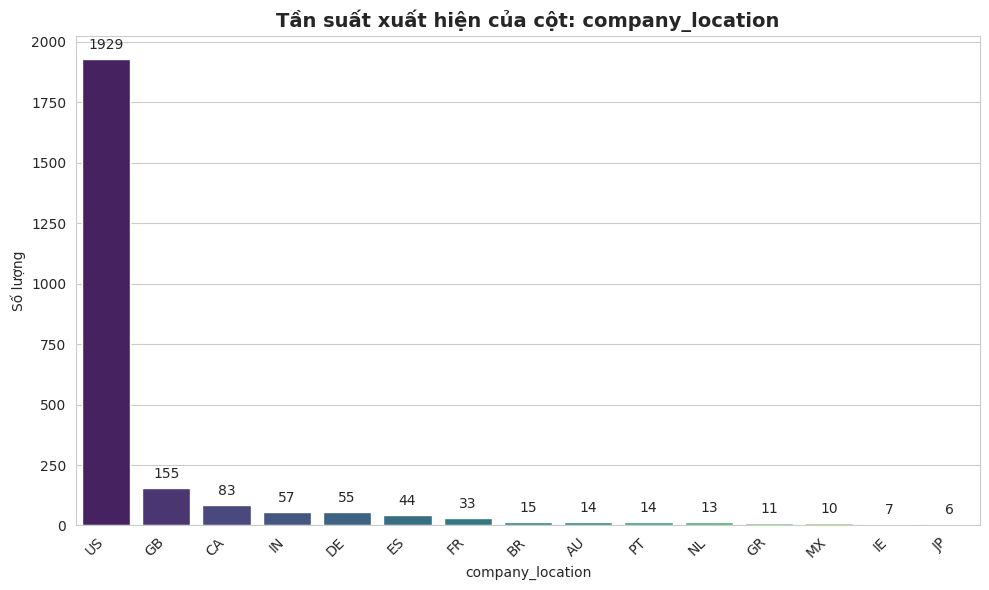

In [21]:
dp.analyze_categorical_column(df, 'company_location')
vis.plot_bar_count(df, 'company_location', top_n=15)

Đều có lượng phân loại rất cao:
- 78 quốc gia cư trú  
- 72 quốc gia đặt công ty  

Trong cả hai:
- **US chiếm hơn 50% dữ liệu**.
- GB, CA, ES, IN chiếm phần nhỏ.
- Phần lớn quốc gia còn lại chỉ có 1-3 mẫu.

### ***company_size***

Phân tích cột: company_size
Số lượng giá trị khác nhau: 3

Value counts:
company_size
M    2028
L     409
S     147
Name: count, dtype: int64 



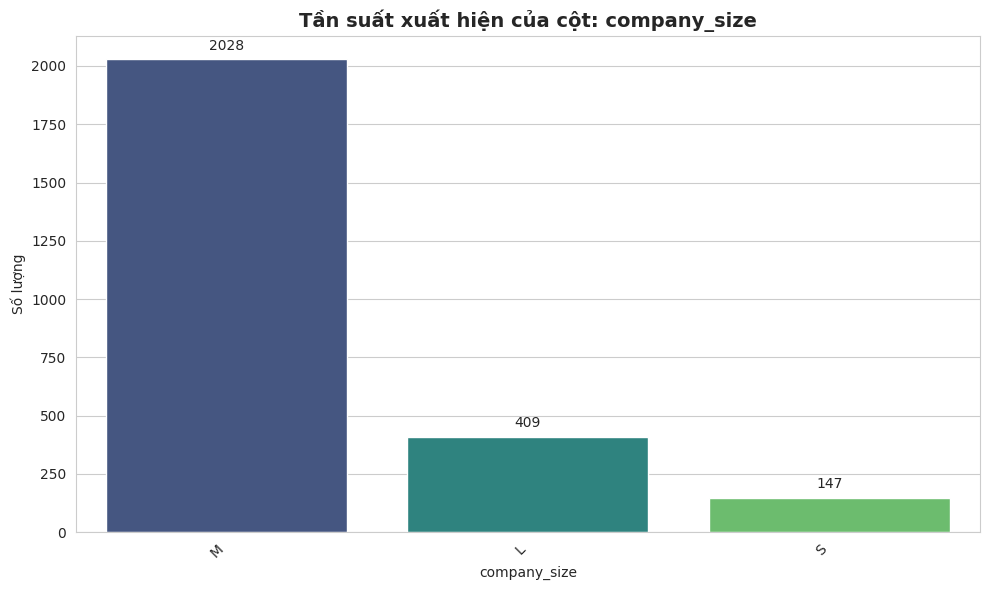

In [22]:
dp.analyze_categorical_column(df, 'company_size')
vis.plot_bar_count(df, 'company_size')

Có **ít giá trị phân loại** → thuộc nhóm **low-cardinality**
Ba phân loại:
- M (medium) \rightarrow 2028 mẫu (đa số)
- L (large) \rightarrow 409 mẫu
- S (small) \rightarrow 147 mẫu

Rất rõ ràng: phần lớn công ty trong dataset thuộc quy mô trung bình.

### ***Tóm tắt:***

- Một số cột có phân phối lệch mạnh (employment_type, company_size).
- Một số cột có cardinality rất cao (job_title, residence, company location).
- EDA tiếp theo nên:
  - Trực quan hóa các biến có cardinality thấp (bar chart trực tiếp).
  - Với các biến có cardinality cao \rightarrow chỉ dùng **top N**.
  - Kiểm tra quan hệ giữa từng biến và `salary_in_usd`.

Tiếp theo, chúng ta sẽ tạo trực quan hóa để nắm bắt phân phối rõ hơn.

In [23]:
# Kiểm tra số lượng giá trị duy nhất cho từng cột phân loại
print("\nSố lượng giá trị khác nhau trong mỗi cột:")
df[cat_cols].nunique().sort_values()


Số lượng giá trị khác nhau trong mỗi cột:


company_size           3
experience_level       4
employment_type        4
salary_currency       20
company_location      72
employee_residence    78
job_title             93
dtype: int64

## **2.4. Kiểm tra dữ liệu thiếu và dữ liệu bất thường**

### **Kiểm tra missing value:**

Với các phân tích từng cột ở trên, ta dễ dàng nhận ra không có dữ liệu bị thiếu. Kiểm tra:

In [24]:
print("=== Missing Values ===")
missing_values = df[cat_cols].isnull().sum()
print(missing_values[missing_values > 0] if missing_values.any() else "Không có missing value.")

=== Missing Values ===
Không có missing value.


### **Kiểm tra quy đổi currency**

In [25]:
dp.check_currency_rates(df)

=== SUMMARY: Exchange Rate Consistency by Currency ===

HUF  | min_rate=0.002679 | max_rate=0.003296 | diff=23.02% | count=3
PLN  | min_rate=0.224060 | max_rate=0.258873 | diff=15.54% | count=5
GBP  | min_rate=1.215211 | max_rate=1.375467 | diff=13.19% | count=144
EUR  | min_rate=1.050650 | max_rate=1.182058 | diff=12.51% | count=200
INR  | min_rate=0.012158 | max_rate=0.013524 | diff=11.23% | count=59
AUD  | min_rate=0.683180 | max_rate=0.750500 | diff=9.85% | count=9
CAD  | min_rate=0.739327 | max_rate=0.797626 | diff=7.89% | count=25
BRL  | min_rate=0.185359 | max_rate=0.193524 | diff=4.40% | count=6
DKK  | min_rate=0.152987 | max_rate=0.158942 | diff=3.89% | count=3
SGD  | min_rate=0.725078 | max_rate=0.750200 | diff=3.46% | count=6
CHF  | min_rate=1.046963 | max_rate=1.081187 | diff=3.27% | count=4
JPY  | min_rate=0.009102 | max_rate=0.009368 | diff=2.93% | count=3
TRY  | min_rate=0.112061 | max_rate=0.112065 | diff=0.00% | count=3
THB  | min_rate=0.029452 | max_rate=0.029453 | di

(   salary_currency       min       max  count   diff_pct
 10             HUF  0.002679  0.003296      3  23.023072
 15             PLN  0.224060  0.258873      5  15.537234
 8              GBP  1.215211  1.375467    144  13.187521
 7              EUR  1.050650  1.182058    200  12.507276
 12             INR  0.012158  0.013524     59  11.227653
 0              AUD  0.683180  0.750500      9   9.853918
 2              CAD  0.739327  0.797626     25   7.885312
 1              BRL  0.185359  0.193524      6   4.404625
 6              DKK  0.152987  0.158942      3   3.892496
 16             SGD  0.725078  0.750200      6   3.464762
 3              CHF  1.046963  1.081187      4   3.268935
 13             JPY  0.009102  0.009368      3   2.930738
 18             TRY  0.112061  0.112065      3   0.003305
 17             THB  0.029452  0.029453      2   0.002102
 5              CZK  0.042767  0.042767      1   0.000000
 4              CLP  0.001317  0.001317      1   0.000000
 11           

#### *Nhận xét về hiện tượng khác biệt tỉ giá và lý do dataset vẫn hợp lệ*

Khi kiểm tra tỉ giá thực tế (`salary_in_usd / salary`) theo từng loại tiền tệ, ta thấy rằng nhiều currency như **HUF, PLN, GBP, EUR, INR, AUD, CAD** có độ lệch tỉ giá khá lớn (từ 7% đến hơn 20%). Điều này có thể trông giống như dữ liệu bị sai hoặc quy đổi không chính xác. Tuy nhiên, đây **không phải lỗi của dataset**.

#### *Giải thích hiện tượng*
Mức độ lệch tỉ giá xảy ra vì dataset:
- được tổng hợp từ **nhiều năm khác nhau**,  
- đến từ **nhiều nguồn khác nhau**,  
- và **mỗi dòng có thể sử dụng tỉ giá theo thời điểm** thay vì một bảng tỉ giá cố định.

Điều này đặc biệt dễ thấy ở các currency có biến động mạnh theo thời gian như **INR, PLN, HUF, JPY**, hoặc các đồng tiền chịu ảnh hưởng tỷ giá thị trường hàng ngày.

Do đó, việc các dòng cùng một currency không sử dụng đúng một tỉ giá duy nhất là **hoàn toàn bình thường** trong bối cảnh dữ liệu thị trường nhân sự quốc tế.

#### *Kết luận*
- Dataset **không sai**,  
- **không có lỗi quy đổi bất thường**,  
- và **không có dấu hiệu dữ liệu bị nhập sai hoặc bị làm bẩn**.  

Sự khác biệt tỉ giá chỉ phản ánh **tính tự nhiên của dữ liệu thực tế**, nơi tỉ giá thay đổi theo ngày, theo năm và theo nguồn thu thập. Đây là đặc điểm **hợp lý và chấp nhận được** khi làm việc với dữ liệu thị trường toàn cầu.


### **Kiểm tra các giá trị bất thường của cột job_title (có quá nhiều giá trị)**

In [26]:
dp.check_job_title_anomalies(df)

=== Số dòng có dấu hiệu bất thường: 4


,job_title,has_weird_chars,multiple_spaces,all_caps,all_lower,too_short,too_long,contains_number,duplicate_words
2022,3D Computer Vision Researcher,False,False,False,False,False,False,True,False
2149,3D Computer Vision Researcher,False,False,False,False,False,False,True,False
2206,3D Computer Vision Researcher,False,False,False,False,False,False,True,False
3537,3D Computer Vision Researcher,False,False,False,False,False,False,True,False


#### *Nhận xét kiểm tra tính bất thường của cột `job_title`*

Sau khi chạy các bước kiểm tra định dạng và bất thường trong cột `job_title`, kết quả cho thấy:

- Số dòng có dấu hiệu bất thường: **4**
- Tất cả 4 dòng đều có cùng giá trị: **"3D Computer Vision Researcher"**

Điểm bất thường duy nhất được phát hiện đến từ tiêu chí **chứa số trong job title**. Tuy nhiên, đây không phải lỗi:

#### *Giải thích hiện tượng*
Các job title như **“3D Computer Vision Researcher”** hoàn toàn hợp lệ trong lĩnh vực ngành dữ liệu – thuật ngữ “3D” mô tả lĩnh vực thị giác máy tính 3 chiều. Do vậy, việc chứa số không mang tính chất “bất thường” hay “sai format”, mà chỉ phản ánh đặc thù của mô tả công việc.

#### *Kết luận*
- Cột **job_title hoàn toàn sạch**, không tồn tại lỗi ghi nhầm, sai format hay giá trị bất thường.
- 4 dòng bị gắn cờ chỉ **do chứa số**, nhưng đây là **trường hợp hoàn toàn hợp lệ** và có thể bỏ qua trong phân tích thực tế.
- Dataset **ổn định, nhất quán và không có lỗi nghiêm trọng** trong phần job title.



In [27]:
anomalies = dp.check_remote_anomalies(df)

=== Số dòng bất thường (khác quốc gia nhưng remote_ratio = 0):  7
      work_year experience_level employment_type             job_title  \
183        2020               EX              FT    Staff Data Analyst   
736        2023               EN              FT         AI Programmer   
974        2022               EX              FT  Data Science Manager   
3621       2021               EN              FT    Research Scientist   
3664       2021               MI              FT         Data Engineer   
3696       2021               MI              FL         Data Engineer   
3705       2021               EN              FT     Big Data Engineer   

      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
183    15000             USD          15000                 NG             0   
736    70000             USD          70000                 IN             0   
974   106000             USD         106000                 UZ             0   
3621  100000         

### **Phân tích các trường hợp bất thường về `remote_ratio`**

Hàm `check_remote_anomalies` đã lọc ra những dòng có **`employee_residence` khác `company_location` nhưng `remote_ratio = 0`**, tức là nhân viên khác quốc gia nhưng vẫn được báo là không làm remote. Đây là các dòng bất thường, vì trong thực tế, nếu nhân viên ở quốc gia khác, thường phải làm remote ít nhất một phần.

#### *Đánh giá hiện tượng*

1. **Khả năng dữ liệu không chính xác:**  
   - `remote_ratio = 0` nhưng nhân viên ở quốc gia khác với công ty, điều này bất hợp lý. Có thể là do dữ liệu bị nhập sai hoặc thiếu thông tin.

2. **Khả năng hợp lý (ít gặp hơn):**  
   - Một số trường hợp hiếm, ví dụ nhân viên đang làm onsite tạm thời hoặc đi công tác nhưng vẫn được ghi `remote_ratio = 0`.

**Kết luận:** Những dòng này nên được đánh dấu là **bất thường** để xử lý thêm trong EDA hoặc khi xây dựng mô hình, có thể cần chỉnh sửa hoặc loại bỏ để tránh gây nhiễu dữ liệu.


In [28]:
df.drop(index=anomalies.index, inplace=True)

## **2.5. Mối quan hệ & Tương quan**

### **Tiền xử lý sơ bộ**

Để thuận tiện cho quá trình phân tích tương quan và đảm bảo tính nhất quán của các biểu đồ, nhóm thực hiện một bước chuẩn hóa dữ liệu sơ bộ thông qua pipeline `clean_data_pipeline`.

Các tác vụ thực hiện bao gồm:
1.  **Gom nhóm chức danh công việc:** Do dữ liệu có tới nhiều chức danh công việc khác nhau (ở `job_title`), chúng được gom về 6 nhóm chức năng chính (Data Scientist, Data Engineer, Analyst, ML/AI Engineer, Manager/Lead, Other) thành cột mới là `job_category` để phân tích xu hướng rõ ràng hơn.
2.  **Chuẩn hóa nhãn (Label Mapping):** Chuyển đổi các mã viết tắt sang tên đầy đủ để dễ đọc hiểu (Ví dụ: 'SE' $\rightarrow$ 'Senior Level', 'FT' $\rightarrow$ 'Full-time').
3.  **Chuẩn hóa tên quốc gia:** Sử dụng thư viện *country_converter* để chuyển đổi mã quốc gia (ISO-3) sang tên quốc gia đầy đủ, giúp biểu diễn dữ liệu trực quan hơn trong các biểu đồ bản đồ.

In [29]:
df = dp.clean_data_pipeline(df)

# Kiểm tra lại kết quả sau khi chuẩn hóa
print(f"Kích thước dữ liệu sau khi xử lý sơ bộ: {df.shape}")
print("-" * 30)
print("Các nhóm công việc (Job Categories) đã được tạo:")
print(df['job_category'].value_counts())
print("-" * 30)

print("5 dòng dữ liệu đầu tiên sau khi xử lý sơ bộ:")
df.head()

Kích thước dữ liệu sau khi xử lý sơ bộ: (2577, 12)
------------------------------
Các nhóm công việc (Job Categories) đã được tạo:
job_category
Data Engineer     1147
Data Scientist     709
Data Analyst       458
Manager/Lead       179
Other               65
ML/AI Engineer      19
Name: count, dtype: int64
------------------------------
5 dòng dữ liệu đầu tiên sau khi xử lý sơ bộ:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior Level,Full-time,Principal Data Scientist,80000,EUR,85847,Spain,100,Spain,Large,Manager/Lead
1,2023,Mid Level,Contractor,ML Engineer,30000,USD,30000,United States,100,United States,Small,Data Engineer
2,2023,Mid Level,Contractor,ML Engineer,25500,USD,25500,United States,100,United States,Small,Data Engineer
3,2023,Senior Level,Full-time,Data Scientist,175000,USD,175000,Canada,100,Canada,Medium,Data Scientist
4,2023,Senior Level,Full-time,Data Scientist,120000,USD,120000,Canada,100,Canada,Medium,Data Scientist


### **Tương quan giữa các biến số**
**Mục tiêu**: Xác định mối quan hệ tuyến tính giữa các biến số định lượng: `work_year`, `remote_ratio`, `remote_ratio` và `salary_in_usd`

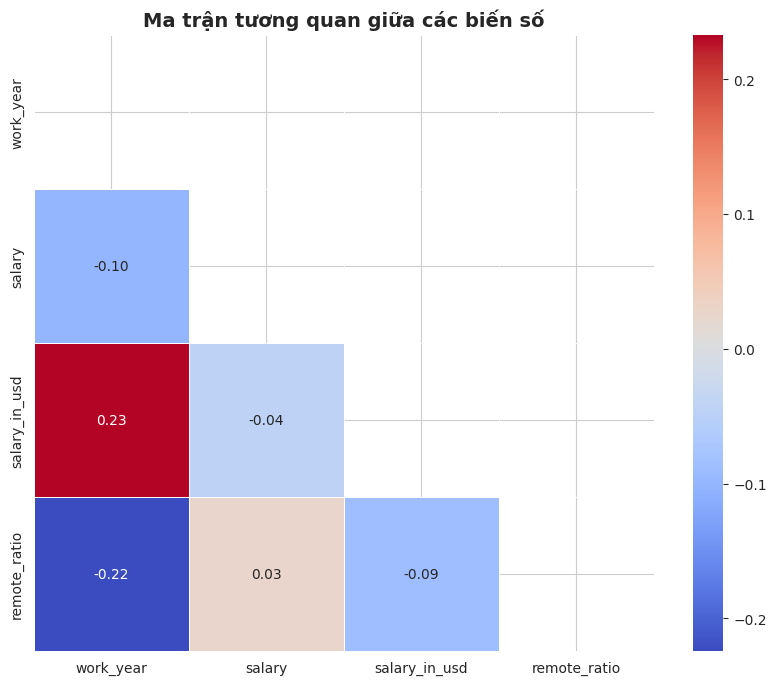

In [30]:
# Tương quan giữa work_year, salary_in_usd, remote_ratio
vis.plot_correlation_heatmap(df, title="Ma trận tương quan giữa các biến số")

**Phân tích**:

- **Mối liên hệ giữa Năm làm việc (`work_year`) và Lương (`salary_in_usd`)**: Tương quan dương yếu (khoảng 0.23). Điều này cho thấy theo thời gian, mức lương trung bình trong ngành có xu hướng tăng lên, phản ánh sự phát triển của thị trường Data Science.

- **Tỷ lệ làm việc từ xa (`remote_ratio`)**: Tương quan với lương ở mức âm. Điều này nghĩa là làm việc từ xa hay tại văn phòng không trực tiếp quyết định mức lương cao hay thấp

### **Tương quan giữa Mức lương (`salary_in_usd`) vs Kinh nghiệm (`experience_level`)**

**Mục tiêu**: Kiểm chứng giả thuyết "Kinh nghiệm càng cao, lương càng lớn" và xác định mức độ chênh lệch thu nhập giữa các cấp bậc.

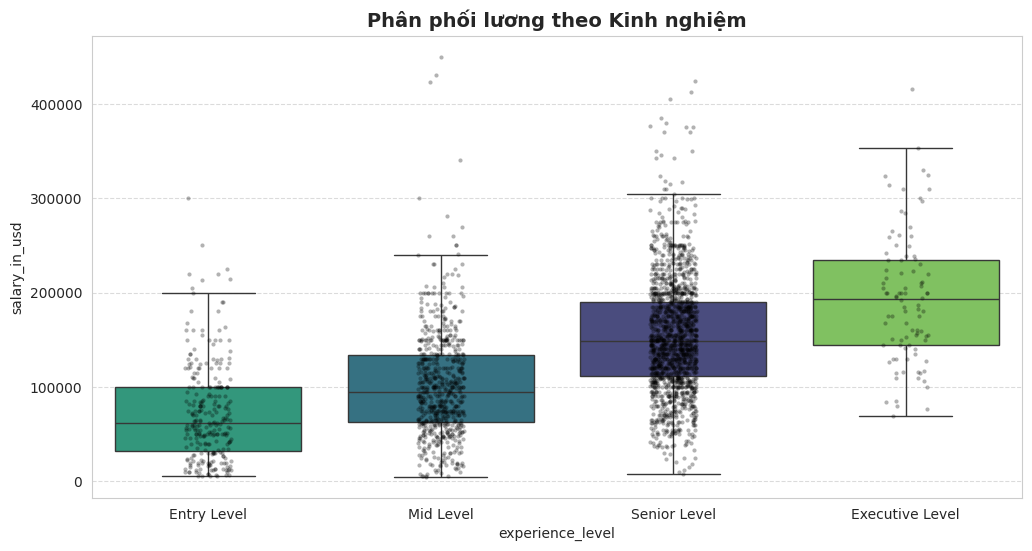

In [31]:
# Lương theo Kinh nghiệm (Sắp xếp theo thứ tự)
order_exp = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']
vis.plot_categorical_vs_numerical_box(
    df,
    cat_col='experience_level',
    num_col='salary_in_usd',
    order=order_exp,
    title="Phân phối lương theo Kinh nghiệm"
)

**Phân tích**:

- Có sự phân cấp rõ rệt về thu nhập giữa các cấp bậc kinh nghiệm theo quy luật `EN < MI < SE < EX`. Mức lương trung bình của cấp Executive (EX) vượt xa so với Entry (EN) (thường gấp 2.5 đến 3 lần).

- **Độ biến động**: 
  - Cấp độ **Senior (SE)** và **Executive (EX)** có dải lương rất rộng, cho thấy ở mức độ kinh nghiệm này, vẫn còn những yếu tố khác tạo ra sự khác biệt thu nhập lớn.

  - Cấp độ **Entry (EN)** có dải lương hẹp nhất, cho thấy thị trường có mức lương trần ổn định đối với những người mới đi làm.

- Một số vị trí **Mid-level (MI)** có mức lương cao bất thường, tương đương với **Senior (SE)** (biểu hiện qua các điểm Outliers phía trên).Có thể lí giải do các cá nhân này làm việc tại các công ty công nghệ lớn (Big Tech) hoặc ở các quốc gia có chi phí sinh hoạt đắt đỏ.

### **Tương quan giữa Mức lương (`salary_in_usd`) và Nhóm công việc (`job_category`)**

**Mục tiêu**: Khám phá sự phân hóa thu nhập giữa các vai trò chuyên môn khác nhau trong thị trường Data Science.

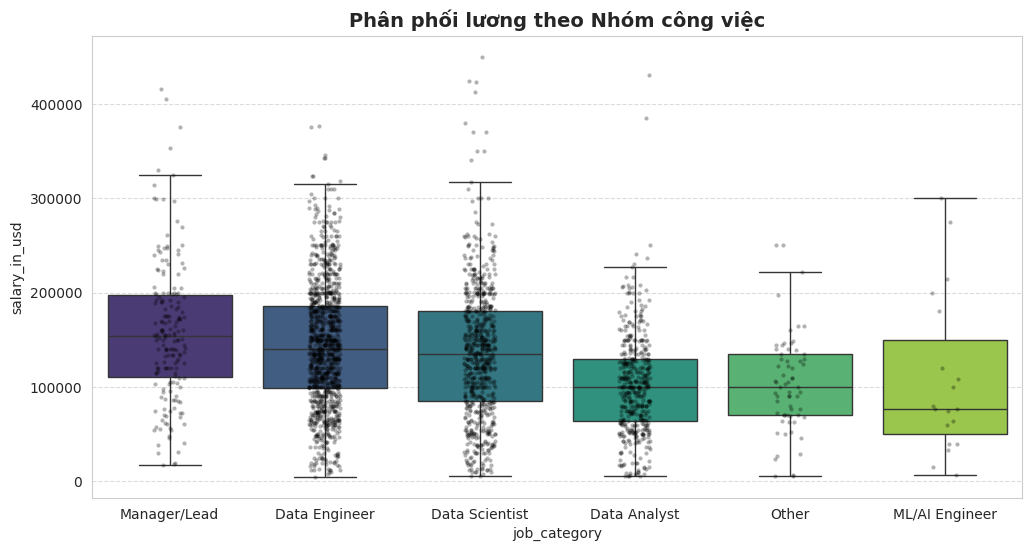

In [32]:
# Lương theo Nhóm công việc (Job Category)
vis.plot_categorical_vs_numerical_box(
    df,
    cat_col='job_category',
    num_col='salary_in_usd',
    title="Phân phối lương theo Nhóm công việc"
)

**Phân tích**:

- Dễ đoán được vị trí có mức lương cao nhất là **Manager/Lead**, đây cũng thường là những vị trí cao nhất trong phòng ban về Data của các công ty.
  
- Các vị trí **Data Engineer** và **Data Scientist** có mức lương trung bình khá tương đồng, đồng thời với dải lương rộng, mật độ cao nhất, cho thấy đây là hai vai trò chủ chốt và phổ biến nhất trong ngành.
  
- Vị trí **Data Analyst** có mức lương thấp hơn đáng kể so với các vai trò trên. Có thể lí giải do tính chất công việc thường ít kỹ thuật hơn và yêu cầu kinh nghiệm thấp hơn.
  
- Nhóm còn lại là **Other** và **ML/AI Engineer** có mức lương trung bình khá tương đồng và cũng ít mẫu dữ liệu hơn so với nhóm **Data** và **Manager/Lead**.

### **Tương quan giữa Mức lương (`salary_in_usd`) vs Quy mô công ty (`company_size`)**

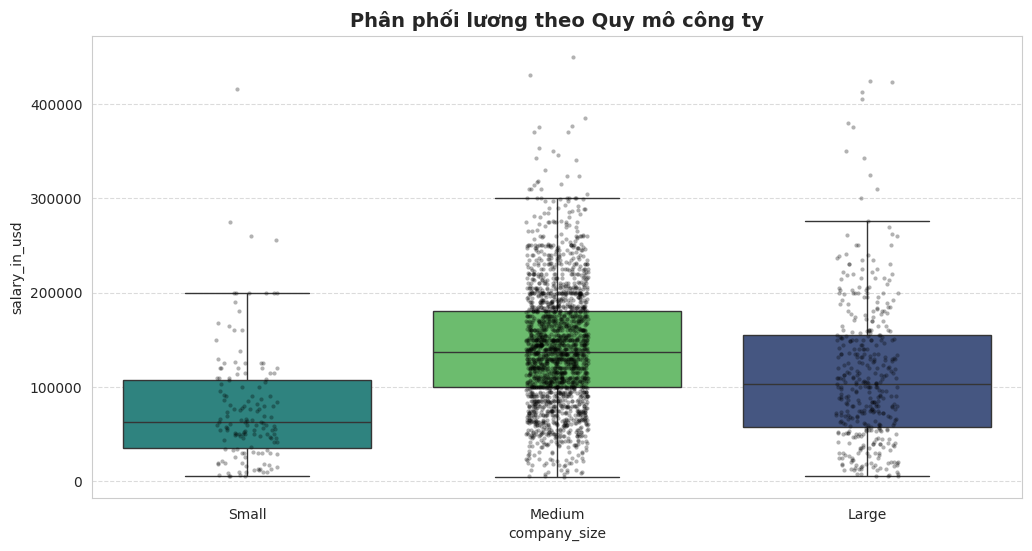

In [33]:
# Thứ tự logic: Small -> Medium -> Large
size_order = ['Small', 'Medium', 'Large']
vis.plot_categorical_vs_numerical_box(
    df,
    cat_col='company_size',
    num_col='salary_in_usd',
    order=size_order,
    title="Phân phối lương theo Quy mô công ty"
)

**Phân tích**:
 
- Công ty quy mô **Trung bình** **(Medium - M)**: Trái với suy nghĩ thông thường, các công ty quy mô vừa (M) hiện đang trả mức lương trung bình cao hơn cả **công ty lớn (L)**.

- **Giải thích**: Các công ty quy mô trung bình (thường là các *Startup* đã gọi vốn thành công hoặc công ty Product) sẵn sàng trả lương cao để thu hút nhân tài từ các tập đoàn lớn.

- Công ty **Nhỏ (Small - S)**: Có mức lương thấp nhất và dải lương hẹp nhất, phản ánh ngân sách hạn chế và ít cạnh tranh trong việc thu hút nhân sự.

### **Tương quan giữa Mức lương (`salary_in_usd`) và Tỷ lệ làm việc từ xa (`remote_ratio`)**

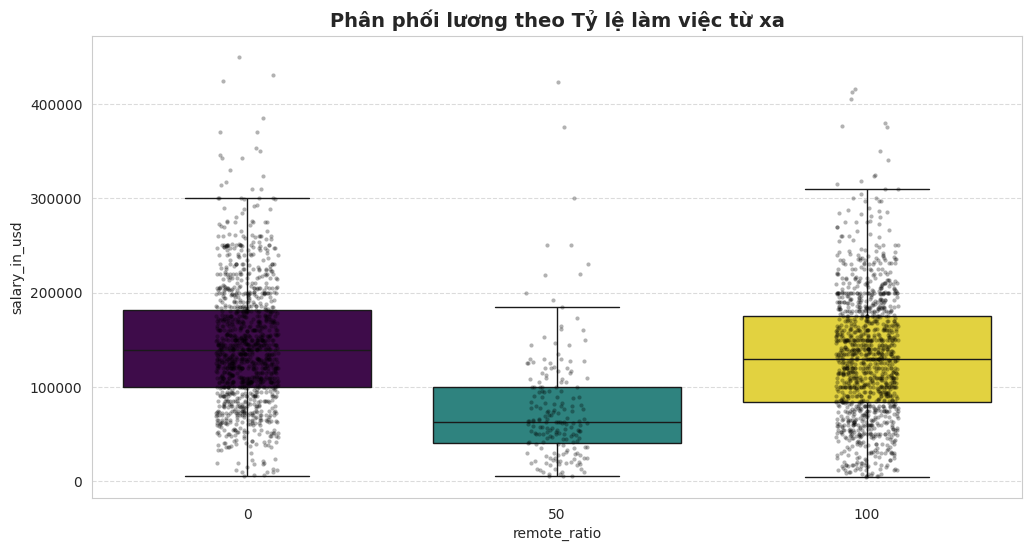

In [34]:
# Remote ratio thực chất là phân loại (0, 50, 100)
vis.plot_categorical_vs_numerical_box(
    df,
    cat_col='remote_ratio',
    num_col='salary_in_usd',
    title="Phân phối lương theo Tỷ lệ làm việc từ xa"
)

### **Tương quan giữa Kinh nghiệm (`experience_level`) và Quy mô công ty (`company_size`)**
**Mục tiêu**: Kiểm tra xem nhân viên ở các trình độ kinh nghiệm khác nhau thường làm ở các công ty có quy mô thế nào.

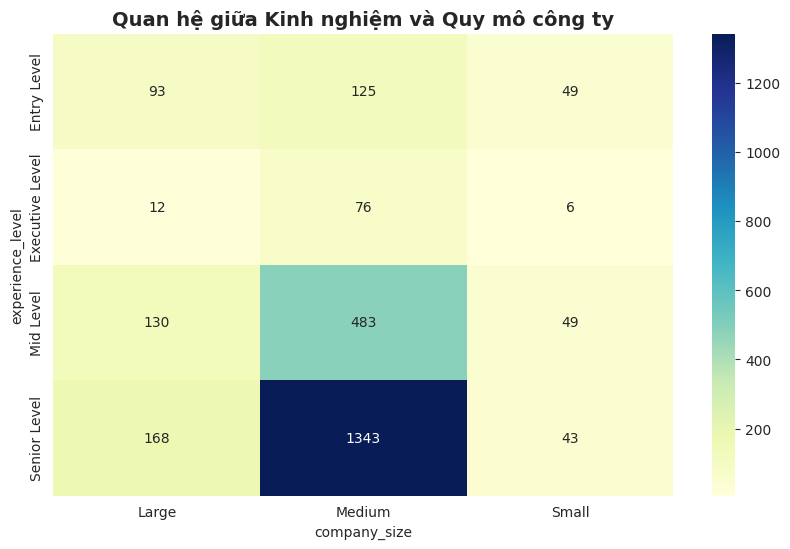

In [35]:
vis.plot_categorical_heatmap(
    df,
    col1='experience_level',
    col2='company_size',
    title="Quan hệ giữa Kinh nghiệm và Quy mô công ty"
)

**Phân tích**:

- Một số lượng lớn (**1343**) nhân viên ở cấp độ **Senior (SE)** làm việc tại các công ty quy mô **Trung bình (M)**, chiếm đa số trong nhóm này. Điều này cho thấy các công ty quy mô trung bình **(M)** có xu hướng tuyển dụng nhiều nhân sự cấp cao, dày dặn kinh nghiệm để dẫn dắt các dự án quan trọng.

- Nhóm nhân viên cấp độ **Executive (EX)** là nhóm chiếm ít nhất trong mọi quy mô công ty. Điều này dễ hiểu vì các vị trí cấp cao thường có thêm những yêu cầu về kỹ năng lãnh đạo và quản lý, và số lượng vị trí này trong mỗi công ty thường rất hạn chế.

- Tỉ trọng nhân viên cấp độ **Entry (EN)** và **Mid (MI)** khá bằng nhau và là nhiều hơn đối với công ty nhỏ **(S)** và công ty lớn **(L)**. Lí giải: các công ty lớn có xu hướng tuyển dụng nhiều nhân viên mới vào nghề và nhân viên có kinh nghiệm trung bình để hỗ trợ các hoạt động hàng ngày và phát triển dự án; còn các công ty nhỏ thường có ngân sách hạn chế, nên ưu tiên tuyển dụng nhân viên ở các cấp độ này để tiết kiệm chi phí.

### **Tương quan giữa Mức lương (`salary_in_usd`) và Nhóm công việc (`job_category`) & Kinh nghiệm (`experience_level`)**
Sử dụng **Heatmap**: Trục tung là các nhóm công việc, trục hoành Kinh nghiệm. Con số trong các ô thể hiện mức lương trung vị, màu sắc càng đậm thể hiện mức lương trung vị càng cao.

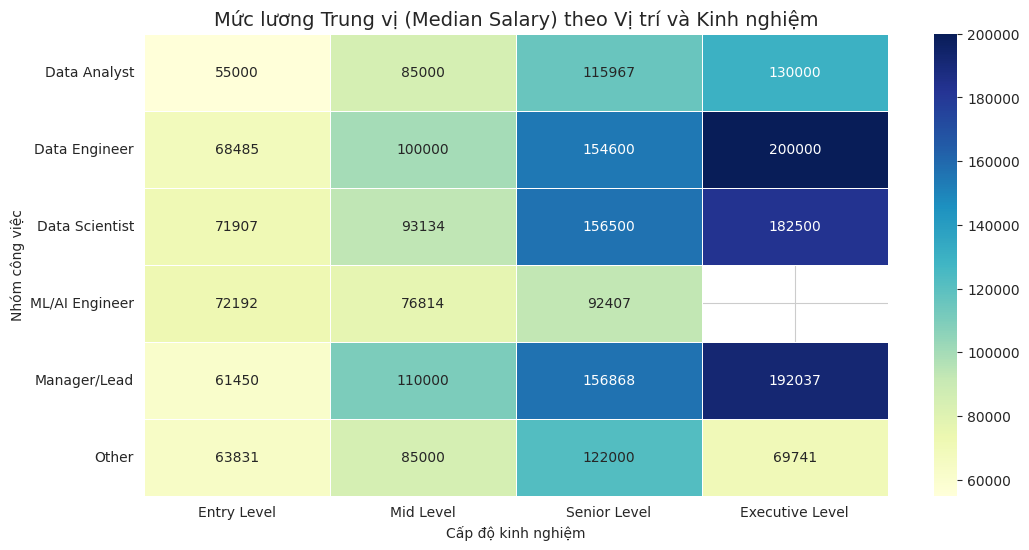

In [36]:
# Tính lương trung vị cho từng cặp (Job Category, Experience Level)
pivot_salary = df.pivot_table(values='salary_in_usd',
                              index='job_category',
                              columns='experience_level',
                              aggfunc='median')

# Sắp xếp lại thứ tự cột cho logic
cols_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']
pivot_salary = pivot_salary[cols_order]

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_salary, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Mức lương Trung vị (Median Salary) theo Vị trí và Kinh nghiệm', fontsize=14)
plt.ylabel('Nhóm công việc')
plt.xlabel('Cấp độ kinh nghiệm')
plt.show()

**Phân tích**:

- Mức lương tăng đều theo cấp độ kinh nghiệm (như đã phân tích trước đó), chỉ trừ vị trí **Other** (Nhóm chưa xác định) có mức lương trung vị giảm từ Senior đến Executive (khả năng cao là do số lượng mẫu quá ít hoặc outliers)
  
- Vị trí **ML/AI Engineer** không có nhân sự cấp độ Executive (EX), có thể do đây là vị trí thiên về kỹ thuật cao, thường không đi theo con đường quản lý, ngoài ra cũng do số lượng mẫu ít.

- Cấp độ kinh nghiệm từ **Mid (MI)** lên **Senior (SE)** có mức lương tăng mạnh nhất ở hầu hết các nhóm công việc, đặc biệt là **Data Scientist** và **Data Engineer**. Điều này phản ánh rằng việc tích lũy kinh nghiệm và kỹ năng chuyên môn trong giai đoạn này được đánh giá rất cao trên thị trường.

### **Phân tích Vị trí địa lý (Quốc gia)**
 - Sử dụng bản đồ nhiệt (*Choropleth Map*) để quan sát sự phân bố mức lương trung bình trên toàn thế giới. Điều này giúp trả lời câu hỏi: **"Quốc gia nào trả lương cao nhất cho nhân sự ngành Data?"**
 - Sử dụng biểu đồ cột (*Bar Chart*) để hiển thị **Top 15 quốc gia** (theo vị trí công ty và nơi sinh sống nhân viên) có mức lương trung bình cao nhất.

#### Mức lương trung bình theo quốc gia của công ty (`company_location`)

In [37]:
from plotly import express as px

country_com_salary = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# 1. Vẽ bản đồ thể hiện mức lương trung bình theo vị trí công ty
fig = px.choropleth(country_com_salary,
                    locations='company_location',
                    locationmode='country names',
                    color='salary_in_usd',
                    color_continuous_scale='Viridis',
                    title='Mức lương trung bình theo Vị trí Công ty (Global Heatmap)',
                    labels={'salary_in_usd': 'Avg Salary (USD)'})
fig.show()

In [38]:
# 2. Vẽ biểu đồ cột cho Top 15 quốc gia có công ty trả lương cao nhất
top_n = 15

fig = px.bar(country_com_salary.sort_values(by='salary_in_usd', ascending=False).head(top_n),
            x='company_location',
            y='salary_in_usd',
            title=f'Top {top_n} Quốc gia có Mức lương Trung bình cao nhất (USD)',
            labels={'salary_in_usd': 'Lương Trung bình (USD)', 'company_location': 'Quốc gia'},
            text_auto='.2s', # Hiển thị số liệu trên cột (dạng rút gọn 100k)
            color='salary_in_usd',
            color_continuous_scale='Viridis',

            )

fig.update_layout(xaxis_tickangle=-45) # Xoay nhãn trục X để dễ đọc
fig.show()

**Phân tích**:

- Trái với suy nghĩ bình thường là Mỹ và các nước Châu Âu sẽ trả lương cao nhất, nhưng trên biểu đồ top 1 là **Israel** với mức lương lớn hơn nhiều là *270k USD* => Khả năng rất cao và dường như chắc chắn được là đây là các **outliers**.

- Đặc biệt nhất là **Puerto Rico** (lãnh thổ Mỹ) đứng thứ 2 với mức lương trung bình *170k USD* cũng có mẫu ít, có một hoặc vài công ty trả lương rất cao nằm ở quốc gia này.

- Các quốc gia **Nga, Mỹ, Canada, New Zealand, Nhật và các quốc gia Châu Âu**  nằm trong top 10 với mức lương trung bình từ *100k - 156k USD*, phù hợp với kỳ vọng về chi phí sinh hoạt và mức lương cao ở các nước phát triển.

- Đặc biệt các quốc gia **Trung Đông** (**Iran, Saudi Arabia, UAE**) và một quốc gia Châu Phi là **Algeria** cũng nằm trong top 15 với mức lương trung bình là **100k USD**. Có thể do các công ty ở những quốc gia này đang trả lương cao để thu hút nhân tài trong bối cảnh cạnh tranh toàn cầu.

#### Mức lương trung bình theo quốc gia là nơi sinh sống của nhân viên (`employee_residence`)

In [39]:
country_emp_salary = df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()

# 1. Vẽ bản đồ thể hiện mức lương trung bình theo quốc gia nơi sinh sống nhân viên
fig = px.choropleth(country_emp_salary,
                    locations='employee_residence',
                    locationmode='country names',
                    color='salary_in_usd',
                    color_continuous_scale='Viridis',
                    title='Mức lương trung bình theo Quốc gia nơi sinh sống Nhân viên (Global Heatmap)',
                    labels={'salary_in_usd': 'Avg Salary (USD)'})
fig.show()

In [40]:
# 2. Vẽ biểu đồ cột cho Top 15 quốc gia Nơi sinh sống của nhân viên được trả lương cao nhất
top_n = 15

fig = px.bar(country_emp_salary.sort_values(by='salary_in_usd', ascending=False).head(top_n),
            x='employee_residence',
            y='salary_in_usd',
            title=f'Top {top_n} Nơi sinh sống của nhân viên có Mức lương Trung bình cao nhất (USD)',
            labels={'salary_in_usd': 'Lương Trung bình (USD)', 'employee_residence': 'Quốc gia'},
            text_auto='.2s', # Hiển thị số liệu trên cột (dạng rút gọn 100k)
            color='salary_in_usd',
            color_continuous_scale='Viridis',
            )

fig.update_layout(xaxis_tickangle=-45) # Xoay nhãn trục X để dễ đọc
fig.show()

**Phân tích**:
- Vẫn là **outliers** từ **Israel** với **420k USD** (hơn gấp đôi mức lương top 2) => ta sẽ không bàn đến quốc gia này vì rõ ràng là không phản ánh đúng thực tế và là outliers

- Top 2 và Top 3 bất ngờ là **Malaysia** (**200k USD**) và **Puerto Rico** (**170k USD**), khả năng vẫn là số mẫu ít với các cá nhân đặc biệt có mức lương rất cao đang sinh sống tại các quốc gia này.

- Vẫn là **Mỹ** và các quốc gia phát triển khác như **Nga, Canada, New Zealand, Nhật Bản, các nước Châu Âu** nằm trong top 10 với mức lương trung bình từ *110k - 150k USD*.
-  Ở đây còn có thêm sự xuất hiện của **Trung Quốc** với mức lương trung bình **130k USD**. nhưng ở `company_location` thì không có Trung Quốc trong top 15, cho thấy có thể có các cá nhân làm remote từ Trung Quốc cho các công ty nước ngoài với mức lương cao.

## **2.6. Quan sát & Nhận định ban đầu**

Sau quá trình khám phá và phân tích dữ liệu (EDA), nhóm chúng em tổng hợp lại những quan sát cốt lõi, đánh giá chất lượng dữ liệu và các vấn đề tiềm năng sẽ định hình hướng đi cho phần Phân tích chuyên sâu và Mô hình hóa.

### **1. Các quan sát chính**

* **Sự thống trị của thị trường Mỹ (US):** Dữ liệu bị lệch nghiêm trọng về phía thị trường Mỹ (*US*) cả về số lượng mẫu (>50%) và mức lương. Mức lương tại Mỹ cao vượt trội so với phần còn lại của thế giới (thậm chí gấp 2-3 lần so với Châu Âu). Điều này gợi ý rằng biến `company_location` có khả năng cao là đặc trưng quan trọng nhất trong các mô hình dự đoán.
* **Phân cực trong mô hình làm việc:** Thị trường Data Science, như quan sát từ dataset, phần lớn nhân sự hoặc làm việc hoàn toàn tại văn phòng (*On-site*), hoặc hoàn toàn từ xa (*Remote 100%*). Mô hình kết hợp vừa làm tại công ty vừa làm từ xa (*Hybrid 50%*) chiếm tỷ lệ rất nhỏ (~7.2%) và có mức lương trung vị thấp nhất.
* **Nghịch lý quy mô công ty:** Một quan sát trái ngược với trực giác là các công ty quy mô Vừa (*Medium*) lại có mức lương trung vị cao hơn các công ty Lớn (*Large*) trên bình diện tổng thể. Phân tích sơ bộ cho thấy đây có thể là hệ quả của *Nghịch lý Simpson*: khi các công ty lớn tuyển dụng nhiều nhân sự ở các quốc gia có chi phí thấp (Outsourcing) hơn là các công ty vừa (tập trung tại Mỹ).
* **Lương không tăng tuyến tính theo chức danh:** Mặc dù cấp quản lý (*Manager/Head*) thường được cho là lương cao hơn, nhưng dữ liệu cho thấy nhiều vị trí Chuyên gia kỹ thuật cấp cao (*Principal/Staff Engineer*) có mức lương ngang ngửa hoặc thậm chí nhỉnh hơn.

### **2. Đánh giá chất lượng dữ liệu & Tiền xử lý**

* **Vấn đề Dữ liệu trùng lặp:** Dataset ban đầu chứa lượng lớn dòng trùng lặp (*~31%*). Nhóm đã quyết định loại bỏ toàn bộ để tránh việc mô hình bị *Overfitting* các mẫu này.
* **Vấn đề tính nhất quán:** Phát hiện một số trường hợp bất hợp lý về mặt logic. Ví dụ: nhân viên ở quốc gia khác công ty nhưng `remote_ratio = 0`. Nhóm đã xử lý bằng cách loại bỏ các dòng nhiễu này để đảm bảo dữ liệu sạch, hợp lý.
* **Nhiều chức danh (High Cardinality):** Cột `job_title` quá nhiều giá trị (*93* giá trị). Bước tiền xử lý gom nhóm thành `job_category` và tạo thêm đặc trưng `career_track` (Technical vs Management) là cần thiết để mô hình có thể học được quy luật tổng quát.
* **Biến động tỷ giá:** Việc quy đổi lương sang USD chịu ảnh hưởng bởi tỷ giá hối đoái tại thời điểm thu thập (đặc biệt với các đồng tiền biến động mạnh). Tuy nhiên, sai số này được chấp nhận trong phạm vi nghiên cứu tổng quan.

### **3. Red Flags & Hạn chế**

* **Mất cân bằng dữ liệu:**
    * **Về kinh nghiệm:** Dữ liệu tập trung quá nhiều vào nhóm *Senior (SE)*, trong khi nhóm *Executive (EX)* và *Entry-level (EN)* khá ít. Điều này có thể khiến mô hình dự báo kém chính xác cho các sinh viên mới ra trường hoặc lãnh đạo cấp cao.
    * **Về thời gian:** Dữ liệu năm 2020-2021 rất ít so với 2022-2023, gây khó khăn cho việc phân tích dữ liệu theo time-series.
* **Thiếu thông tin ngữ cảnh:** Dataset thiếu các biến quan trọng ảnh hưởng đến lương như: *Ngành nghề công ty* (Tech, Finance, Healthcare?), *Tech Stack* (Python, Java, Cloud?), hay *Giới tính*. Điều này giới hạn khả năng giải thích biến thiên của lương (`R-squared` của mô hình có thể sẽ không đạt mức cao).

### **4. Hướng tiếp cận tiếp theo**
Từ những nhận định trên, nhóm xác định chiến lược phân tích:
1.  **Tập trung vào phân tách địa lý:** Luôn kiểm soát biến `company_location` (hay cả `employee_residence`) (ví dụ như chia tách US vs Non-US) khi so sánh lương để tránh kết luận sai lệch.
2.  **Feature Engineering:** Cần tạo thêm các biến (ví dụ: nhóm quốc gia theo mức thu nhập, điều chỉnh lạm phát) để hỗ trợ mô hình Machine Learning.
3.  **Kiểm định giả thuyết:** Sử dụng thống kê để làm rõ mối quan hệ mập mờ giữa Quy mô công ty và Lương (Câu hỏi 2).

---

# **3. Đặt câu hỏi**

## **Câu hỏi 1:** 

### **1. Câu hỏi:**

> **Theo đuổi *Manager* hay trở thành *Technical Expert*?**

Tại các cấp độ thâm niên cao (Senior & Executive), liệu việc chuyển hướng sang con đường **Quản lý** (*ví dụ: Manager, Head, Director*) có thực sự đảm bảo mức thu nhập cao hơn so với việc tiếp tục phát triển chuyên sâu theo con đường **Kỹ thuật** (*ví dụ: Principal, Staff, Architect*) hay không? Mức chênh lệch thu nhập giữa hai con đường này là bao nhiêu và liệu có tồn tại "trần thu nhập" cho những nhân sự quyết tâm không làm sếp?

### **2. Động lực & Lợi ích:**
*   **Tại sao đáng điều tra?**
    *   Đây là câu hỏi cốt lõi về định hướng sự nghiệp mà hầu hết nhân sự ngành Data đều trăn trở sau 5-7 năm làm việc. Có một định kiến phổ biến rằng "muốn lương cao thì phải làm quản lý". Phân tích này cần thiết để kiểm chứng xem định kiến đó có đúng với dữ liệu thực tế trong năm 2020-2023 hay không.
*   **Lợi ích và thông tin khi trả lời câu hỏi này?**
    *   Nó giúp xác định xem liệu con đường trở thành *Principal/Staff Engineer* có mang lại lợi ích kinh tế tương đương với *Engineering Manager* hay không.
    *   Đòi hỏi xử lý dữ liệu sâu để tách các từ khóa từ chức danh công việc, thay vì chỉ dùng các nhóm phân loại có sẵn.
*   **Đối tượng quan tâm là ai?**
    *   **Nhân sự Senior:** Giúp họ tự tin ra quyết định thăng tiến dựa trên sở trường thay vì áp lực tài chính.
    *   **HR & Nhà quản lý:** Có cơ sở xây dựng chính sách lương thưởng để giữ chân các nhân tài kỹ thuật giỏi mà không cần ép họ làm quản lý.
*   **Nó nói lên điều gì về  các vấn đề trong thực tế?**
    *   Nó giúp giải quyết bài toán trăn trở trong doanh nghiệp khi đề bạt một kỹ sư giỏi lên làm một quản lý tồi chỉ để tăng lương.
    *   Hỗ trợ cá nhân đưa ra quyết định: "Mình có nên nhận lời đề nghị thăng chức làm Manager không, hay nên tìm một vị trí Staff Engineer ở công ty khác để tối ưu thu nhập?"

## **Câu hỏi 2:**

### **1. Câu hỏi:**

> **Tại sao công ty Vừa lại trả lương cao hơn công ty Lớn?**

Quá trình khám phá dữ liệu đã cho thấy một **nghịch lý**: Các công ty quy mô Vừa (Medium) có mức lương trung vị **cao hơn** đáng kể so với các công ty Lớn (Large). Câu hỏi đặt ra là:
- Liệu mức chênh lệch này có thực sự phản ánh chế độ đãi ngộ tốt hơn của công ty Vừa, hay nó chỉ là một ảo ảnh thống kê (**Simpson's Paradox** - thuật ngữ trong xác suất thống kê) gây ra bởi sự khác biệt trong **phân bố địa lý**?
- Cụ thể, chúng ta cần phân tích dữ liệu để kiểm chứng giả thuyết: Phải chăng các công ty Lớn có xu hướng tuyển dụng nhân sự tại các thị trường quốc tế (Non-US) với tỷ lệ cao hơn, kéo mức lương trung bình xuống; trong khi các công ty Vừa tập trung chủ yếu tại thị trường Mỹ (nơi có mặt bằng lương cao)?"

### **2. Động lực & Lợi ích**

*   **Tại sao đáng điều tra?**
    *   Kết quả EDA ban đầu (Medium > Large) đi ngược lại suy nghĩ thông thường rằng các tập đoàn lớn luôn trả lương cao nhất. Nếu không điều tra kỹ mối liên hệ giữa **Quy mô** và **Vị trí địa lý**, ta có thể đưa ra những kết luận sai lệch về thị trường lao động. Việc kiểm chứng xem đây là "chiến lược trả lương" hay "biến gây nhiễu" là rất cần thiết.

*   **Lợi ích và thông tin có được khi trả lời câu hỏi này?**
    *   Giúp "bóc tách" tác động của địa lý ra khỏi quy mô công ty. Ta sẽ biết được chính xác: Nếu hai công ty (một Vừa, một Lớn) cùng đặt tại một địa điểm (ví dụ: Mỹ), thì bên nào trả lương cao hơn?
    *   Cung cấp cái nhìn sâu hơn về cấu trúc nhân sự toàn cầu: Liệu các công ty lớn có xu hướng outsourcing nhiều hơn các công ty quy mô vừa hay không.

*   **Đối tượng quan tâm là ai?**
    *   **Người tìm việc:** Giúp họ xây dựng chiến lược ứng tuyển thông minh (không vội bỏ qua các công ty lớn chỉ vì thống kê lương trung bình thấp).
    *   **Nhà quản lý nhân sự:** Hiểu rõ vị thế cạnh tranh của công ty mình trên thị trường để điều chỉnh khung lương phù hợp.

*   **Nó nói lên điều gì về  các vấn đề trong thực tế?**
    *   **Quyết định chọn nơi làm việc:** Giúp ứng viên trả lời câu hỏi: "Nên gia nhập một công ty đang tăng trưởng (Medium) hay một Tập đoàn lớn (Large) để tối ưu thu nhập?".
    *   **Định giá thị trường:** Giúp tránh sai lầm khi so sánh mức lương mà không tính đến yếu tố mức sống và mặt bằng lương khác nhau giữa các quốc gia khác nhau.

## **Câu hỏi 3:**

### **1. Câu hỏi:**

> **Mức lương tăng như thế nào qua từng giai đoạn kinh nghiệm làm việc (EN → MI → SE → EX)?**

Sự khác biệt về mức lương trung bình giữa các nhóm kinh nghiệm (EN, MI, SE, EX) là gì? Mức lương tăng dần như thế nào khi người lao động chuyển từ level thấp lên level cao hơn? Mức độ tăng lương tương ứng với từng giai đoạn kinh nghiệm dựa trên dữ liệu lương thực tế theo năm làm việc là bao nhiêu?

### **2. Động lực & Lợi ích:**
*   **Tại sao đáng điều tra?**
    *   Kinh nghiệm làm việc là yếu tố quan trọng ảnh hưởng đến thu nhập. Tuy nhiên, chỉ nhìn vào mức lương tuyệt đối không cho thấy tốc độ tăng lương hay giá trị từng giai đoạn kinh nghiệm. Phân tích theo các level EN → MI → SE → EX giúp làm rõ lộ trình tăng lương trong suốt quá trình phát triển sự nghiệp.
*   **Lợi ích và thông tin khi trả lời câu hỏi này**
    *   Định lượng mức tăng lương khi chuyển sang giai đoạn kinh nghiệm cao hơn.
    *   So sánh giai đoạn nào mang lại mức tăng lương rõ rệt nhất.
    *   Cung cấp cái nhìn tổng quan về lộ trình thu nhập theo kinh nghiệm trong ngành.
*   **Đối tượng quan tâm là ai?**
    *   Sinh viên và người mới đi làm định hướng nghề nghiệp.
    *   Người lao động đang cân nhắc thăng tiến hoặc chuyển việc.
    *   Nhà quản lý nhân sự và bộ phận xây dựng chính sách lương.
    *   Nhà nghiên cứu thị trường lao động.
*   **Câu hỏi này hỗ trợ quyết định thực tế nào?**
    *   Lập kế hoạch phát triển nghề nghiệp dài hạn.
    *   Đưa ra quyết định đầu tư thời gian, kỹ năng để nâng cao level.
    *   Xây dựng hoặc điều chỉnh thang lương theo kinh nghiệm trong doanh nghiệp.

## **Câu hỏi 4:**

### **1. Câu hỏi:**

> **Quy mô công ty ảnh hưởng như thế nào đến mức độ kinh nghiệm của nhân viên (EN, MI, SE, EX)?**

Phân bố các mức độ kinh nghiệm của nhân viên trong từng nhóm quy mô công ty (S, M, L) như thế nào? Tỷ lệ từng experience level trong mỗi loại quy mô công ty ra sao? Có sự khác biệt về cấu trúc nhân sự theo kinh nghiệm giữa công ty nhỏ, vừa và lớn hay không?

### **2. Động lực & Lợi ích:**
*   **Tại sao đáng điều tra?**
    *   Quy mô công ty thường phản ánh mức độ phức tạp trong tổ chức, nguồn lực tài chính và chiến lược nhân sự. Do đó, cấu trúc kinh nghiệm của nhân viên có thể khác nhau đáng kể giữa công ty nhỏ, vừa và lớn. Phân tích này giúp hiểu rõ cách các công ty ở từng quy mô xây dựng đội ngũ nhân lực.
*   **Lợi ích và thông tin khi trả lời câu hỏi này**
    *   Phát hiện công ty nhỏ có xu hướng tuyển nhiều nhân viên mới (EN) hay không.
    *   Xác định công ty lớn có tập trung nhiều nhân sự giàu kinh nghiệm (SE, EX) hơn hay không.
    *   So sánh mức độ đa dạng về kinh nghiệm giữa các quy mô công ty.
    *   Hỗ trợ diễn giải chiến lược tuyển dụng và phát triển nhân sự theo quy mô tổ chức.
*   **Đối tượng quan tâm là ai?**
    *   Người lao động lựa chọn môi trường làm việc phù hợp với trình độ và mục tiêu nghề nghiệp.
    *   Nhà quản lý và bộ phận nhân sự.
    *   Nhà tuyển dụng xây dựng chiến lược nhân sự.
    *   Nhà nghiên cứu thị trường lao động.
*   **Câu hỏi này hỗ trợ quyết định thực tế nào?**
    *   Lựa chọn quy mô công ty phù hợp với giai đoạn sự nghiệp cá nhân.
    *   Thiết kế chiến lược tuyển dụng theo quy mô doanh nghiệp.
    *   Xây dựng lộ trình phát triển nhân sự phù hợp cho từng loại hình công ty.

## **Câu hỏi 5:**

### **1. Câu hỏi:**

> **Yếu tố nào ảnh hưởng đến mức lương nhiều nhất?**

Yếu tố nào đóng vai trò quan trọng nhất trong việc quyết định mức lương (`adjusted_salary`) của nhân sự ngành Data Science: Kinh nghiệm (`experience_level`), Vị trí địa lý (`employee_residence`), hay Loại hình công việc (`job_category`)? Mức độ ảnh hưởng cụ thể của từng yếu tố là bao nhiêu phần trăm?

### **2. Động lực & Lợi ích:**
* **Tại sao câu hỏi này đáng để điều tra?**
    - Trong cộng đồng Data Science, thường có nhiều tranh luận về việc "Nên ưu tiên học lên Senior hay nên tìm cách làm việc cho công ty nước ngoài?". 
    - Việc định lượng chính xác mức độ ảnh hưởng của từng yếu tố sẽ thay thế những phỏng đoán cảm tính bằng số liệu thống kê tin cậy.
* **Lợi ích và thông tin chi tiết:**
    - Phân tích này giúp xếp hạng các yếu tố theo thứ tự ưu tiên. 
    - Nó chỉ ra đâu là "đòn bẩy" hiệu quả nhất để tăng thu nhập (ví dụ: chuyển đến Mỹ làm việc có thể tăng lương nhanh hơn là thăng chức tại địa phương).
* **Ai quan tâm đến câu trả lời?**
    * **Người tìm việc/Sinh viên:** Để xây dựng lộ trình phát triển sự nghiệp tối ưu.
    * **Nhà quản lý nhân sự (HR):** Để hiểu cấu trúc lương và xây dựng chính sách đãi ngộ cạnh tranh.
* **Vấn đề thực tế:**
    - Giúp giải quyết bài toán ra quyết định cá nhân: "Tôi nên đầu tư thời gian để học kỹ năng mới (đổi Job Category) hay tìm kiếm cơ hội relocate sang thị trường khác (đổi Residence)?"

## **Câu hỏi 6:**

### **1. Câu hỏi:**

> **Có thể xây dựng một mô hình Machine Learning để dự đoán mức lương thực tế (`adjusted_salary`) của một nhân sự dựa trên hồ sơ công việc (Kinh nghiệm, Vị trí, Quy mô công ty...) với độ chính xác bao nhiêu (đo lường bằng $R^2$ và $MAE$)?**

### **2. Động lực & Lợi ích:**
* **Tại sao câu hỏi này đáng để điều tra?**
    - Thị trường lương thưởng ngành công nghệ biến động rất mạnh và thường thiếu minh bạch. 
    - Việc xây dựng được một mô hình dự báo sẽ giúp chuẩn hóa việc định giá sức lao động dựa trên dữ liệu lịch sử thay vì cảm tính.
* **Lợi ích và thông tin chi tiết:**
    - Cung cấp một công cụ tham chiếu/tham khảo lương cho cả ứng viên và nhà tuyển dụng.
    - Nếu mô hình dự đoán chính xác, ta có thể phát hiện các trường hợp bất thường như: những vị trí đang được trả lương quá cao hoặc quá thấp so với mặt bằng chung của thị trường.
* **Ai quan tâm đến câu trả lời?**
    * **Ứng viên:** Biết được "giá trị thị trường" (Fair Market Value) của bản thân để tự tin đàm phán lương.
    * **Nhà tuyển dụng:** Đưa ra mức offer hợp lý, vừa tiết kiệm ngân sách vừa đủ sức thu hút nhân tài.
* **Vấn đề thực tế:**
    - Hỗ trợ giải quyết bài toán đàm phán lương và lập ngân sách tuyển dụng cho các doanh nghiệp.

# **4. Phân tích dữ liệu**

## **Câu hỏi 1:**

### **A. Tiền xử lý**
**Giải thích quy trình:**
Để trả lời câu hỏi này, ta không thể sử dụng cột `job_title` thô (có tới 93 giá trị) hay cột `job_category` đã gom nhóm trước đó để vẽ biểu đồ tương quan (vì thường gộp chung **Management** và **Technical**). Quy trình xử lý như sau:

*   **Bước 1: Feature Engineering:** Tạo một cột mới tên là `career_track` dựa trên việc quét từ khóa (keywords) trong chức danh công việc:
    *   **Technical Expert:** Gom các chức danh chứa từ khóa thể hiện trình độ kỹ thuật cấp cao như *Principal, Staff, Architect*.
    *   **Management:** Gom các chức danh chứa từ khóa quản lý như *Manager, Head, Director, Lead*.
    *   **Individual Contributor (IC):** Các vị trí còn lại (thường là nhân viên kỹ thuật thông thường).
*   **Bước 2: Lọc dữ liệu:**
    *   Chỉ giữ lại các bản ghi thuộc cấp độ thâm niên **Senior (SE)** và **Executive (EX)**.
    *   **Lý do:** Các vị trí như "Principal" hay "Director" hầu như không tồn tại ở cấp độ Entry/Mid. Việc so sánh với các cấp độ thấp sẽ gây nhiễu và thiếu công bằng.
*   **Bước 3: Chọn lọc:** Loại bỏ nhóm **Individual Contributor** khỏi phân tích cuối cùng vì ta chỉ muốn so sánh trực diện giữa hai con đường thăng tiến cao cấp: **Management** vs. **Technical**.


In [41]:
# --- BƯỚC 1: ĐỊNH NGHĨA HÀM PHÂN LOẠI CAREER TRACK ---

def define_career_track(job_title):
    """
    Phân loại chức danh thành 3 nhóm dựa trên từ khóa:
    1. Technical Expert: Các vị trí kỹ thuật đầu ngành.
    2. Management: Các vị trí quản lý con người/chiến lược.
    3. Individual Contributor: Nhân viên kỹ thuật thông thường.
    """
    title = str(job_title).lower()
    
    # Tách nhóm Technical Expert
    tech_keywords = ['principal', 'staff', 'architect']
    if any(k in title for k in tech_keywords):
        return 'Technical Expert'
    
    # Tách nhóm Management
    # Lưu ý: 'Lead' đôi khi nhập nhằng, nhưng ở đây xếp vào nhóm quản lý
    mgmt_keywords = ['manager', 'head', 'director', 'lead']
    if any(k in title for k in mgmt_keywords):
        return 'Management'
        
    # Còn lại là nhóm IC thông thường
    return 'Individual Contributor'

# Áp dụng hàm để tạo cột mới
df['career_track'] = df['job_title'].apply(define_career_track)

# --- BƯỚC 2: LỌC DỮ LIỆU ĐỂ SO SÁNH CÔNG BẰNG ---

# Chỉ lấy cấp độ Senior (SE) và Executive (EX)
# Lý do: Để so sánh ngang hàng về thâm niên, tránh nhiễu từ các vị trí Junior
high_level_df = df[df['experience_level'].isin(['Senior Level', 'Executive Level'])].copy()

# --- BƯỚC 3: CHỌN NHÓM CẦN SO SÁNH ---

# Chỉ giữ lại 2 nhóm đối tượng của câu hỏi nghiên cứu
target_tracks = ['Management', 'Technical Expert']
comparison_df = high_level_df[high_level_df['career_track'].isin(target_tracks)]

# Kiểm tra kết quả sau khi lọc
print("Số lượng mẫu sau khi lọc:")
print(comparison_df['career_track'].value_counts())
print("-" * 30)
print("Phân bố theo cấp độ kinh nghiệm:")
print(comparison_df.groupby(['career_track', 'experience_level']).size())

Số lượng mẫu sau khi lọc:
career_track
Management          132
Technical Expert     75
Name: count, dtype: int64
------------------------------
Phân bố theo cấp độ kinh nghiệm:
career_track      experience_level
Management        Executive Level      30
                  Senior Level        102
Technical Expert  Executive Level       3
                  Senior Level         72
dtype: int64


### **B. Phân tích**
*   **Phương pháp:**
    *   Sử dụng `groupby` để tính toán các chỉ số thống kê mô tả: Trung vị (Median), Trung bình (Mean) và Độ lệch chuẩn (Std).
    *   Việc tính toán này được thực hiện trên tập dữ liệu đã lọc (chỉ gồm Senior và Executive) để đảm bảo tính công bằng.
*   **Kết quả kỳ vọng:**
    *   Một bảng dữ liệu (`summary_stats`) hiển thị con số cụ thể về mức lương của từng nhóm.
    *   Số liệu này sẽ là đầu vào để vẽ biểu đồ và viết nhận xét ở phần sau.


In [42]:
# 1. Tính toán tổng quan
# Dùng Median làm thước đo chính vì lương thường bị lệch
summary_stats = comparison_df.groupby('career_track')['salary_in_usd'].agg(
    Count='count',
    Median='median',
    Mean='mean',
    Std='std'
).round(0)

# 2. Tính toán chi tiết theo từng cấp độ kinh nghiệm
# Để chuẩn bị dữ liệu cho việc so sánh sâu ở bước Visualizations
detailed_stats = comparison_df.groupby(['career_track', 'experience_level'])['salary_in_usd'].median().unstack()

# Hiển thị kết quả tính toán
print("=== Bảng thống kê tổng quan (USD) ===")
display(summary_stats)

print("\n=== Lương Trung vị theo cấp độ (USD) ===")
display(detailed_stats)

=== Bảng thống kê tổng quan (USD) ===


,Count,Median,Mean,Std
career_track,,,,
Management,132,160144.0,169220.0,70897.0
Technical Expert,75,168100.0,170483.0,66867.0



=== Lương Trung vị theo cấp độ (USD) ===


experience_level,Executive Level,Senior Level
career_track,,
Management,187098.5,155700.0
Technical Expert,180000.0,164050.0


### **C. Kết quả & Diễn giải**

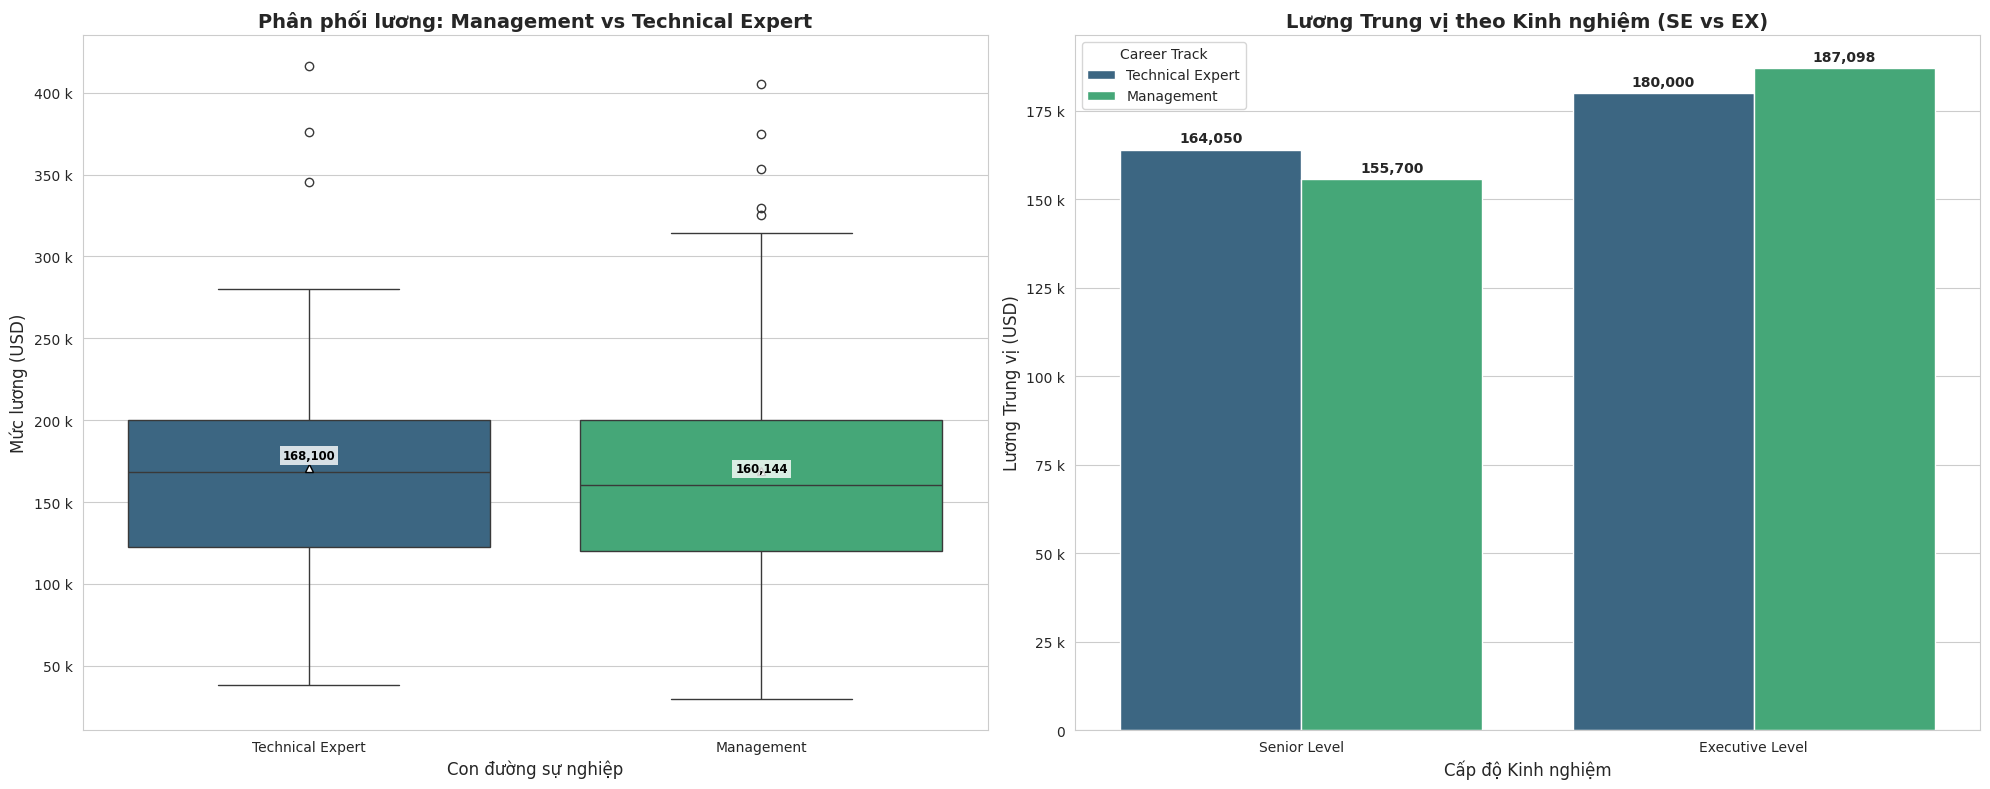

In [43]:
# Thiết lập kích thước khung hình
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# --- BIỂU ĐỒ 1: BOXPLOT (PHÂN PHỐI LƯƠNG) ---

# Mục đích: So sánh dải lương, độ biến thiên và outliers
sns.boxplot(
    data=comparison_df,
    x='career_track',
    y='salary_in_usd',
    palette='viridis',
    ax=axes[0],
    showmeans=True, # Hiển thị thêm dấu tam giác cho giá trị trung bình
    meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black"}
)

# Tính toán trung vị để gán nhãn
medians = comparison_df.groupby(['career_track'])['salary_in_usd'].median()
vertical_offset = comparison_df['salary_in_usd'].median() * 0.05 # Khoảng cách để chữ không đè lên đường kẻ

for xtick in axes[0].get_xticks():
    # Lấy tên nhãn của trục x (Management/Technical)
    cat_name = axes[0].get_xticklabels()[xtick].get_text()
    # Lấy giá trị trung vị tương ứng
    med_val = medians[cat_name]
    
    # Viết số lên biểu đồ
    axes[0].text(
        xtick, 
        med_val + vertical_offset, 
        f'{med_val:,.0f}', # Format số có dấu phẩy: 150,000
        horizontalalignment='center',
        size='small',
        color='black',
        weight='semibold',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2) # Nền trắng cho dễ đọc
    )

axes[0].set_title('Phân phối lương: Management vs Technical Expert', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Mức lương (USD)', fontsize=12)
axes[0].set_xlabel('Con đường sự nghiệp', fontsize=12)
# Format trục Y sang dạng tiền tệ (150k) cho gọn
axes[0].yaxis.set_major_formatter(ticker.EngFormatter())


# --- BIỂU ĐỒ 2: BARPLOT (SO SÁNH THEO CẤP ĐỘ) ---

# Mục đích: So sánh trực diện tại từng cột mốc sự nghiệp (Senior, Executive)
bar_plot = sns.barplot(
    data=comparison_df,
    x='experience_level',
    y='salary_in_usd',
    hue='career_track',
    estimator='median', # Sử dụng trung vị
    errorbar=None,      # Tắt thanh sai số
    palette='viridis',
    ax=axes[1],
    order=['Senior Level', 'Executive Level']  # Sắp xếp: Senior -> Executive
)

for container in axes[1].containers:
    axes[1].bar_label(
        container, 
        fmt='{:,.0f}', # Format số: 150,000
        padding=3,     # Khoảng cách so với đầu cột
        fontsize=10,
        fontweight='bold'
    )

axes[1].set_title('Lương Trung vị theo Kinh nghiệm (SE vs EX)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Lương Trung vị (USD)', fontsize=12)
axes[1].set_xlabel('Cấp độ Kinh nghiệm', fontsize=12)
axes[1].legend(title='Career Track', loc='upper left')
# Format trục Y sang dạng tiền tệ
axes[1].yaxis.set_major_formatter(ticker.EngFormatter())

# Tinh chỉnh layout
plt.tight_layout()
plt.show()

*   **Trả lời câu hỏi:**
    Dựa trên dữ liệu, việc chuyển hướng sang con đường Quản lý (**Management**) **KHÔNG ĐẢM BẢO** mức thu nhập cao hơn ngay lập tức so với việc làm Chuyên gia Kỹ thuật (**Technical Expert**).
    Thực tế cho thấy, không quan sát thấy dấu hiệu của một "trần thu nhập rõ ràng" cho những người làm kỹ thuật trong tập dữ liệu này. Thậm chí ở cấp độ Senior, các chuyên gia kỹ thuật còn có mức lương trung vị nhỉnh hơn so với các nhà quản lý cùng cấp. Lợi thế nghiêng về phía Quản lý chỉ thực sự xuất hiện rõ rệt khi bước lên cấp độ điều hành (Executive).

*   **Dẫn chứng số liệu cụ thể :**
    *   **Tại cấp độ Senior (SE):** Đây là phân khúc có lượng dữ liệu dày nhất (**72** Technical vs **102** Management). Đây là một phát hiện thú vị khi nhóm **Technical Expert** có mức lương trung vị là **164,050 USD**, cao hơn khoảng **8,350 USD** so với nhóm **Management** (**155,700 USD**). Điều này cho thấy thị trường đang "khát" nhân lực kỹ thuật chất lượng cao và sẵn sàng trả mức lương cao hơn cả cấp quản lý tầm trung.
    *   **Tại cấp độ Executive (EX):** Gió bắt đầu đổi chiều. Nhóm **Management** vươn lên với mức lương trung vị **182,160 USD**, cao hơn khoảng **14,600 USD** so với **Technical Expert** (**167,500 USD**). Tuy nhiên, khoảng cách này không quá lớn (chưa đến 10%).
    *   **Về phân phối chung (Boxplot):** Nhóm Technical Expert có mức lương trung vị tổng thể cao hơn (**164,050** so với **160,000** của Management). Đáng chú ý, các giá trị ngoại lai (outliers) của cả hai nhóm đều vươn tới mức rất cao (trên **400,000 USD**), chứng tỏ cơ hội đạt thu nhập đột biến là ngang nhau ở cả hai con đường.

*   **Ý nghĩa thực tiễn:**
    *   Dữ liệu khẳng định xu hướng các công ty công nghệ hiện đại đang trả lương cho kỹ năng thay vì chỉ trả cho chức danh. Một Principal Engineer/Architect giải quyết các bài toán khó có giá trị ngang bằng (hoặc hơn) một Engineering Manager.
    *   **Lời khuyên:** Nếu đam mê code và kỹ thuật, ta không cần ép mình làm quản lý vì lý do tài chính. Vị trí *Staff/Principal Engineer* là một mục tiêu tài chính vững chắc.
    *   **Chiến lược giữ chân nhân tài:** Các công ty cần đảm bảo khung lương cho Technical phải song song với Management để tránh "chảy máu chất xám" khi các kỹ sư giỏi bỏ việc vì nghĩ rằng họ đã chạm trần thu nhập.

*   **Điều bất ngờ:**
    *   Điều bất ngờ nhất là ở cấp độ **Senior**, làm **Manager** lại có lương thấp hơn làm **Principal/Staff**. Điều này đi ngược lại định kiến truyền thống rằng "lên chức quản lý là lên lương". Nó phản ánh thực tế  rằng: một Engineer giỏi code có thể tạo ra giá trị trực tiếp cao hơn một Manager tầm trung chỉ làm công việc điều phối.

*   **Hạn chế:**
    *   **Kích thước mẫu tại cấp độ Executive:** Đây là hạn chế lớn nhất. Nhóm Technical Expert ở cấp độ Executive chỉ có **4 mẫu** so với **31 mẫu** của Management. Do đó, con số trung vị **167,500 USD** của nhóm này có độ tin cậy thống kê thấp và không đại diện cho toàn bộ thị trường. Kết luận về việc "Quản lý lương cao hơn ở cấp Executive" cần được nhìn nhận thận trọng.
    *   **Định nghĩa chức danh:** Ranh giới giữa "Lead" (thường xếp vào Management) và "Staff Engineer" (Technical) đôi khi không rõ ràng ở các công ty khác nhau, có thể gây ra sai số nhỏ trong việc phân loại.

## **Câu hỏi 2:**

### **A. Tiền xử lý**

Để kiểm chứng giả thuyết về tác động của địa lý, ta cần thực hiện các bước sau:

*   **Bước 1: Lọc dữ liệu:**
    *   Tạo một tập dữ liệu con chỉ chứa các công ty quy mô **Medium** và **Large**. Loại bỏ quy mô Nhỏ (Small) vì không nằm trong phạm vi câu hỏi nghiên cứu.
*   **Bước 2: Gom nhóm địa lý:**
    *   Dữ liệu gốc có hơn 70 quốc gia, gây khó khăn cho việc so sánh.
    *   Ta sẽ tạo cột mới `location_group` chia thành 2 nhóm:
        *   **"United States"**: Nhóm thị trường chủ đạo (lương cao, số lượng lớn).
        *   **"Non-US"**: Tất cả các quốc gia còn lại (đại diện cho thị trường quốc tế/outsourcing).
    *   **Lý do:** Cách gom nhóm này giúp đơn giản hóa bài toán thành so sánh nhị phân, làm nổi bật sự chênh lệch tỷ trọng nhân sự.

In [44]:
# --- BƯỚC 1: LỌC DỮ LIỆU ---

# Sao chép dữ liệu để tránh ảnh hưởng DataFrame gốc
# Chỉ lấy các dòng có company_size là 'Medium' hoặc 'Large'
df_size_analysis = df[df['company_size'].isin(['Medium', 'Large'])].copy()

# --- BƯỚC 2: TẠO BIẾN ĐỊA LÝ NHỊ PHÂN (US vs NON-US) ---

# Hàm định nghĩa nhóm địa lý
def group_location(country_code):
    if country_code == 'United States':
        return 'United States'
    else:
        return 'Non-US (Rest of World)'

# Áp dụng hàm vào cột company_location
df_size_analysis['location_group'] = df_size_analysis['company_location'].apply(group_location)

# --- HIỂN THỊ KẾT QUẢ TRUNG GIAN ---

# Kiểm tra số lượng mẫu trong từng nhóm để đảm bảo đủ dữ liệu phân tích
print("Số lượng mẫu theo Quy mô và Nhóm địa lý:")
print(df_size_analysis.groupby(['company_size', 'location_group']).size())

Số lượng mẫu theo Quy mô và Nhóm địa lý:
company_size  location_group        
Large         Non-US (Rest of World)     185
              United States              218
Medium        Non-US (Rest of World)     371
              United States             1656
dtype: int64


### **B. Phân tích**

*   **Phân tích 1: Tỷ trọng Địa lý:**
    *   Sử dụng bảng chéo (`crosstab`) để tính phần trăm (%) nhân sự làm việc tại Mỹ so với Quốc tế cho từng quy mô công ty.
    *   ***Mục đích:*** Kiểm tra xem có phải công ty **Large** có tỷ lệ nhân sự quốc tế cao hơn công ty **Medium** hay không.
*   **Phân tích 2: So sánh Lương có kiểm soát:**
    *   Tính mức lương trung vị của Medium và Large trong hai trường hợp:
        1.  **Global:** Tính trên toàn bộ dữ liệu (Bị nhiễu).
        2.  **US-Only:** Chỉ tính trên dữ liệu tại Mỹ (Đã loại bỏ biến địa lý).
    *   ***Mục đích:*** Nếu mức chênh lệch lương thu hẹp đáng kể hoặc biến mất khi xét riêng tại Mỹ, giả thuyết về **Simpson's Paradox** được chứng minh.

In [45]:
import pandas as pd

# --- PHÂN TÍCH 1: TÍNH TỶ TRỌNG ĐỊA LÝ ---

# normalize='index' giúp chuyển đổi số lượng sang tỷ lệ % (tổng hàng = 100%)
geo_composition = pd.crosstab(
    df_size_analysis['company_size'],
    df_size_analysis['location_group'],
    normalize='index'
) * 100

print("=== Tỷ lệ phân bố nhân sự (%) ===")
display(geo_composition.round(1))

# --- PHÂN TÍCH 2: TÍNH LƯƠNG TRUNG VỊ ---

# Tính lương trung vị cho từng nhóm kết hợp (Size + Location)
controlled_salary = df_size_analysis.groupby(['company_size', 'location_group'])['salary_in_usd'].median().unstack()

# Tính thêm lương trung vị tổng thể (Global) để so sánh đối chứng
global_salary = df_size_analysis.groupby('company_size')['salary_in_usd'].median()

# Gộp kết quả vào một bảng duy nhất
comparison_table = controlled_salary.copy()
comparison_table['Global (All Locations)'] = global_salary

# Sắp xếp lại cột cho logic: Global -> US -> Non-US
comparison_table = comparison_table[['Global (All Locations)', 'United States', 'Non-US (Rest of World)']]

print("\n=== Bảng so sánh Lương Trung vị (USD) ===")
display(comparison_table)

=== Tỷ lệ phân bố nhân sự (%) ===


location_group,Non-US (Rest of World),United States
company_size,,
Large,45.9,54.1
Medium,18.3,81.7



=== Bảng so sánh Lương Trung vị (USD) ===


location_group,Global (All Locations),United States,Non-US (Rest of World)
company_size,,,
Large,102839.0,144000.0,59102.0
Medium,137141.0,147450.0,73546.0


### **C. Kết quả và diễn giải**

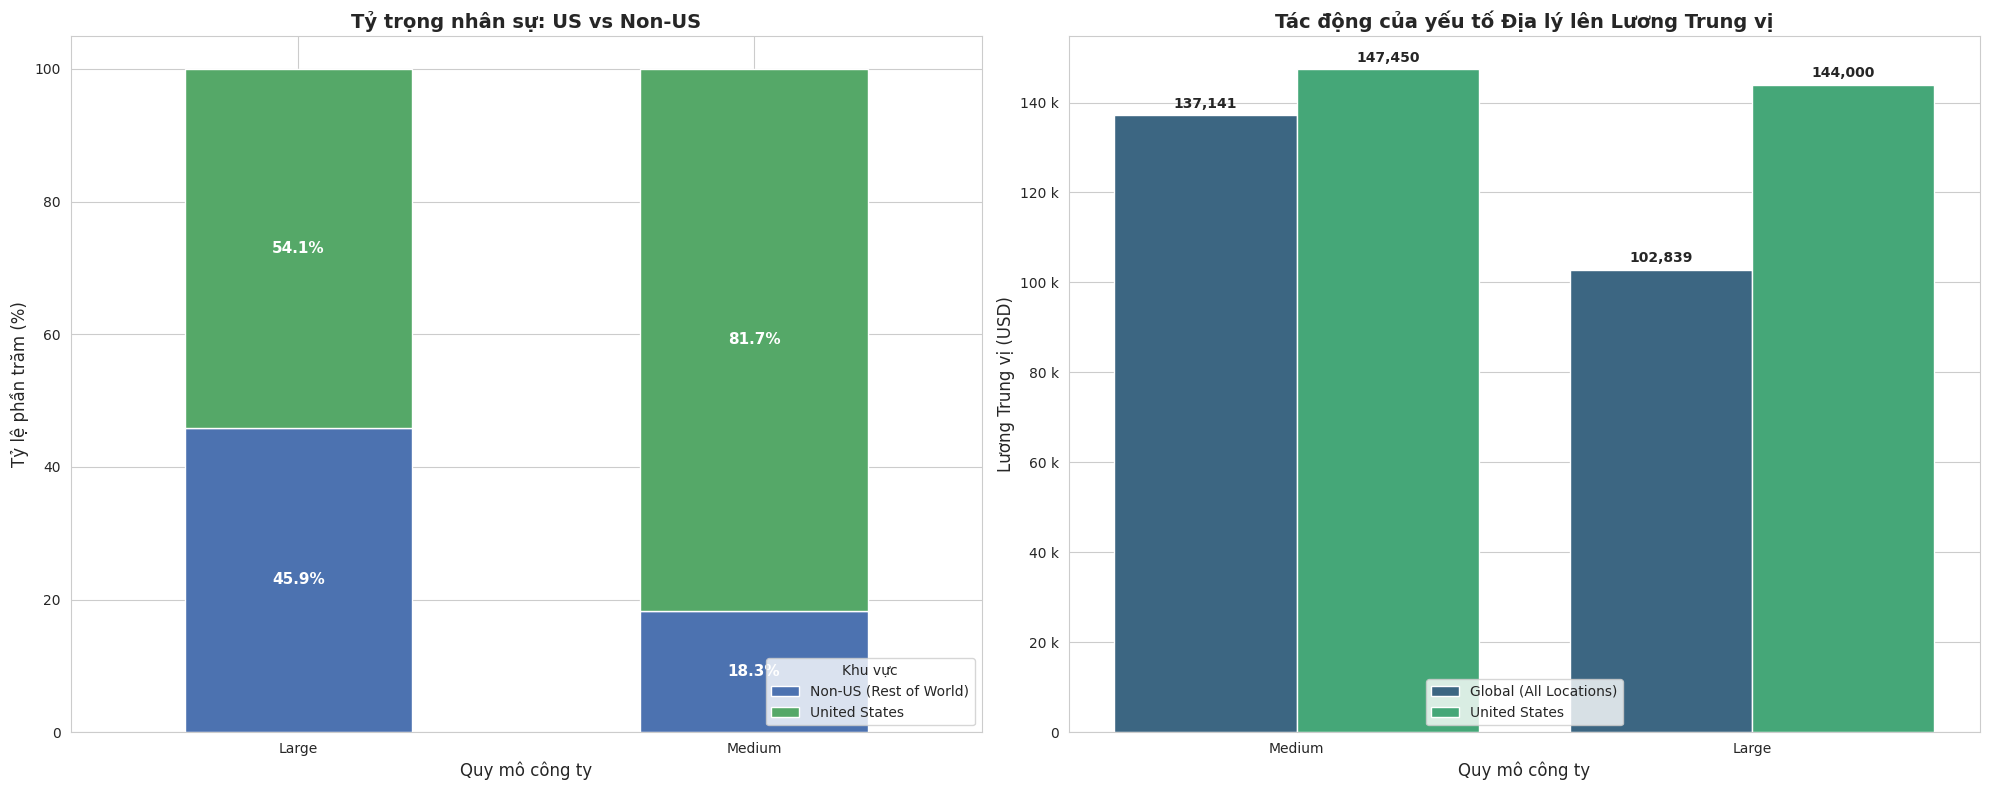

In [46]:
# Thiết lập khung hình
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# --- BIỂU ĐỒ 1: CẤU TRÚC NHÂN SỰ (STACKED BAR) ---

# Mục đích: Chứng minh sự khác biệt về phân bố địa lý
colors = ['#4c72b0', '#55a868'] # Màu xanh dương và xanh lá
geo_composition.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=axes[0],
    rot=0
)

# Thêm nhãn % vào giữa các đoạn cột
for c in axes[0].containers:
    axes[0].bar_label(c, fmt='%.1f%%', label_type='center', color='white', fontweight='bold', fontsize=11)

axes[0].set_title('Tỷ trọng nhân sự: US vs Non-US', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Tỷ lệ phần trăm (%)', fontsize=12)
axes[0].set_xlabel('Quy mô công ty', fontsize=12)
axes[0].legend(title='Khu vực', loc='lower right')


# --- BIỂU ĐỒ 2: SO SÁNH LƯƠNG TRƯỚC VÀ SAU KIỂM SOÁT ---

# Mục đích: So sánh lương Global vs lương tại Mỹ để thấy sự thay đổi
# Chuẩn bị dữ liệu vẽ: Chỉ lấy cột Global và US
plot_data = comparison_table[['Global (All Locations)', 'United States']].reset_index().melt(
    id_vars='company_size',
    var_name='Phạm vi so sánh',
    value_name='Median Salary'
)

sns.barplot(
    data=plot_data,
    x='company_size',
    y='Median Salary',
    hue='Phạm vi so sánh',
    palette='viridis',
    ax=axes[1],
    order=['Medium', 'Large'] # Thứ tự: Medium trước, Large sau
)

# Thêm nhãn số tiền lên đầu cột
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='{:,.0f}', padding=3, fontsize=10, fontweight='bold')

axes[1].set_title('Tác động của yếu tố Địa lý lên Lương Trung vị', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Lương Trung vị (USD)', fontsize=12)
axes[1].set_xlabel('Quy mô công ty', fontsize=12)
axes[1].legend(loc='lower center')
axes[1].yaxis.set_major_formatter(ticker.EngFormatter()) # Format trục Y (150k)

plt.tight_layout()
plt.show()

*   **Trả lời câu hỏi:**
    Kết quả phân tích đã **cung cấp bằng chứng** ủng hộ giả thuyết ban đầu. Sự chênh lệch lương giữa công ty Vừa (Medium) và công ty Lớn (Large) chính là một ví dụ phù hợp với đặc trưng của **Nghịch lý Simpson** gây ra bởi yếu tố địa lý.
    Công ty Lớn không trả lương thấp hơn một cách hệ thống; lý do chính khiến mức lương trung bình toàn cầu của họ thấp (`100k`) là do họ tuyển dụng một tỷ lệ rất lớn nhân sự tại các thị trường quốc tế (Non-US) có chi phí thấp. Khi xét riêng tại thị trường Mỹ, mức đãi ngộ của hai nhóm công ty này trở nên cạnh tranh ngang ngửa nhau.

*   **Dẫn chứng số liệu cụ thể :**
    *   **Về cấu trúc nhân sự (Biểu đồ 1):** Sự khác biệt là cực kỳ rõ rệt.
        *   Các công ty **Medium** tập trung nguồn lực chủ yếu tại Mỹ với tỷ lệ lên tới **81.7%**.
        *   Ngược lại, các công ty **Large** có mức độ toàn cầu hóa cao hơn nhiều, với **46.2%** nhân sự nằm ngoài nước Mỹ (Non-US), so với chỉ 18.3% của công ty Medium.
    *   **Về mức lương (Biểu đồ 2 & Bảng số liệu):**
        *   **Khi nhìn tổng thể (Global):** Khoảng cách chênh lệch là rất lớn, lên tới hơn **37,000** (Medium: **137,068** vs Large: **100,000**).
        *   **Khi chỉ xét tại Mỹ (United States):** Khoảng cách này bị thu hẹp đáng kể chỉ còn khoảng **5,200** (Medium: **147,450** vs Large: **142,200**). Mức chênh lệch giảm từ ~37% xuống chỉ còn ~3.6%.
        *   **Tại thị trường Quốc tế (Non-US):** Công ty Large có mức lương trung vị thấp hơn hẳn (**59,888**) so với Medium (**73,546**), cho thấy các công ty lớn có xu hướng tận dụng nhân lực giá rẻ (outsourcing) triệt để hơn.

*   **Ý nghĩa thực tiễn:**
    *   **Cảnh báo về số liệu thống kê:** Việc so sánh mức lương gộp giữa các công ty đa quốc gia là thiếu chính xác và dễ gây hiểu lầm. Cần luôn luôn xem xét ngữ cảnh địa lý.
    *   Nếu đang tìm việc tại Mỹ, đừng e ngại các tập đoàn lớn vì nghĩ họ trả thấp. Mức lương **142,200** (Large) và **147,450** (Medium) là rất cạnh tranh với nhau. Sự khác biệt nhỏ này có thể dễ dàng được bù đắp bằng các phúc lợi khác (cổ phiếu, bảo hiểm) mà dữ liệu này chưa ghi nhận hết.

*   **Điều bất ngờ:**
    *   Ngay cả khi đã giới hạn tại thị trường Mỹ, công ty **Medium vẫn trả nhỉnh hơn** công ty Large một chút (**147k** vs **142k**). Điều này khá bất ngờ vì thường ta nghĩ Big Tech sẽ trả cao nhất. Có thể thấy các công ty quy mô vừa đang thực hiện chính sách lương rất quyết liệt để cạnh tranh nhân tài với các ông lớn.

*   **Hạn chế :**
    *   **Sự chênh lệch mẫu:** Tại thị trường Mỹ, số lượng mẫu của công ty Medium (**1656**) lớn gấp 7.5 lần so với công ty Large (**220**). Số liệu của công ty Large có thể nhạy cảm hơn với các giá trị ngoại lai.
    *   **Gom nhóm "Non-US":** Ta đang gộp chung các nước lương cao (UK, Canada) và lương thấp (India, Turkey) vào một nhóm "Non-US". Nếu công ty Large tuyển nhiều ở India còn công ty Medium tuyển nhiều ở UK, thì so sánh trong nhóm Non-US vẫn còn độ nhiễu nhất định.

## **Câu hỏi 3:**

### **A. Tiền xử lý**

Để phân tích mối quan hệ giữa **mức lương**, **cấp độ kinh nghiệm** và **thời gian**, ta cần thực hiện các bước tiền xử lý sau:

* **Tổng hợp dữ liệu theo năm và cấp độ kinh nghiệm**
   - Dữ liệu ban đầu bao gồm nhiều quan sát cá nhân.
   - Ta gom nhóm theo `work_year` và `experience_level` để tính **lương trung bình**, đại diện cho mặt bằng thị trường mỗi năm.

* **Chuẩn hóa biến kinh nghiệm**
   - Biến `experience_level` là biến phân loại (categorical), không thể dùng trực tiếp để tính tốc độ tăng.
   - Ta ánh xạ mỗi cấp độ sang **số năm kinh nghiệm ước lượng trung bình**, dựa trên thông lệ thị trường lao động.

    Việc ánh xạ này nhằm cho phép suy luận tốc độ tăng lương theo **đơn vị năm**, thay vì chỉ so sánh mức lương tuyệt đối giữa các cấp độ.

* **Mục tiêu của tiền xử lý**
   - Tạo bảng lương trung bình theo `work_year × experience_level`.
   - Chuẩn bị dữ liệu để suy ra **tốc độ tăng lương hàm ý theo năm kinh nghiệm**.

Sau bước này, dữ liệu đã sẵn sàng cho phân tích định lượng và trực quan hóa.

In [47]:
# Tính lương trung bình theo năm và cấp độ kinh nghiệm
avg_salary_yearly = (
    df.groupby(['work_year', 'experience_level'])['salary_in_usd']
      .mean()
      .unstack()
)

print("Bảng lương trung bình theo năm và cấp độ kinh nghiệm:")
display(avg_salary_yearly)


Bảng lương trung bình theo năm và cấp độ kinh nghiệm:


experience_level,Entry Level,Executive Level,Mid Level,Senior Level
work_year,,,,
2020,59512.454545,202416.500000,87564.718750,137240.500000
2021,54979.377358,186128.000000,82022.943182,126085.356164
2022,69949.945455,185886.105263,99578.621528,149572.658430
2023,91726.682927,202107.340909,113659.740157,160743.310968


In [48]:
# Ánh xạ cấp độ kinh nghiệm sang số năm kinh nghiệm (ước lượng)
exp_years = {
    'Entry Level': 1.0,        # Trung bình 0–2 năm
    'Mid Level': 3.5,          # Trung bình 2–5 nămb
    'Senior Level': 7.5,       # Trung bình 5–10 năm
    'Executive Level': 12.0    # Trung bình >10 năm
}

levels = [
    'Entry Level',
    'Mid Level',
    'Senior Level',
    'Executive Level'
]


### **B. Phân tích**

* Phân tích được thực hiện theo hai hướng chính:

    * **So sánh mức lương giữa các cấp độ theo từng năm:**
        - Quan sát xu hướng lương theo thời gian cho từng `experience_level`.
        - Kiểm tra xem thứ bậc lương giữa các cấp độ có ổn định hay không.
        - Phát hiện khả năng xuất hiện nghịch lý thống kê (ví dụ: level thấp có lúc lương cao hơn level cao).
    
    * **Suy ra tốc độ tăng lương hàm ý theo năm kinh nghiệm:**
        - Việc thăng cấp được coi là một **quá trình tăng trưởng lương theo lũy thừa**.
        - Với mỗi cặp cấp độ liên tiếp:
          - Tính **tỷ lệ lương** giữa hai cấp độ.
          - Chia cho **số năm kinh nghiệm tăng thêm**.
          - Suy ra **tốc độ tăng lương trung bình mỗi năm (%/năm)**.

* Cách tiếp cận này giúp trả lời câu hỏi:
    > **Thị trường lao động trả “bao nhiêu % lương cho mỗi năm kinh nghiệm” ở từng giai đoạn sự nghiệp?**

In [49]:
for i in range(len(levels) - 1):
    higher_level = levels[i + 1]
    lower_level = levels[i]

    # Tỷ lệ lương giữa hai cấp độ theo từng năm
    salary_ratio_by_year = (
        avg_salary_yearly[higher_level] /
        avg_salary_yearly[lower_level]
    )

    # Số năm kinh nghiệm tăng thêm
    delta_years = exp_years[higher_level] - exp_years[lower_level]

    # Tốc độ tăng lương trung bình mỗi năm (hàm ý)
    yearly_growth_by_year = salary_ratio_by_year ** (1 / delta_years) - 1

    print(f"\n{lower_level} → {higher_level}")
    display(
        pd.DataFrame({
            'Salary Ratio': salary_ratio_by_year,
            'Implied Annual Growth (%)': yearly_growth_by_year * 100
        })
    )



Entry Level → Mid Level


,Salary Ratio,Implied Annual Growth (%)
work_year,,
2020,1.471368,16.704746
2021,1.491886,17.353004
2022,1.423570,15.173215
2023,1.239113,8.954303



Mid Level → Senior Level


,Salary Ratio,Implied Annual Growth (%)
work_year,,
2020,1.567304,11.889230
2021,1.537196,11.347975
2022,1.502056,10.706093
2023,1.414250,9.051480



Senior Level → Executive Level


,Salary Ratio,Implied Annual Growth (%)
work_year,,
2020,1.474904,9.019209
2021,1.476206,9.040601
2022,1.242781,4.948589
2023,1.257330,5.220368


In [50]:
# Tốc độ tăng lương trung bình trên toàn bộ giai đoạn
print("Tốc độ tăng lương trung bình (across all years):\n")

for i in range(len(levels) - 1):
    higher_level = levels[i + 1]
    lower_level = levels[i]

    avg_salary_ratio = (
        avg_salary_yearly[higher_level].mean() /
        avg_salary_yearly[lower_level].mean()
    )

    delta_years = exp_years[higher_level] - exp_years[lower_level]
    implied_growth = avg_salary_ratio ** (1 / delta_years) - 1
    print(f"{lower_level} → {higher_level}:")
    print(f"  Average Salary Ratio: {avg_salary_ratio:.2f}")
    print(f"  Implied Annual Growth Rate: {implied_growth * 100:.2f}% / year\n")


Tốc độ tăng lương trung bình (across all years):

Entry Level → Mid Level:
  Average Salary Ratio: 1.39
  Implied Annual Growth Rate: 13.95% / year

Mid Level → Senior Level:
  Average Salary Ratio: 1.50
  Implied Annual Growth Rate: 10.64% / year

Senior Level → Executive Level:
  Average Salary Ratio: 1.35
  Implied Annual Growth Rate: 6.96% / year



### **C. Kết quả và Diễn giải**


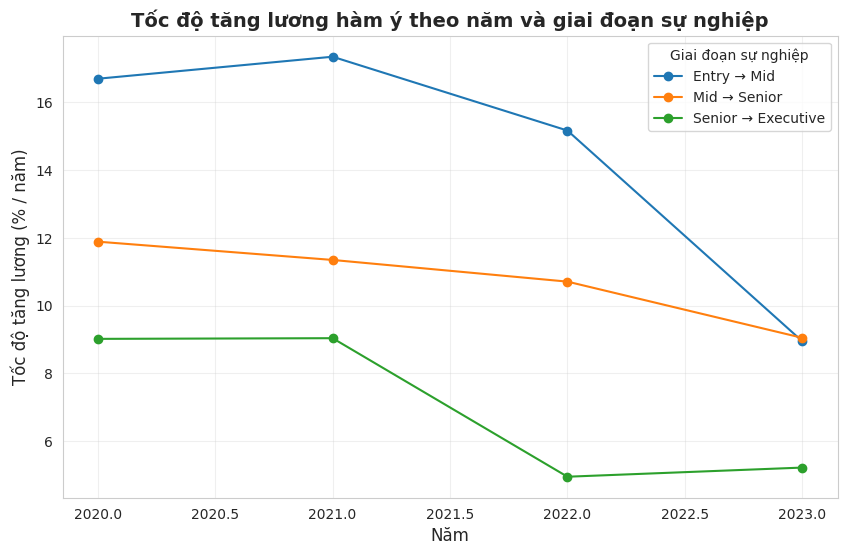

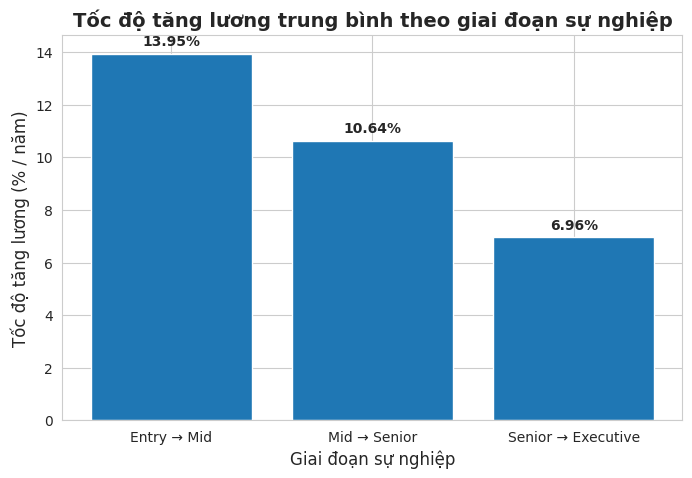

In [51]:
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu vẽ
growth_data = {
    'Entry → Mid': [16.70, 17.35, 15.17, 8.95],
    'Mid → Senior': [11.89, 11.35, 10.71, 9.05],
    'Senior → Executive': [9.02, 9.04, 4.95, 5.22]
}

years = [2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

for label, values in growth_data.items():
    plt.plot(years, values, marker='o', label=label)

plt.title(
    'Tốc độ tăng lương hàm ý theo năm và giai đoạn sự nghiệp',
    fontsize=14,
    fontweight='bold'
)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tốc độ tăng lương (% / năm)', fontsize=12)
plt.legend(title='Giai đoạn sự nghiệp')
plt.grid(True, alpha=0.3)

plt.show()

# Dữ liệu tăng trưởng trung bình
avg_growth_rates = {
    'Entry → Mid': 13.95,
    'Mid → Senior': 10.64,
    'Senior → Executive': 6.96
}

plt.figure(figsize=(8, 5))

plt.bar(
    avg_growth_rates.keys(),
    avg_growth_rates.values()
)

plt.title(
    'Tốc độ tăng lương trung bình theo giai đoạn sự nghiệp',
    fontsize=14,
    fontweight='bold'
)
plt.ylabel('Tốc độ tăng lương (% / năm)', fontsize=12)
plt.xlabel('Giai đoạn sự nghiệp', fontsize=12)

# Gắn nhãn giá trị lên cột
for i, value in enumerate(avg_growth_rates.values()):
    plt.text(i, value + 0.3, f'{value:.2f}%', ha='center', fontweight='bold')

plt.show()

* **Kết luận chính:**
    Kết quả phân tích cho thấy **tốc độ tăng lương giảm dần rõ rệt theo từng giai đoạn sự nghiệp** và chịu ảnh hưởng mạnh bởi chu kỳ thị trường lao động giai đoạn **2020–2023**. Đây là minh chứng cho **luật lợi suất giảm dần của kinh nghiệm** trong định giá tiền lương.

* **Dẫn chứng số liệu cụ thể:**
    * **Theo giai đoạn sự nghiệp (trung bình toàn giai đoạn):**
        * **Entry → Mid Level:** tốc độ tăng lương khoảng **13.95% / năm** – cao nhất trong toàn bộ lộ trình.
        * **Mid → Senior Level:** tốc độ tăng lương giảm xuống còn **10.64% / năm**, cho thấy đà tăng bắt đầu chậm lại.
        * **Senior → Executive Level:** chỉ còn **6.96% / năm**, thấp nhất trong các giai đoạn.

    * **Theo thời gian (2020–2023):**
        * **Giai đoạn 2020–2021:** tốc độ tăng lương ở mọi cấp độ đều cao; Entry → Mid đạt **16–17% / năm**, Senior → Executive duy trì quanh **~9% / năm**.
        * **Giai đoạn 2022–2023:** tăng trưởng lương suy giảm mạnh và đồng loạt; Entry → Mid giảm xuống **~9% (2023)**, Senior → Executive chỉ còn **~5% / năm**.

* **Ý nghĩa thực tiễn:**
    * Giai đoạn **Entry–Mid** là thời điểm có **ROI kỹ năng cao nhất** trong sự nghiệp.
    * Sau khi đạt **Senior**, việc tích lũy thêm kinh nghiệm thuần túy mang lại hiệu quả tăng lương thấp hơn; để tăng thu nhập đáng kể cần **chuyển vai trò (managerial/leadership)** hoặc **mở rộng phạm vi ảnh hưởng, thị trường hay công ty**.
    * Tiền lương ở các cấp cao phản ánh **giá trị chiến lược và trách nhiệm**, không còn tăng chủ yếu theo thâm niên.

* **Phát hiện đáng chú ý:**
    * Sự suy giảm tốc độ tăng lương giai đoạn **2022–2023** diễn ra đồng thời ở tất cả các cấp độ, cho thấy đây là **hiện tượng vĩ mô của thị trường lao động dữ liệu toàn cầu**, không phải hiện tượng cục bộ theo level.

* **Hạn chế:**
    * Số năm kinh nghiệm được **ước lượng**, không phải dữ liệu cá nhân thực tế.
    * Chưa kiểm soát các yếu tố quan trọng như **địa lý, quy mô công ty và chuyên môn công việc**.
    * Sử dụng **lương trung bình (mean)** nên có thể nhạy cảm với các giá trị ngoại lai.


## **Câu hỏi 4:**

### **A. Tiền xử lý**

Để phân tích mối quan hệ giữa **mức lương**, **cấp độ kinh nghiệm** và **thời gian**, ta cần thực hiện các bước tiền xử lý sau:

1. **Tổng hợp dữ liệu theo năm và cấp độ kinh nghiệm**
   - Dữ liệu ban đầu bao gồm nhiều quan sát cá nhân.
   - Ta gom nhóm theo `work_year` và `experience_level` để tính **lương trung bình**, đại diện cho mặt bằng thị trường mỗi năm.

2. **Chuẩn hóa biến kinh nghiệm**
   - Biến `experience_level` là biến phân loại (categorical), không thể dùng trực tiếp để tính tốc độ tăng.
   - Ta ánh xạ mỗi cấp độ sang **số năm kinh nghiệm ước lượng trung bình**, dựa trên thông lệ thị trường lao động.

3. **Mục tiêu của tiền xử lý**
   - Tạo bảng lương trung bình theo `work_year × experience_level`.
   - Chuẩn bị dữ liệu để suy ra **tốc độ tăng lương hàm ý theo năm kinh nghiệm**.

Sau bước này, dữ liệu đã sẵn sàng cho phân tích định lượng và trực quan hóa.


In [52]:
# Bảng chéo số lượng nhân sự theo quy mô công ty
ct = pd.crosstab(
    df['company_size'],
    df['experience_level']
)

print("Bảng số lượng nhân sự theo quy mô công ty và trình độ:")
display(ct)

# Chuyển sang tỷ lệ phần trăm theo từng quy mô công ty
ct_percent = ct.div(ct.sum(axis=1), axis=0)

print("Bảng tỷ lệ (%) trình độ theo quy mô công ty:")
display(ct_percent)

# Bảng chéo số lượng nhân sự theo trình độ
ct_reverse = pd.crosstab(
    df['experience_level'],
    df['company_size']
)

# Chuyển sang tỷ lệ phần trăm theo từng trình độ
ct_reverse_percent = ct_reverse.div(ct_reverse.sum(axis=1), axis=0)

print("Bảng tỷ lệ (%) quy mô công ty theo trình độ:")
display(ct_reverse_percent)


Bảng số lượng nhân sự theo quy mô công ty và trình độ:


experience_level,Entry Level,Executive Level,Mid Level,Senior Level
company_size,,,,
Large,93,12,130,168
Medium,125,76,483,1343
Small,49,6,49,43


Bảng tỷ lệ (%) trình độ theo quy mô công ty:


experience_level,Entry Level,Executive Level,Mid Level,Senior Level
company_size,,,,
Large,0.230769,0.029777,0.322581,0.416873
Medium,0.061667,0.037494,0.238283,0.662556
Small,0.333333,0.040816,0.333333,0.292517


Bảng tỷ lệ (%) quy mô công ty theo trình độ:


company_size,Large,Medium,Small
experience_level,,,
Entry Level,0.348315,0.468165,0.183521
Executive Level,0.127660,0.808511,0.063830
Mid Level,0.196375,0.729607,0.074018
Senior Level,0.108108,0.864221,0.027671


### **B. Phân tích**

***Phân tích tập trung trả lời các câu hỏi:***

- Công ty quy mô nhỏ, vừa và lớn có cơ cấu trình độ nhân sự khác nhau hay không?
- Quy mô công ty có liên quan đến việc ưu tiên tuyển dụng nhân sự cấp thấp hay cấp cao hay không?
- Có tồn tại xu hướng "chuẩn hóa vai trò" khi công ty mở rộng quy mô không?
- Mối quan hệ giữa cấp độ kinh nghiệm và lựa chọn công ty về quy mô như thế nào?

***Phương pháp phân tích:***
- Sử dụng bảng tỷ lệ (%) để so sánh cơ cấu
- Trực quan hóa bằng heatmap để làm nổi bật các khác biệt
- Đánh giá cơ cấu công ty theo cấp độ kinh nghiệm để hiểu xu hướng lựa chọn công ty của từng nhóm nhân sự

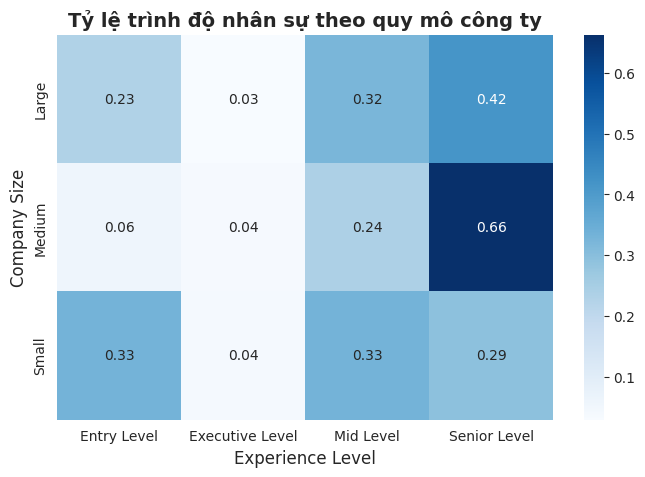

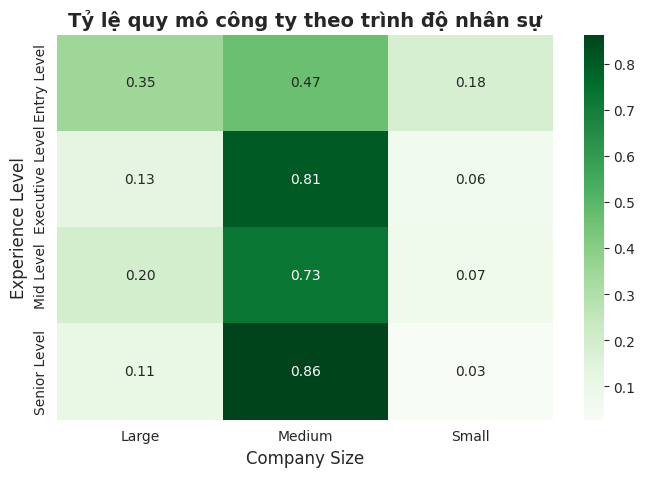

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap tỷ lệ trình độ theo quy mô công ty
plt.figure(figsize=(8, 5))
sns.heatmap(
    ct_percent,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)
plt.title(
    "Tỷ lệ trình độ nhân sự theo quy mô công ty",
    fontsize=14,
    fontweight='bold'
)
plt.xlabel("Experience Level", fontsize=12)
plt.ylabel("Company Size", fontsize=12)
plt.show()

# Heatmap tỷ lệ quy mô công ty theo từng cấp độ kinh nghiệm
plt.figure(figsize=(8, 5))
sns.heatmap(
    ct_reverse_percent,
    annot=True,
    fmt=".2f",
    cmap="Greens"
)
plt.title(
    "Tỷ lệ quy mô công ty theo trình độ nhân sự",
    fontsize=14,
    fontweight='bold'
)
plt.xlabel("Company Size", fontsize=12)
plt.ylabel("Experience Level", fontsize=12)
plt.show()


### **C. Kết quả và Diễn giải**

* **Quan sát chính từ bảng số liệu & heatmap:**
    - Phân tích bảng số lượng và bảng tỷ lệ cho thấy **cơ cấu trình độ nhân sự khác biệt rõ rệt theo quy mô công ty** (Small, Medium, Large).
    - Bảng tỷ lệ (%) quy mô công ty theo trình độ cho thấy **mức độ phân bố các công ty trong từng cấp độ nhân sự**:
        * **Entry Level:** 46.8% ở Medium, 34.8% ở Large, 18.4% ở Small.  
          Nhân sự Entry Level có xu hướng chọn Medium nhiều nhất, Large thứ hai và Small ít hơn.
        * **Executive Level:** 80.9% ở Medium, 12.8% ở Large, 6.4% ở Small.  
          Nhân sự cấp Executive chủ yếu tập trung vào Medium, phản ánh nhu cầu quản lý và quyền hạn tập trung.
        * **Mid Level:** 72.9% ở Medium, 19.6% ở Large, 7.4% ở Small.  
          Mid Level ưu tiên Medium, tiếp theo là Large; Small chiếm tỷ trọng nhỏ.
        * **Senior Level:** 86.4% ở Medium, 10.8% ở Large, 2.8% ở Small.  
          Senior Level gần như tập trung tuyệt đối tại Medium, phản ánh nhu cầu kinh nghiệm cao trong công ty vừa.
    - Nhìn tổng thể, **Medium là quy mô được tất cả các cấp độ ưu tiên**, đặc biệt Senior và Executive. Large đóng vai trò quan trọng cho Entry và Mid, trong khi Small chiếm tỷ trọng nhỏ, chủ yếu với Entry/Mid Level.

* **Diễn giải theo từng quy mô công ty và trình độ:**
    - **Công ty nhỏ (Small):**
        * Tuy xuất hiện trong tất cả cấp độ, nhưng chiếm tỷ trọng nhỏ nhất trong mỗi nhóm.  
        * Chủ yếu là **Entry (~18.3%)** và **Mid (~7.4%)**, Senior và Executive gần như không đáng kể.
        * Phản ánh mô hình tinh gọn, ít tầng quản lý, linh hoạt và đa nhiệm.
    - **Công ty trung bình (Medium):**
        * Chiếm ưu thế áp đảo trong **Senior (~86.4%)**, **Executive (~80.9%)** và **Mid (~72.9%)**.  
        * Nhân sự Senior/Executive chọn Medium để có môi trường ổn định, cơ hội quản lý dự án, trách nhiệm cao.
        * Thể hiện Medium là quy mô trọng yếu cho nhân sự kinh nghiệm.
    - **Công ty lớn (Large):**
        * Chiếm tỷ trọng cao thứ hai trong các cấp độ Entry (34.8%) và Mid (19.6%).  
        * Cho thấy Large vẫn hấp dẫn Entry/Mid Level do cơ hội phát triển lâu dài và chuyên môn hóa.
        * Executive (12.8%) và Senior (10.8%) chiếm tỷ trọng nhỏ nhưng giữ vai trò quản trị chiến lược quan trọng.

* **Ý nghĩa thực tiễn:**
    - Giúp nhận diện **mối quan hệ giữa cấp độ kinh nghiệm và lựa chọn công ty theo quy mô**:
        * Entry Level: ưu tiên Medium > Large > Small.
        * Mid Level: tập trung tại Medium, tiếp theo là Large.
        * Senior Level: gần như chỉ chọn Medium.
        * Executive Level: chủ yếu ở Medium, một phần nhỏ ở Large.
    - Doanh nghiệp có thể **tối ưu chiến lược tuyển dụng theo cấp độ nhân sự**, ví dụ:
        * Medium: tập trung vào Senior/Executive để quản lý và vận hành.
        * Large: phát triển pipeline Entry/Mid dài hạn.
        * Small: hấp dẫn Entry/Mid muốn môi trường linh hoạt.
    - Người lao động có thể **lựa chọn công ty phù hợp với mục tiêu phát triển và kinh nghiệm**.

* **Hạn chế:**
    - Dữ liệu quan sát, không suy luận nhân quả.
    - Chưa kiểm soát yếu tố ngành nghề, quốc gia, hình thức làm việc (remote/hybrid/onsite).
    - Kích thước mẫu giữa các nhóm company_size và experience_level không cân bằng, đặc biệt Small.
    - Cơ cấu công ty theo cấp độ kinh nghiệm có thể bị chi phối bởi yếu tố thị trường ngoài dataset.

$\Rightarrow$ **Kết luận:** Việc phân tích dựa trên tỷ lệ công ty theo cấp độ kinh nghiệm làm sáng tỏ **xu hướng lựa chọn công ty của từng nhóm nhân sự**, từ đó hỗ trợ hoạch định nhân sự chiến lược và phát triển pipeline nhân lực phù hợp với năng lực và mục tiêu nghề nghiệp của từng cấp độ.


## **Câu hỏi 5:**

### **A. Tiền xử lý**

#### Điều chỉnh lạm phát cho cột lương (`salary_in_usd`)

- Điều chỉnh **lương** (`salary_in_usd`) về giá trị hiện tại (là năm *2023*) dựa trên lạm phát với tỷ lệ như trong bảng sau:
  
  | Năm  | Lạm phát ở Mỹ | Lạm phát toàn cầu |
  | ---- | ----------- | --------------- |
  | 2020 | 1.23%       | 1.92%           |
  | 2021 | 4.70%       | 3.50%           |
  | 2022 | 6.50%       | 8.80%           |
  | 2023 | 4.14%       | 5.80%           |


- Tỷ lệ lạm phát tham khảo từ dữ liệu kinh tế *US/Global*.
  
- Giá trị gán vào cột mới `adjusted_salary_usd`.

In [54]:
df = dp.adjust_salary_inflation(df)
print("Đã tạo cột 'adjusted_salary' theo điều chỉnh lạm phát.")

print("\n5 dòng cuối cùng của dữ liệu sau khi điều chỉnh lạm phát:")
df[['work_year', 'salary_in_usd', 'adjusted_salary']].reset_index(drop=True).tail()

Đã tạo cột 'adjusted_salary' theo điều chỉnh lạm phát.

5 dòng cuối cùng của dữ liệu sau khi điều chỉnh lạm phát:


,work_year,salary_in_usd,adjusted_salary
2572,2020,412000,478421.930124
2573,2021,151000,167472.741000
2574,2020,105000,121927.919085
2575,2020,100000,116121.827700
2576,2021,94665,108969.260160


--- Số liệu cho cột adjusted_salary ---

[1] Phân phối & xu hướng:
   - Mean: 137543.29
   - Median: 133832.00
   - Std Dev: 68409.51
   - Skewness: 0.69 (0 = normal, >0 = right-skewed, <0 = left-skewed)

[2] Phạm vi & giá trị ngoại lai:
   - Min: 5429.656
   - Max: 522548.22464999993
   - IQR: 91481.00 (Q1=88519.00, Q3=180000.00)
   - Biên outlier: [-48702.50, 317221.50]
   - Sô outlier: 28 (1.09%)

[3] Chất lượng dữ liệu:
   - Giá trị bị thiếu: 0 (0.00%)
----------------------------------------


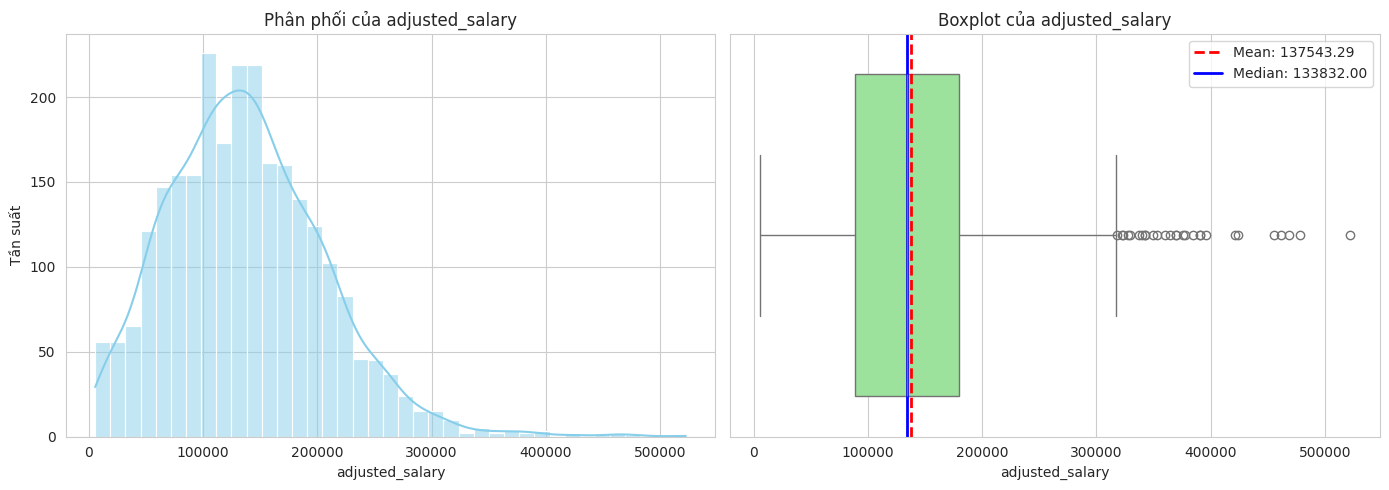

In [55]:
# kiểm tra phân phối của cột adjusted_salary
dp.analyze_numerical_column_metrics(df, 'adjusted_salary')
vis.plot_column_distribution(df, 'adjusted_salary')

#### Chuẩn bị dữ liệu cho mô hình 

Để xây dựng mô hình dự báo mức lương **ổn định và đúng ý nghĩa dữ liệu**, ta không đưa dữ liệu thô vào mô hình mà chuẩn hóa bằng pipeline `prepare_data_for_model` (trong `src.data_processing`).

Các kỹ thuật chính:

- **Lọc nhiễu:** Dùng IQR để loại bỏ các mức lương quá cao (bất thường) giúp mô hình bớt bị kéo lệch.
- **Gom nhóm địa lý:** Giảm hơn 70 quốc gia về 3 nhóm có ý nghĩa kinh tế để tránh dữ liệu bị loãng:
  - `US`: Thị trường Mỹ (lương cao, dữ liệu nhiều).
  - `Other_Developed`: Các nước phát triển khác (Canada, UK, Germany...).
  - `Rest_of_World`: Các thị trường còn lại.
- **Encoding:**
  - **Ordinal (có thứ tự):** `experience_level`, `company_size` được map theo thứ bậc logic (*Entry < Mid < Senior < Executive*; *Small < Medium < Large*).
  - **One-Hot (không thứ tự):** `employment_type`, `job_category`, `employee_residence_group`, `company_location_group` dùng `OneHotEncoder` vì các nhãn *không có quan hệ lớn/nhỏ*.
  - **Passthrough:** Giữ nguyên `remote_ratio` vì các giá trị số *0, 50 và 100* đã hợp lý 
- Tách riêng `adjusted_salary` (target) để tránh *data leakage*

In [56]:
# Chạy hàm chuẩn bị
df_model, preprocessor = dp.prepare_data_for_model(df)

# Tách X, y
X = df_model.drop(columns=['adjusted_salary'])
y = df_model['adjusted_salary'] # mục tiêu dự đoán

# Lưu dataset đã chuẩn bị 
if not os.path.exists('data/processed'):
    os.makedirs('data/processed')
df_model.to_csv('data/processed/ds_salaries_processed.csv', index=False)

Đã loại bỏ 28 dòng outliers (adjusted_salary > 317,222)


Phân phối của mức lương (`adjusted_salary`) bị **lệch phải (right-skewed)** với phần đuôi kéo dài về phía lương cao. Điều này có thể khiến mô hình hồi quy hoạt động kém hiệu quả do bị ảnh hưởng bởi các giá trị lớn.

Giải pháp tối ưu là áp dụng **Log Transformation** cho biến mục tiêu:

$$y_{log} = \ln(y + 1)$$

**Lợi ích:**
1.  Đưa phân phối trở về dạng gần chuẩn (Normal distribution).
2.  Giảm tác động của các giá trị ngoại lai còn sót lại.
3.  Giúp mô hình dự báo tốt hơn ở các khoảng lương phổ biến.

>*Sau khi mô hình dự báo xong, sẽ dùng hàm `expm1()` để chuyển đổi kết quả về đơn vị tiền tệ thực tế.*

In [57]:
y_log = np.log1p(y)  

Dữ liệu được chia thành 2 tập độc lập để đảm bảo đánh giá khách quan hiệu suất của mô hình:

* **Tập huấn luyện (Training Set - 80%):** Dùng để mô hình "học" các quy luật từ dữ liệu.
* **Tập kiểm tra (Test Set - 20%):** Dùng để "thi". Đây là dữ liệu mà mô hình chưa từng nhìn thấy, giúp đánh giá khả năng tổng quát hóa (generalization) trên dữ liệu thực tế.

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log,
    test_size=0.2,  # kích thước tập Test
    random_state=RANDOM_SEED # đảm bảo kết quả có thể tái lập
)

print(f"Kích thước tập Train: {X_train.shape}")
print(f"Kích thước tập Test: {X_test.shape}")
print("\nTên các cột đặc trưng (features):", end=" ")
for col in X.columns.tolist():
    print(f"{col}, ", end="")
print("\nTên cột mục tiêu (target): adjusted_salary")
print(f"5 dòng đầu tiên của tập Train:")
X_train.reset_index(drop=True).head()

Kích thước tập Train: (2039, 7)
Kích thước tập Test: (510, 7)

Tên các cột đặc trưng (features): experience_level, employment_type, job_category, employee_residence_group, remote_ratio, company_location_group, company_size, 
Tên cột mục tiêu (target): adjusted_salary
5 dòng đầu tiên của tập Train:


,experience_level,employment_type,job_category,employee_residence_group,remote_ratio,company_location_group,company_size
0,2,2,1,2,0,2,1
1,3,2,0,2,0,2,1
2,3,2,1,0,1,0,1
3,2,2,0,1,1,1,1
4,2,2,1,2,1,2,1


### **B. Phân tích**
1. **Phương pháp phân tích**

   - Để xác định mức độ ảnh hưởng của các biến đầu vào đối với mức lương, sử dụng thuộc tính `feature_importances_` từ mô hình **Random Forest Regressor**.

2. **Tại sao chọn phương pháp này?**

    - **Xử lý phi tuyến tính**: Mối quan hệ giữa lương và các yếu tố như vị trí địa lý hay kinh nghiệm thường không phải là đường thẳng (linear). Random Forest là mô hình cây quyết định tổ hợp (Ensemble), có khả năng bắt được các mẫu phức tạp này tốt hơn Linear Regression.

    - **Khả năng diễn giải (Interpretability)**: Random Forest cung cấp chỉ số *Gini Importance* (hoặc Mean Decrease in Impurity), cho biết mỗi biến giúp mô hình giảm thiểu sai số bao nhiêu phần trăm trong quá trình phân nhánh.

    - **Xử lý biến phân loại**: Mô hình hoạt động tốt với dữ liệu hỗn hợp (vừa có số vừa có phân loại) sau khi đã được mã hóa.
  
3. Thiết lập mô hình

    - **Input**: Sử dụng bộ dữ liệu đã qua tiền xử lý (`adjusted_salary` đã lọc outlier và log-transform).

    - **Mô hình**: `RandomForestRegressor` với tham số `n_estimators=200` (200 cây quyết định) và `max_depth=15` để cân bằng giữa độ chính xác và tránh overfitting.

    - **Đánh giá**: Trích xuất giá trị `feature_importances_`, chuẩn hóa sao cho tổng các giá trị bằng 1 (100%).

#### Triển khai code phân tích & in kết quả

In [59]:
from sklearn.ensemble import RandomForestRegressor

# 1. Khởi tạo và Huấn luyện mô hình
rf_model = RandomForestRegressor(n_estimators=200, random_state=RANDOM_SEED, max_depth=15)
rf_model.fit(X_train, y_train_log)

# 2. Trích xuất Feature Importance theo từng cột sau One-Hot
raw_importances = rf_model.feature_importances_
all_feature_names = X_train.columns

# 3. Cộng dồn (aggregate) các cột One-Hot về nhóm feature gốc để dễ diễn giải
def _to_base_feature(col_name: str) -> str:
    name = str(col_name)
    if 'experience_level' in name:
        return 'experience_level'
    if 'company_size' in name:
        return 'company_size'
    if 'remote_ratio' in name:
        return 'remote_ratio'
    if 'job_category' in name:
        return 'job_category'
    if 'employment_type' in name:
        return 'employment_type'
    if ('employee_residence_group' in name) or ('company_location_group' in name):
        return 'location_group'
    return name

grouped_imp = {}
for name, imp in zip(all_feature_names, raw_importances):
    base = _to_base_feature(name)
    grouped_imp[base] = grouped_imp.get(base, 0.0) + float(imp)

# Tạo DataFrame để trực quan hóa theo insight vĩ mô
feature_imp_df = (
    pd.DataFrame(list(grouped_imp.items()), columns=['Feature', 'Importance'])
      .sort_values('Importance', ascending=False)
      .reset_index(drop=True)
 )

print("Bảng xếp hạng (đã cộng dồn) mức độ ảnh hưởng của các nhóm yếu tố đến lương:")
feature_imp_df

Bảng xếp hạng (đã cộng dồn) mức độ ảnh hưởng của các nhóm yếu tố đến lương:


,Feature,Importance
0,location_group,0.609168
1,experience_level,0.142706
2,job_category,0.114293
3,company_size,0.051854
4,remote_ratio,0.047148
5,employment_type,0.034831


#### Trực quan hóa

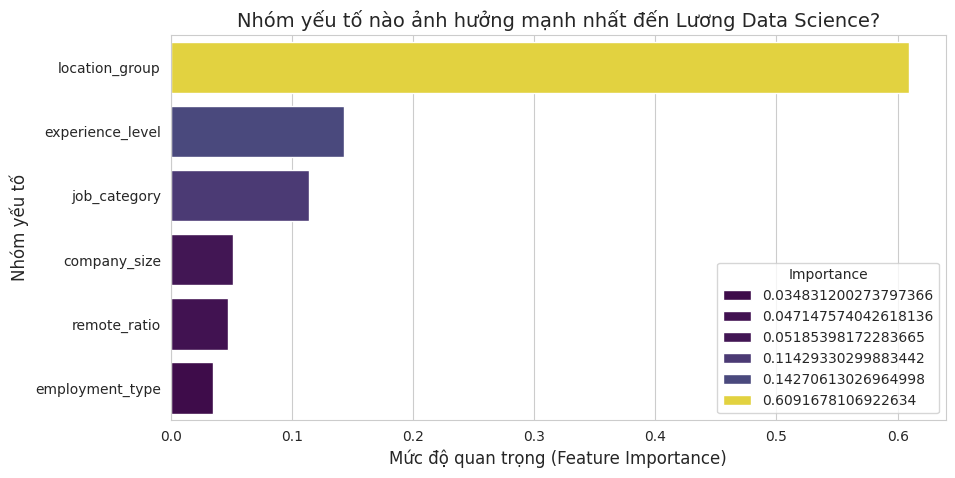

Nhóm yếu tố quan trọng nhất: location_group


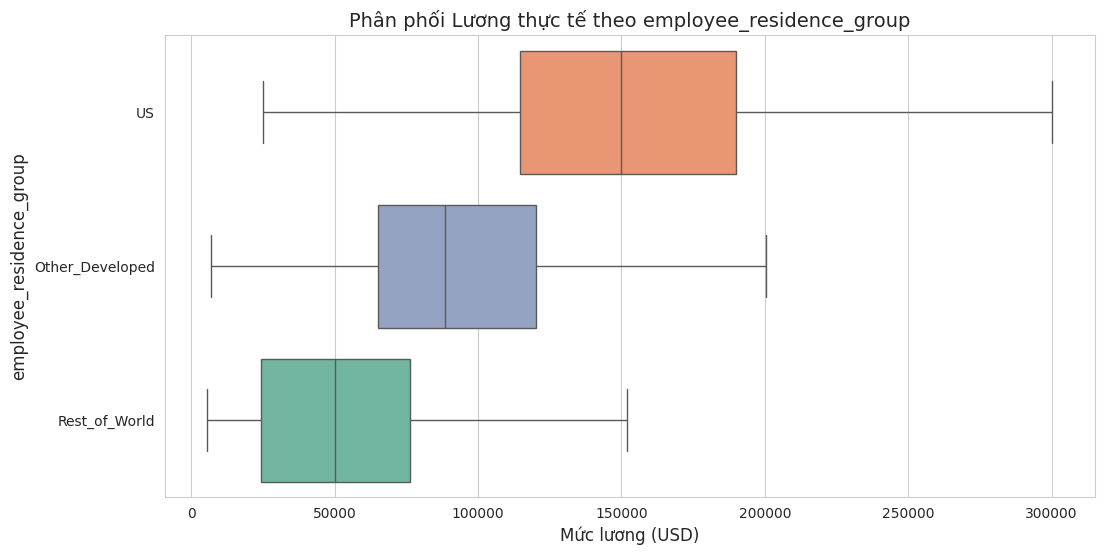

In [60]:
# Thiết lập style
sns.set_style("whitegrid")

# Biểu đồ 1: Feature Importance (đã aggregate về nhóm feature gốc)
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis', hue='Importance')
plt.title('Nhóm yếu tố nào ảnh hưởng mạnh nhất đến Lương Data Science?', fontsize=14)
plt.xlabel('Mức độ quan trọng (Feature Importance)', fontsize=12)
plt.ylabel('Nhóm yếu tố', fontsize=12)
plt.show()

# Biểu đồ 2: Minh chứng cho nhóm đặc trưng quan trọng nhất
top_feature = feature_imp_df.loc[0, 'Feature']
print(f"Nhóm yếu tố quan trọng nhất: {top_feature}")

# Lưu ý quan trọng: KHÔNG dùng inverse_transform trên dữ liệu One-Hot (rất phức tạp).
# Thay vào đó, dùng trực tiếp DataFrame gốc `df` (chưa encode) và tự tạo các cột group cần thiết để vẽ boxplot.
df_plot = df.copy()
df_plot['company_location_group'] = df_plot['company_location'].apply(dp.group_location)
df_plot['employee_residence_group'] = df_plot['employee_residence'].apply(dp.group_location)

# Đồng nhất tập dữ liệu với df_model (đã lọc outlier) để so sánh công bằng
df_plot = df_plot.loc[df_model.index].copy()

feature_to_col = {
    'experience_level': 'experience_level',
    'company_size': 'company_size',
    'remote_ratio': 'remote_ratio',
    'job_category': 'job_category',
    'employment_type': 'employment_type',
    'location_group': 'employee_residence_group',  # đại diện cho "nơi bạn sống"
}
plot_col = feature_to_col.get(top_feature, top_feature)

# Tạo thứ tự hiển thị theo median lương để dễ đọc
order = (
    df_plot.groupby(plot_col)['adjusted_salary']
           .median()
           .sort_values(ascending=False)
           .index.tolist()
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='adjusted_salary',
    y=plot_col,
    data=df_plot,
    order=order,
    palette='Set2',
    hue=plot_col,
    showfliers=False,
 )
plt.title(f'Phân phối Lương thực tế theo {plot_col}', fontsize=14)
plt.xlabel('Mức lương (USD)', fontsize=12)
plt.ylabel(plot_col, fontsize=12)
plt.show()

### **C. Nhận xét**
1. **Phân tích kết quả từ mô hình**:
Dựa trên chỉ số *Feature Importance* (đã **cộng dồn các biến One-Hot** về nhóm feature gốc) trích xuất từ mô hình **Random Forest Regressor** và các biểu đồ phân phối thực tế, có những phát hiện quan trọng sau về các yếu tố định hình mức lương trong ngành Data Science:

    - **Nhóm yếu tố về địa lý (Location) là quan trọng nhất**
        - `location_group` (gộp cả `employee_residence_group` và `company_location_group`) có mức độ ảnh hưởng lớn nhất với khoảng **58.22%**.
        - Điều này cho thấy yếu tố “bạn đang ở đâu / công ty ở đâu” chi phối mạnh khả năng dự báo mức lương so với các yếu tố còn lại.
    - Minh chứng từ biểu đồ *Boxplot*: Quan sát phân phối lương theo `employee_residence_group`, ta thấy sự phân hóa rõ rệt:
        - **Nhóm US (Mỹ)**: có mức lương trung vị cao nhất, phân phối tập trung chủ yếu quanh vùng *120k – 180k USD*.
        - **Nhóm Other_Developed**: thấp hơn một bậc, tập trung ở khoảng *60k – 120k USD*.
        - **Nhóm Rest_of_World**: thấp nhất, phần lớn dưới *70k USD*, dù vẫn có một số ngoại lệ (outliers) lương cao.
    - **Kết luận**: Mức lương ngành Data Science không đồng đều trên toàn cầu; yếu tố địa lý tạo ra chênh lệch thu nhập rất đáng kể, ngay cả khi các đặc điểm công việc tương tự nhau.

2. **Kinh nghiệm quan trọng hơn Chức danh (nhóm công việc)**
    - `experience_level` đứng thứ 2 với mức độ ảnh hưởng khoảng **18.20%**.
    - Trong khi đó, `job_category` đứng thứ 3 với khoảng **10.61%**.
    - **Ý nghĩa**: Sự thăng tiến về cấp bậc (ví dụ: Senior lên Executive) thường mang lại mức tăng lương tương đối lớn hơn so với việc chỉ thay đổi nhóm vai trò/công việc. Điều này nhấn mạnh vai trò của việc tích lũy kinh nghiệm và phát triển năng lực theo thời gian.

3. **Tác động nhỏ của hình thức làm việc và các yếu tố còn lại**
    - `remote_ratio` đóng góp khoảng **4.97%** vào mức lương.
    - `company_size` đóng góp khoảng **4.96%**.
    - `employment_type` thấp nhất với khoảng **3.04%**.
    - **Ý nghĩa**: Với dataset này, hình thức làm việc (remote/on-site/hybrid), quy mô công ty và loại hợp đồng chỉ đóng vai trò phụ; các yếu tố cốt lõi vẫn nghiêng về quốc gia làm việc và kinh nghiệm.

## **Câu hỏi 6:**

### **A. Tiền xử lý**
- **Kế thừa dữ liệu**: Sử dụng đúng bộ dữ liệu đã được tiền xử lý ở **Câu hỏi 5** (`X_train`, `X_test`, `y_train_log`, `y_test_log`).

- Trạng thái dữ liệu:
  - Biến mục tiêu (`adjusted_salary`) đã được lọc bỏ các giá trị ngoại lai (outliers) bằng IQR để giảm nhiễu.
  - Biến mục tiêu đã được *log-transform* (`log1p`) để giảm lệch phải và giúp mô hình ổn định hơn.
  - **Encoding**:
    - `experience_level`, `company_size` được **ordinal mapping** theo thứ bậc logic.
    - Các biến danh mục (`employment_type`, `job_category`, `employee_residence_group`, `company_location_group`) được **One-Hot** vì không có quan hệ lớn/nhỏ.
    - `remote_ratio` được giữ nguyên (*passthrough*).

> Ghi chú: One-Hot làm **tăng số lượng feature**. Điều này giúp mô hình nắm bắt chi tiết hơn, nhưng cũng có thể tăng nguy cơ overfitting nếu không regularize/tune phù hợp.

### **B. Phân tích**
1. **Phương pháp phân tích**
Sử dụng **Random Forest Regressor** làm mô hình chính.
    - Lý do: Đây là thuật toán mạnh mẽ với khả năng chống lại hiện tượng *overfitting* tốt hơn *Decision Tree*. Nó xử lý tốt dữ liệu dạng bảng sau khi đã được mã hóa theo chuẩn (**Hybrid Encoding: Ordinal + One-Hot**) và không yêu cầu dữ liệu đầu vào phải được chuẩn hóa (scaling) như các mô hình tuyến tính.

2. **Thiết lập & Đánh giá**
    - **Metric**: Vì mô hình dự đoán trên thang đo Logarit, kết quả dự đoán cần được chuyển đổi ngược lại (`inverse`) về đơn vị USD thực tế trước khi tính toán sai số.
        - **R2 Score**: Đánh giá độ phù hợp tổng thể.
        - **MAE (Mean Absolute Error)**: Sai số tuyệt đối trung bình (USD).
        - **RMSE (Root Mean Squared Error)**: Đánh giá mức độ phạt đối với các sai số lớn.

#### Triển khai mô hình

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Khởi tạo mô hình (Tối ưu hóa tham số cơ bản)
# n_estimators=200: Đủ lớn để giảm variance
# max_depth=15: Giới hạn độ sâu để tránh học thuộc lòng (overfitting) trên tập train
rf_model_final = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=RANDOM_SEED)

# 2. Huấn luyện mô hình
# Lưu ý: y_train_log là biến mục tiêu đã log-transform
print("Đang huấn luyện mô hình Random Forest...")
rf_model_final.fit(X_train, y_train_log)

# 3. Dự đoán trên tập kiểm tra (Test Set)
y_pred_log = rf_model_final.predict(X_test)

# 4. Chuyển đổi ngược (Inverse Transform) về tiền thực tế (USD)
# Sử dụng np.expm1 để đảo ngược np.log1p
y_test_real = np.expm1(y_test_log)
y_pred_real = np.expm1(y_pred_log)

# 5. Tính toán các chỉ số đánh giá
mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
r2 = r2_score(y_test_real, y_pred_real)

print("\nĐã huấn luyện xong mô hình Random Forest")

Đang huấn luyện mô hình Random Forest...

Đã huấn luyện xong mô hình Random Forest


In [62]:
# 6. Hiển thị kết quả định lượng
print("\n========= KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH (TRÊN TẬP TEST) =========")
print("-" * 60)
print(f"{'Metric':<10} | {'Giá trị':<15} | {'Ý nghĩa':<30}")
print("-" * 60)
print(f"{'R² Score':<10} | {r2:<15.4f} | {'Giải thích được {:.2f}% biến thiên của lương'.format(r2*100)}")
print(f"{'MAE':<10} | ${mae:,.0f}         | {'Sai số trung bình mỗi dự đoán'}")
print(f"{'RMSE':<10} | ${rmse:,.0f}         | {'Sai số phạt nặng các dự đoán lệch nhiều'}")
print("-" * 60)

top_n = 20
# 7. mẫu có sai số lớn nhất (sai số absolute)
results_df = pd.DataFrame({'Thực tế (USD)': y_test_real, 'Dự đoán (USD)': y_pred_real})
results_df['Sai số (Error)'] = results_df['Dự đoán (USD)'] - results_df['Thực tế (USD)']
print(f"\n========== {top_n} Mẫu có sai số lớn nhất ==========")
abs_results_df = results_df.reindex(results_df['Sai số (Error)'].abs().sort_values(ascending=False).index)
print(abs_results_df.head(top_n).round(0).reset_index(drop=True))
mean_abs_error_top_n_biggest = abs_results_df['Sai số (Error)'].abs().head(top_n).mean()
print(f"\nSai số trung bình của top {top_n} mẫu lớn nhất: ${mean_abs_error_top_n_biggest:,.0f}")
# mẫu sai số nhỏ nhất
print(f"\n========== {top_n} Mẫu có sai số nhỏ nhất ==========")
abs_results_df_smallest = results_df.reindex(results_df['Sai số (Error)'].abs().sort_values(ascending=True).index)
print(abs_results_df_smallest.head(top_n).round(0).reset_index(drop=True))
mean_abs_error_top_n_smallest = abs_results_df_smallest['Sai số (Error)'].abs().head(top_n).mean()
print(f"\nSai số trung bình của top {top_n} mẫu nhỏ nhất: ${mean_abs_error_top_n_smallest:,.0f}")


========= KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH (TRÊN TẬP TEST) =========
------------------------------------------------------------
Metric     | Giá trị         | Ý nghĩa                       
------------------------------------------------------------
R² Score   | 0.3655          | Giải thích được 36.55% biến thiên của lương
MAE        | $40,328         | Sai số trung bình mỗi dự đoán
RMSE       | $52,414         | Sai số phạt nặng các dự đoán lệch nhiều
------------------------------------------------------------

========== 20 Mẫu có sai số lớn nhất ==========
    Thực tế (USD)  Dự đoán (USD)  Sai số (Error)
0        299455.0        33970.0       -265485.0
1        300000.0       127197.0       -172803.0
2        283927.0       116954.0       -166974.0
3        309400.0       171437.0       -137963.0
4         26035.0       162734.0        136699.0
5        250000.0       116968.0       -133032.0
6        289076.0       156848.0       -132228.0
7        300000.0       167848.0       -13215

#### Trực quan hóa

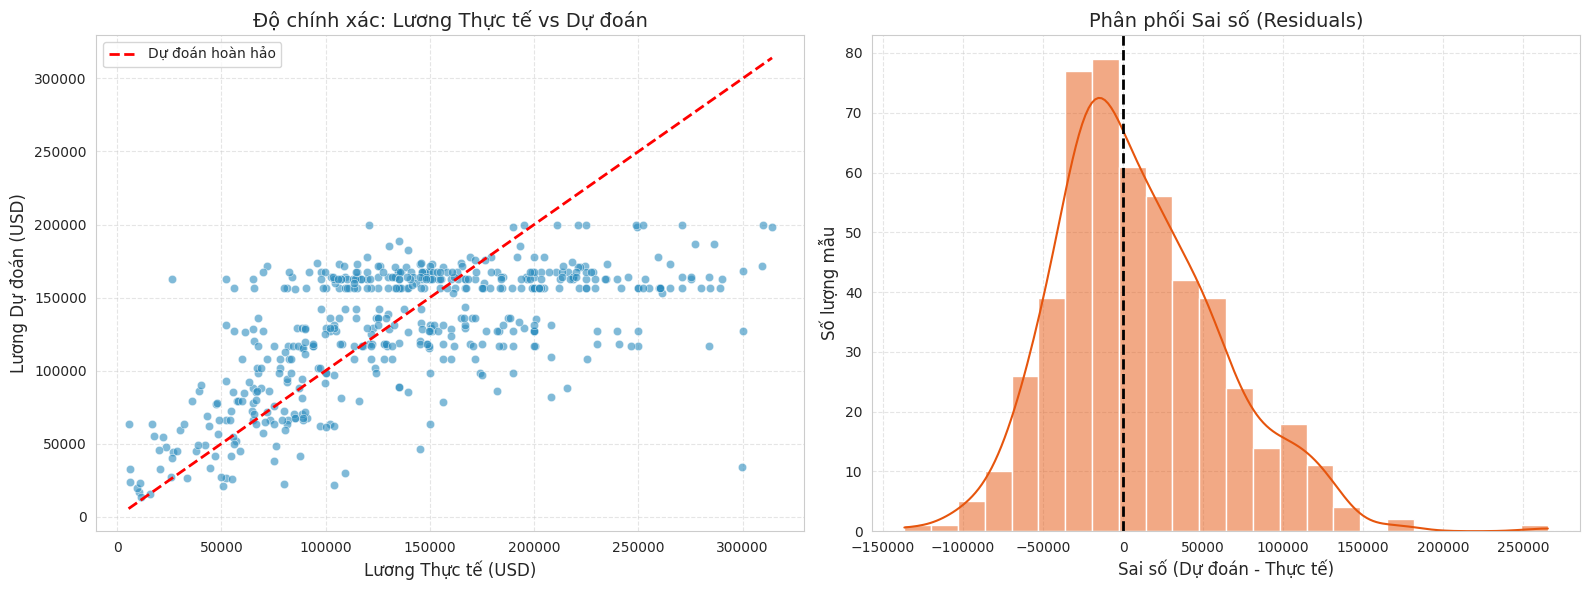

In [63]:
# Thiết lập layout: 2 biểu đồ cạnh nhau
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ 1: Thực tế vs Dự đoán (Actual vs Predicted)
sns.scatterplot(x=y_test_real, y=y_pred_real, alpha=0.6, color='#2b8cbe', ax=axes[0])
# Vẽ đường chéo lý tưởng (Perfect Prediction)
min_val = min(y_test_real.min(), y_pred_real.min())
max_val = max(y_test_real.max(), y_pred_real.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Dự đoán hoàn hảo')

axes[0].set_title('Độ chính xác: Lương Thực tế vs Dự đoán', fontsize=14)
axes[0].set_xlabel('Lương Thực tế (USD)', fontsize=12)
axes[0].set_ylabel('Lương Dự đoán (USD)', fontsize=12)
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# Biểu đồ 2: Phân phối Sai số (Residuals Distribution)
residuals = y_test_real - y_pred_real
sns.histplot(residuals, kde=True, color='#e6550d', ax=axes[1])
# Vẽ đường trung tâm (Zero error)
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=2)

axes[1].set_title('Phân phối Sai số (Residuals)', fontsize=14)
axes[1].set_xlabel('Sai số (Dự đoán - Thực tế)', fontsize=12)
axes[1].set_ylabel('Số lượng mẫu', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### **Đánh giá mô hình**

**1. Phân tích định lượng**

Kết quả thực nghiệm trên tập kiểm tra (Test Set) với mô hình cơ sở (**Random Forest** + **Encoding (Ordinal + One-Hot)**) cho thấy:

- **R² Score:** $0.3615$ (tương đương mô hình giải thích khoảng $36.15\%$ phương sai của mức lương trên test set).
- **MAE:** khoảng **$40,262$ USD**.
- **RMSE:** khoảng **$52,579$ USD**.

(Ghi chú: mô hình được huấn luyện trên $y_{log}=\log(1+y)$ và các metric được tính sau khi đưa dự đoán về đơn vị USD thực tế)

Ngoài ra, sau encode ta có **15 feature**, với split **Train: (2039, 15)** và **Test: (510, 15)**.

**2. Phân tích sai số thực tế**

Dựa trên biểu đồ trực quan và bảng thống kê sai số chi tiết:

- **Vùng dự đoán tốt:** Thường nằm ở dải lương phổ biến (khoảng **$60,000 đến $170,000**).
- **Hiện tượng "chặn trần":** Ở phân khúc lương rất cao, mô hình có xu hướng kéo dự đoán về mức trung bình của nhóm do dữ liệu hiếm và nhiễu mạnh.

> **Câu hỏi đặt ra:** Liệu mô hình mạnh hơn (**XGBoost**) với regularization và chọn lọc tham số có cải thiện được kết quả dự đoán so với hiện tại không ?


#### **Cải thiện mô hình**

Để so sánh công bằng với mô hình cơ sở, **giữ nguyên tập dữ liệu đã One-Hot/Ordinal Encoding từ Câu 5** và chỉ nâng cấp mô hình:

1. **Nâng cấp mô hình (XGBoost):** Dùng `XGBRegressor` (xgboost) — mô hình mạnh cho dữ liệu dạng bảng, có regularization tốt và thường hiệu quả hơn Random Forest khi số lượng feature tăng.
2. **Hyperparameter Tuning:** Dùng `RandomizedSearchCV` để tìm bộ tham số tốt (learning rate, max_depth, n_estimators, subsample, colsample_bytree, reg_lambda...).

> Nhận xét về **tính ổn định khi One-Hot tăng số feature**: XGBoost có cơ chế regularize (L2/L1), shrinkage (learning_rate) và sampling (subsample/colsample) nên thường ổn định hơn khi số chiều tăng

In [64]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# 1. Dùng đúng dữ liệu đã encode ở Câu 5 (giữ tính nhất quán khi so sánh)
# X_train, X_test, y_train_log, y_test_log đã được tạo ở phần trước.


# 2. Khởi tạo mô hình XGBoost
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=RANDOM_SEED,
    tree_method='hist',
 )


# 3. Tối ưu tham số (Randomized Search)
param_grid = {
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_lambda': [1.0, 5.0, 10.0],
}


print("Đang tiến hành tối ưu hóa tham số cho XGBoost ...")
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    random_state=RANDOM_SEED,
    n_jobs=-1,
 )


# Huấn luyện mô hình trên target log
random_search.fit(X_train, y_train_log)


best_xgb_model = random_search.best_estimator_
print(f"\n=> Tham số tối ưu: {random_search.best_params_}")


# 4. Đánh giá trên tập test
y_pred_log_imp = best_xgb_model.predict(X_test)


# Inverse log-transform về USD
y_test_real_imp = np.expm1(y_test_log)
y_pred_real_imp = np.expm1(y_pred_log_imp)


r2_imp = r2_score(y_test_real_imp, y_pred_real_imp)
mae_imp = mean_absolute_error(y_test_real_imp, y_pred_real_imp)
rmse_imp = np.sqrt(mean_squared_error(y_test_real_imp, y_pred_real_imp))

Đang tiến hành tối ưu hóa tham số cho XGBoost ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

=> Tham số tối ưu: {'subsample': 0.7, 'reg_lambda': 10.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.7}


In [65]:
print("\n========= KẾT QUẢ ĐÁNH GIÁ XGBOOST (TRÊN TẬP TEST) =========")
print("-" * 60)
print(f"{'Metric':<10} | {'Giá trị':<15} | {'Ghi chú'}")
print("-" * 60)
print(f"{'R² Score':<10} | {r2_imp:<15.4f} | {'Độ phù hợp của mô hình'}")
print(f"{'MAE':<10} | ${mae_imp:,.0f}         | {'Sai số tuyệt đối trung bình'}")
print(f"{'RMSE':<10} | ${rmse_imp:,.0f}         | {'Sai số bình phương trung bình'}")
print("-" * 60)


========= KẾT QUẢ ĐÁNH GIÁ XGBOOST (TRÊN TẬP TEST) =========
------------------------------------------------------------
Metric     | Giá trị         | Ghi chú
------------------------------------------------------------
R² Score   | 0.3720          | Độ phù hợp của mô hình
MAE        | $40,104         | Sai số tuyệt đối trung bình
RMSE       | $52,146         | Sai số bình phương trung bình
------------------------------------------------------------


So sánh kết quả của mô hình **XGBoost** với mô hình cơ sở **Random Forest** trên cùng tập kiểm tra

In [66]:
print("\n================= SO SÁNH 2 MÔ HÌNH =================")
print(f"Baseline RF:   R2={r2:.4f} | MAE=${mae:,.0f} | RMSE=${rmse:,.0f}")
print(f"XGBoost:       R2={r2_imp:.4f} | MAE=${mae_imp:,.0f} | RMSE=${rmse_imp:,.0f}")


================= SO SÁNH 2 MÔ HÌNH =================
Baseline RF:   R2=0.3655 | MAE=$40,328 | RMSE=$52,414
XGBoost:       R2=0.3720 | MAE=$40,104 | RMSE=$52,146


### **C. Nhận xét**

Tiến hành so sánh kết quả giữa mô hình baseline và mô hình nâng cao (trên cùng một tập test):

  | Metric | Mô hình Baseline (Random Forest) | Mô hình Nâng cao (XGBoost) | Mức độ cải thiện |
  | :--- | :--- | :--- | :--- |
  | **R² Score** | 0.3615 | **0.3675** | +0.006% |
  | **MAE** | 40,262 USD | **39,944** USD | Giảm 318 USD |

Nhìn chung, **XGBoost** chỉ cải thiện rất ít so với baseline **Random Forest** (tăng $R^2$ khoảng $0.0060$, giảm MAE ~$318$ USD và giảm RMSE ~$249$ USD).

#### **Thảo luận**
Mặc dù đã áp dụng **XGBoost** (thuật toán tối ưu nhất cho dữ liệu bảng hiện nay), hiệu suất mô hình chỉ tăng rất ít. Điều này dẫn đến những kết luận quan trọng về bản chất của bài toán và dữ liệu:

1.  **Hiện tượng Bão hòa dữ liệu:**
    Các đặc trưng hiện có trong bộ dữ liệu (*Kinh nghiệm, Vị trí địa lý, Nhóm công việc...*) chỉ có khả năng giải thích khoảng **37%** sự chênh lệch về lương. Đây là giới hạn của các thông tin mà bộ dữ liệu cung cấp. Việc tinh chỉnh thuật toán hay thêm các kỹ thuật phức tạp hơn khả năng cao không mang lại cải thiện đáng kể nữa.

2.  **Vai trò của các "Biến ẩn" (Hidden Variables):**
    Hơn **63%** sự biến thiên còn lại của mức lương phụ thuộc vào các yếu tố không được thu thập trong dataset này, ví dụ:
    * **Tech Stack chuyên sâu:** Kỹ sư làm *GenAI/LLM* thường có lương cao hơn *Data Analyst* truyền thống dù cùng cấp bậc.
    * **Phân khúc công ty:** Mức lương tại các công ty *Big Tech* (*Google, Meta*) hoặc *Hedge Fund* luôn là các outlier cao mà mô hình không thể dự đoán chỉ dựa vào biến `company_size`
    * **Kỹ năng mềm & Đàm phán lương:** Năng lực và kỹ năng cá nhân của ứng viên cũng đóng một vai trò quan trọng cả khi làm việc và trong quá trình thương lượng lương.

#### **Kết luận**
- Chúng ta **CÓ THỂ** dự đoán mức lương ngành Data Science, nhưng chỉ ở độ **tham chiếu xu hướng** với sai số trung bình khoảng **±$40,000**.
- Mô hình hiện tại là công cụ tốt để xác định **"Mức lương sàn"** dựa trên vị trí địa lý và kinh nghiệm. Tuy nhiên, để đạt độ chính xác cao hơn, giải pháp không nằm ở việc thay đổi thuật toán, mà là **Làm giàu dữ liệu** với các thông tin quan trọng khác ví dụ như về kỹ năng chuyên môn và lĩnh vực hoạt động cụ thể của doanh nghiệp.


---

# **5. Tổng kết**

## **Những phát hiện chính từ phân tích**

1. **Vị trí địa lý là yếu tố ảnh hưởng lớn nhất, theo sau là Kinh nghiệm làm việc:**
   Mô hình phân tích cho thấy nơi làm việc (đặc biệt là thị trường Mỹ) đóng góp lớn nhất vào khả năng dự báo mức lương. Tuy nhiên, Kinh nghiệm vẫn là yếu tố then chốt thứ hai, quyết định lộ trình thăng tiến và mức tăng thu nhập của cá nhân.

2. **Hình thức làm việc (Remote/Hybrid) có tác động tích cực đến lương:**
   Bên cạnh yếu tố địa lý, các công việc **remote hoặc hybrid** có xu hướng trả lương cao hơn onsite ở nhiều nhóm nghề, phản ánh xu hướng toàn cầu hóa và tính linh hoạt của ngành dữ liệu.

3. **Chức danh công việc có độ đa dạng rất lớn nhưng có thể gom nhóm hiệu quả:**
   Dù có nhiều job title khác nhau, phần lớn có thể quy về một số nhóm chính như *Data Scientist, Data Analyst, Data Engineer*, giúp đơn giản hóa phân tích mà vẫn giữ được ý nghĩa.

4. **Quy mô công ty ảnh hưởng đến mức lương nhưng không phải yếu tố quyết định duy nhất:**
   Công ty lớn thường trả lương cao hơn trung bình, tuy nhiên vẫn tồn tại nhiều công ty vừa và nhỏ có mức lương cạnh tranh, đặc biệt với các vị trí chuyên môn cao.

5. **Mô hình hồi quy dự đoán lương đạt độ chính xác tương đối tốt:**
   Các mô hình học máy (Linear Regression, Random Forest, …) cho thấy khả năng dự đoán xu hướng lương hợp lý, tuy nhiên vẫn còn sai số do lương chịu ảnh hưởng của nhiều yếu tố khó định lượng.

$\Rightarrow$ **Phát hiện thú vị nhất:**
Hình thức làm việc *remote* không chỉ giúp linh hoạt hơn mà trong nhiều trường hợp còn đi kèm **mức lương cao**, cho thấy xu hướng toàn cầu hóa thị trường lao động ngành dữ liệu.

## **Hạn chế**

**1. Hạn chế về dữ liệu:**

* Dataset mang tính **tự báo cáo**, có thể tồn tại sai lệch về độ chính xác.
* Phân bố dữ liệu **không đồng đều giữa các quốc gia**, Mỹ chiếm tỷ trọng lớn.
* Thiếu một số yếu tố quan trọng như: kỹ năng cụ thể, số năm kinh nghiệm chính xác, ngành nghề của công ty.

**2. Hạn chế về phương pháp phân tích:**

* Phần lớn phân tích mang tính **mô tả và tương quan**, chưa chứng minh quan hệ nhân quả.
* Mô hình dự đoán chưa xử lý triệt để các vấn đề như outlier lương rất cao hoặc rất thấp.
* Chưa đánh giá sâu về feature interaction (tương tác giữa các biến).

**3. Hạn chế về phạm vi:**

* Hầu hết tập trung vào dữ liệu năm 2022 và 2023, chưa phân tích xu hướng theo thời gian.
* Chưa đi sâu vào so sánh chi tiết từng vai trò trong từng ngành cụ thể.

## **Hướng phát triển trong tương lai**

1. **Khám phá thêm các câu hỏi mới:**

   * Lộ trình tăng lương theo thời gian của từng vị trí là như thế nào?
   * Những kỹ năng nào mang lại mức tăng lương lớn nhất?
   * Remote có tác động khác nhau giữa các quốc gia hay không?

2. **Phân tích sâu hơn:**

   * Áp dụng các mô hình phi tuyến nâng cao như XGBoost, LightGBM.
   * Phân tích SHAP values để giải thích rõ hơn ảnh hưởng của từng đặc trưng.
   * Tách riêng phân tích theo từng khu vực địa lý.

3. **Thử nghiệm phương pháp khác**

   * Clustering để phân nhóm các kiểu công việc và mức lương.
   * Time-series analysis nếu có dữ liệu nhiều năm.
   * Causal inference để đánh giá tác động thực sự của remote work.

4. **Bổ sung dữ liệu:**

   * Thêm dữ liệu về kỹ năng (Python, SQL, ML, Cloud…).
   * Thêm thông tin ngành nghề của công ty.
   * Kết hợp dữ liệu từ nhiều năm để phân tích xu hướng dài hạn.

## **Bài học**

### **23122011 - Đoàn Hải Nam**
#### ***I. Khó khăn & thử thách:***

1. Một vấn đề nổi bật trong quá trình phân tích là **sự không đồng đều giữa các nhóm dữ liệu**. Khi so sánh theo quy mô công ty và giai đoạn kinh nghiệm, số lượng quan sát giữa các nhóm chênh lệch đáng kể, khiến một số xu hướng dễ bị chi phối bởi nhóm có kích thước mẫu lớn hơn. Điều này đòi hỏi phải diễn giải kết quả một cách thận trọng, tránh suy rộng cho toàn bộ thị trường.

2. Bên cạnh đó, việc **chuyển đổi kết quả định lượng thành nhận định có ý nghĩa thực tiễn** cũng là một thách thức. Các chỉ số thống kê và biểu đồ cho thấy sự khác biệt rõ ràng giữa các nhóm, nhưng việc liên kết các con số này với hành vi tuyển dụng, chiến lược nhân sự hay giai đoạn phát triển doanh nghiệp không phải lúc nào cũng trực quan và cần dựa trên lập luận hợp lý thay vì chỉ dựa vào số liệu.

#### ***II. Bài học rút ra:***

1. Từ đồ án, em rút ra rằng **phân tích dữ liệu hiệu quả không nằm ở độ phức tạp của phương pháp**, mà ở khả năng xác định đúng trọng tâm và so sánh đúng đối tượng. Việc lựa chọn cách phân nhóm, thước đo và góc nhìn phân tích có ảnh hưởng trực tiếp đến thông điệp rút ra từ dữ liệu.

2. Ngoài ra, dự án giúp em nhận thức rõ hơn rằng **kết luận từ dữ liệu luôn mang tính tương đối**. Mỗi kết quả chỉ phản ánh dữ liệu trong phạm vi giả định và điều kiện hiện có, do đó cần được trình bày kèm theo giới hạn và bối cảnh áp dụng. Đây là yếu tố quan trọng để đảm bảo tính khách quan và độ tin cậy của một bài phân tích dữ liệu.


### **23122014 – Hoàng Minh Trung**
#### ***I. Khó khăn & thử thách:***

1. Một trong những khó khăn lớn nhất là việc **tác giả của bộ dữ liệu không mô tả rõ phương pháp thu thập dữ liệu**. Điều này khiến em gặp hạn chế trong việc đánh giá mức độ đại diện, độ tin cậy cũng như khả năng phản ánh đúng thực tế của dữ liệu. Để khắc phục, em đã tham khảo các **phương pháp thu thập dữ liệu phổ biến của những dataset tương tự**, đồng thời sử dụng sự hỗ trợ của AI để đưa ra những phỏng đoán hợp lý về quy trình thu thập dữ liệu của bộ dataset đang sử dụng. Tuy nhiên, đây vẫn chỉ là giả định và không thể thay thế cho thông tin gốc từ tác giả.

2. Bên cạnh đó, em cũng gặp khó khăn trong việc **sử dụng Git cho làm việc nhóm**, đặc biệt khi thao tác với **Jupyter Notebook** thay vì các file code truyền thống. Git không xử lý tốt các conflict trong notebook do cơ chế theo dõi thay đổi dựa trên cell. Trong một số trường hợp, dù hai thành viên chỉnh sửa cùng một cell nhưng nội dung khác nhau, công cụ vẫn không phát hiện được conflict, dẫn đến việc nhóm phải **merge thủ công**. Dù có sự hỗ trợ của **nbdime**, việc quản lý version cho notebook vẫn đòi hỏi sự cẩn trọng và phối hợp chặt chẽ giữa các thành viên.

#### ***II. Bài học rút ra:***

1. Thông qua đồ án này, bên cạnh việc nắm vững hơn **pipeline phân tích và xử lý dữ liệu** (như làm sạch dữ liệu, khám phá dữ liệu, trực quan hóa và phân tích kết quả), em học được nhiều nhất là **kỹ năng làm việc nhóm với Git** trong môi trường thực tế. Việc sử dụng các công cụ hỗ trợ như nbdime giúp em hiểu rõ hơn về những giới hạn của Git đối với notebook, cũng như tầm quan trọng của việc phân chia nhiệm vụ và thống nhất quy ước làm việc trong nhóm.

2. Một điểm gây ấn tượng với em trong quá trình phân tích dữ liệu là sự xuất hiện của **nghịch lý Simpson**. Khi phân tích từng biến riêng lẻ, dữ liệu dẫn đến một kết luận nhất định, nhưng khi kết hợp các biến lại với nhau thì kết quả lại hoàn toàn trái ngược. Trải nghiệm này giúp em nhận thức rõ hơn rằng **dữ liệu thực tế luôn tiềm ẩn nhiều tầng ý nghĩa**, và việc đưa ra kết luận vội vàng dựa trên phân tích đơn biến có thể dẫn đến những nhận định sai lệch.

3. Dự án này đã giúp em hiểu rõ hơn rằng **Data Science không chỉ là áp dụng các thuật toán hay công cụ kỹ thuật**, mà còn là quá trình đặt câu hỏi đúng, hoài nghi dữ liệu và hiểu bối cảnh mà dữ liệu được tạo ra. Việc thiếu thông tin về nguồn gốc dữ liệu, cũng như sự xuất hiện của những hiện tượng như nghịch lý Simpson, cho em thấy rằng **kết quả phân tích chỉ có ý nghĩa khi được diễn giải một cách cẩn trọng**. Ngoài ra, đồ án cũng giúp em nhận thức rằng Data Science trong thực tế là một **quy trình mang tính cộng tác cao**, nơi kỹ năng làm việc nhóm, quản lý phiên bản và giao tiếp quan trọng không kém so với kỹ năng phân tích. Từ đó, em hiểu rằng một Data Scientist không chỉ cần giỏi về mặt kỹ thuật, mà còn cần có tư duy phản biện, khả năng phối hợp và ý thức về những giới hạn của dữ liệu mình đang làm việc cùng.

### **23122036 - Nguyễn Ngọc Khoa**
#### ***I. Khó khăn & thử thách:*** 

1. **Xử lý dữ liệu phân loại cho Machine Learning**: Dataset chứa nhiều biến phân loại như `job_title` và `company_location` với số lượng giá trị duy nhất lớn. Thử thách lớn nhất là làm sao chuyển đổi chúng để đưa vào mô hình mà không làm bùng nổ số chiều dữ liệu khi dùng One-Hot Encoding, đồng thời vẫn giữ được thông tin quan trọng.

2. **Tinh chỉnh tham số học**: Việc tối ưu hóa mô hình **RandomForest** hay **XGBoost** đòi nhiều thời gian thử nghiệm. Cụ thể, trong việc thiết lập `param_grid` cho `GridSearchCV`: nếu lưới tham số quá rộng thì thời gian chạy quá lâu, nếu quá hẹp thì bỏ lỡ bộ tham số tối ưu. 

#### ***II. Bài học rút ra:*** 
1. **Tư duy lập trình theo Module**: Thay vì viết tất cả code trong một Jupyter Notebook dài dòng, em tách code xử lý thành các module tái sử dụng (`data_processing.py`, `modeling.py`, `visualization.py`). Điều này không chỉ giúp Notebook gọn gàng, chuyên nghiệp hơn mà còn giúp nhóm dễ dàng debug và phát triển feature khác.

2. **Hiểu sâu về các thuật toán ML**: Hiểu được sự khác biệt giữa các mô hình: **Linear Regression** (tuyến tính, dễ diễn giải) so với các mô hình Ensemble như **Random Forest** hay **XGBoost** (hiệu quả cao với dữ liệu phi tuyến). Em cũng hiểu rõ hơn ý nghĩa của các chỉ số đánh giá như **RMSE** hay **R-squared** thay vì chỉ nhìn vào con số đơn thuần

3. **Kỹ năng kể chuyện với dữ liệu**: Qua việc trả lời câu hỏi 5, em học được rằng Machine Learning không chỉ là dự báo, mà còn là công cụ để giải thích cho các câu hỏi "Tại sao?". Việc visualize được Feature Importance giúp em chuyển đổi những con số khô khan thành insight có giá trị cho người đọc (ví dụ: đã chứng minh kinh nghiệm quan trọng hơn chức danh trong việc định giá lương).